# III. Process the Data

So far in our data analysis process, we have completed the first two steps. 
**I. Ask**: Defined the problem and formulated clear questions to guide our anlalysis; and 
**II. Prepare**: Gathered the data, understood its content and format, and verified its integrity. This included combining multiple excel files and reformatting the data into a tabular structure.
We now have five usable datasets saved as five CSV files.

We are ready for our third step in the anlaysis process.
**III. Process**: Clean and manipulate the data, ensuring it is in a format ready for analysis.
We will do this third step in a notebook, using Python.

**A. Upload the datasets**

**1. Import the needed libraries.**

In [5]:
import pandas as pd
import os
import re
from datetime import datetime
from fuzzywuzzy import process

**2. Load the CSV files into a dictionary.**

In [7]:
# Define the folder path where the CSV files are stored
folder_path = r"C:\Users\rosse\Documents\Kathy's Cleaning\completed_datasets\csv_files"

# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Load each CSV file into a dictionary
dataframes = {file: pd.read_csv(os.path.join(folder_path, file)) for file in csv_files}

# Print the loaded file names to confirm
print("Loaded CSV files:", list(dataframes.keys()))

Loaded CSV files: ['customer_dataset.csv', 'employee_dataset.csv', 'payroll_dataset.csv', 'pay_dataset.csv', 'printouts_dataset.csv']


**3. Trim ".csv" from the dataset names.**

In [9]:
# Create a new dictionary with trimmed names
updated_dataframes = {}

for name, df in dataframes.items():
    new_name = name.replace(".csv", "")
    updated_dataframes[new_name] = df

# Replace the original dictionary with the updated one
dataframes = updated_dataframes

# Print the trimmed file names to confirm
print("Updated file names:", list(dataframes.keys()))

Updated file names: ['customer_dataset', 'employee_dataset', 'payroll_dataset', 'pay_dataset', 'printouts_dataset']


**B. Data Manipulation**

**1. Inspect the data**

In [12]:
# Check the first five rows of each dataset
for name, df in dataframes.items():
    print(f"First 5 rows of {name}:")
    print(df.head(), "\n" + "-"*50 + "\n")

First 5 rows of customer_dataset:
   customer_id customer_name customer_type
0            1         Hobbs         house
1            2        Neyman         house
2            3         Brown         house
3            4        Crosby         house
4            5      Kittrell         house 
--------------------------------------------------

First 5 rows of employee_dataset:
  employee_id STARTING DATE START BACK DATE    BIRTHDAY EMPLOYEE'S FIRST NAME  \
0     Breanna     4/11/2018             NaN    8/5/1992               Breanna   
1       Brian      1/1/2019      10/21/2021   3/22/1978                 Brian   
2       Cindy      8/5/2019       5/19/2023    6/1/1956                 Cindy   
3       Faith      8/1/2018             NaN   6/14/2001                 Faith   
4      Isaiah      8/1/2018             NaN  10/15/2002                Isaiah   

  EMPLOYEE'S LAST NAME  
0               Parker  
1              Rosseau  
2              Crowder  
3               Howell  
4        

Now let's check the column names, their data types, and any missing values.

In [14]:
# Check column names, data types, and missing values
for name, df in dataframes.items():
    print(f"Dataset: {name}")
    print(df.info(), "\n" + "-"*50 + "\n")

Dataset: customer_dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    70 non-null     int64 
 1   customer_name  70 non-null     object
 2   customer_type  70 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.8+ KB
None 
--------------------------------------------------

Dataset: employee_dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            36 non-null     object
 1   STARTING DATE          36 non-null     object
 2   START BACK DATE        2 non-null      object
 3   BIRTHDAY               34 non-null     object
 4   EMPLOYEE'S FIRST NAME  36 non-null     object
 5   EMPLOYEE'S LAST NAME   36 non-null     object
dtypes: objec

**2. Standardize column names.**

It is important that we standardize the column names for clarity, consistency, and to help minimize mistakes during our upcoming analysis. We see that some column names are capitalized, and some have spaces or special characters. 

Let's write a function to standardize the column names.

In [17]:
def standardize_column_names(df):
    """
    Standardize column names by converting to lowercase, replacing spaces with underscores, and removing special characters.
    """
    df.columns = [
        re.sub(r"[^\w]", "", col.lower().replace(" ", "_"))
        for col in df.columns
    ]
    return df

# Apply function to all dataframes
for name, df in dataframes.items():
    dataframes[name] = standardize_column_names(df)
    print(f"Standardized column names in {name}")

Standardized column names in customer_dataset
Standardized column names in employee_dataset
Standardized column names in payroll_dataset
Standardized column names in pay_dataset
Standardized column names in printouts_dataset


In [18]:
# Check column names, data types, and missing values
for name, df in dataframes.items():
    print(f"Dataset: {name}")
    print(df.info(), "\n" + "-"*50 + "\n")

Dataset: customer_dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    70 non-null     int64 
 1   customer_name  70 non-null     object
 2   customer_type  70 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.8+ KB
None 
--------------------------------------------------

Dataset: employee_dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   employee_id           36 non-null     object
 1   starting_date         36 non-null     object
 2   start_back_date       2 non-null      object
 3   birthday              34 non-null     object
 4   employees_first_name  36 non-null     object
 5   employees_last_name   36 non-null     object
dtypes: object(6)
mem

Great! Our column names have been standardized! That will make things much easier going forward.

**3. Fix data types**

Next, we will correct the datatypes. 

There are several columns that end in '_id' that serve as keys or categories. We will want to use these for identifying or grouping data, so they should be converted to 'category' datatype.

In [22]:
# Convert all columns that end with '_id' in each dataset to 'category' datatype
for name, df in dataframes.items():
    id_columns = [col for col in df.columns if col.endswith("_id")]
    df[id_columns] = df[id_columns].astype("category")
    print(f"Converted columns in {name}: {id_columns}")

Converted columns in customer_dataset: ['customer_id']
Converted columns in employee_dataset: ['employee_id']
Converted columns in payroll_dataset: ['payroll_id', 'customer_id']
Converted columns in pay_dataset: ['pay_id', 'weekly_emp_pay_id']
Converted columns in printouts_dataset: ['printouts_id', 'payroll_id', 'customer_id']


In [23]:
# Check data types for all datasets
for name, df in dataframes.items():
    print(f"\n Data Types in {name}:")
    print(df.dtypes)
    print("-" * 50)


 Data Types in customer_dataset:
customer_id      category
customer_name      object
customer_type      object
dtype: object
--------------------------------------------------

 Data Types in employee_dataset:
employee_id             category
starting_date             object
start_back_date           object
birthday                  object
employees_first_name      object
employees_last_name       object
dtype: object
--------------------------------------------------

 Data Types in payroll_dataset:
payroll_id     category
week             object
week_of          object
day_of_week      object
date             object
start            object
end              object
hours           float64
customer_id    category
job_name         object
job_pays        float64
kathy           float64
note             object
dtype: object
--------------------------------------------------

 Data Types in pay_dataset:
pay_id               category
week_of                object
weekly_emp_pay_id    catego

There are a lot of columns with "object" datatype. We need to convert these to the appropriate datatype; in our case, either datetime, category, string, float, or integer.

In [25]:
# Identify "object" columns that should be converted
for name, df in dataframes.items():
    obj_cols = df.select_dtypes(include=["object"]).columns
    print(f"\n Possible conversions in {name}:")
    for col in obj_cols:
        print(f"- {col}:")
        print(df[col].head(2))
        print("-" * 50)


 Possible conversions in customer_dataset:
- customer_name:
0     Hobbs
1    Neyman
Name: customer_name, dtype: object
--------------------------------------------------
- customer_type:
0    house
1    house
Name: customer_type, dtype: object
--------------------------------------------------

 Possible conversions in employee_dataset:
- starting_date:
0    4/11/2018
1     1/1/2019
Name: starting_date, dtype: object
--------------------------------------------------
- start_back_date:
0           NaN
1    10/21/2021
Name: start_back_date, dtype: object
--------------------------------------------------
- birthday:
0     8/5/1992
1    3/22/1978
Name: birthday, dtype: object
--------------------------------------------------
- employees_first_name:
0    Breanna
1      Brian
Name: employees_first_name, dtype: object
--------------------------------------------------
- employees_last_name:
0     Parker
1    Rosseau
Name: employees_last_name, dtype: object
--------------------------------

In some of our datasets, we have a 'week' column that is a date range, followed by a 'week_of' column denoting the start date of that week. We will convert the 'week' columns to 'string' for reference; the 'week_of' columns to 'datetime' for filtering/sorting; and we will create a new column called 'week_number" for grouping/aggregating.

In [27]:
for name, df in dataframes.items():
    # Convert 'week' columns to string if it exists
    if "week" in df.columns:
        df["week"] = df["week"].astype("string")

    # Convert 'week_of' columns to datetime if it exists
    if "week_of" in df.columns:
        df["week_of"] = pd.to_datetime(df["week_of"], format='%Y_%m_%d', errors="coerce")

    # Create 'week_number' columns from 'week_of' columns if applicable
    if "week_of" in df.columns:
        df["week_number"] = df["week_of"].dt.isocalendar().week.fillna(0).astype("int64")

    print(f"Processed {name}: week -> string, week_of -> datetime, week_number -> int64 (if applicable)")

Processed customer_dataset: week -> string, week_of -> datetime, week_number -> int64 (if applicable)
Processed employee_dataset: week -> string, week_of -> datetime, week_number -> int64 (if applicable)
Processed payroll_dataset: week -> string, week_of -> datetime, week_number -> int64 (if applicable)
Processed pay_dataset: week -> string, week_of -> datetime, week_number -> int64 (if applicable)
Processed printouts_dataset: week -> string, week_of -> datetime, week_number -> int64 (if applicable)


In [28]:
# Check data types for all datasets
for name, df in dataframes.items():
    print(f"\n Data Types in {name}:")
    print(df.dtypes)
    print("-" * 50)


 Data Types in customer_dataset:
customer_id      category
customer_name      object
customer_type      object
dtype: object
--------------------------------------------------

 Data Types in employee_dataset:
employee_id             category
starting_date             object
start_back_date           object
birthday                  object
employees_first_name      object
employees_last_name       object
dtype: object
--------------------------------------------------

 Data Types in payroll_dataset:
payroll_id           category
week           string[python]
week_of        datetime64[ns]
day_of_week            object
date                   object
start                  object
end                    object
hours                 float64
customer_id          category
job_name               object
job_pays              float64
kathy                 float64
note                   object
week_number             int64
dtype: object
--------------------------------------------------

 Data T

We still have a lot of columns in our dataframes that need to be converted. We will write a some functions to do this efficiently. 

The first function will convert the needed datetime columns.

In [30]:
from datetime import datetime

# Define a function to convert to datetime
def convert_to_datetime(df, datetime_cols):
    """
    Converts specified columns in a dataframe to datetime.

    Parameters:
    - df: The dataframe to modify.
    - datetime_cols: A dictionary where keys are column names and values are their date formats.

    Returns:
    - dataframe: Updated dataframe with datetime conversions.
    """
    for col, fmt in datetime_cols.items():
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], format=fmt, errors="coerce")
    return df

# Dictionary of datetime columns and their formats
datetime_columns = {
    "starting_date": "%m/%d/%Y",
    "start_back_date": "%m/%d/%Y",
    "birthday": "%m/%d/%Y",
    "date": "%m/%d/%Y",
    "start": "%I:%M %p",
    "end": "%I:%M %p",
}

# Loop through each dataframe in the dictionary and apply the function
for name, df in dataframes.items():
    dataframes[name] = convert_to_datetime(df, datetime_columns)
    print(f"Converted datetime columns in {name}")

    # Combine 'date' with 'start' and 'end' to create datetime columns
    if "date" in df.columns:
        if "start" in df.columns:
            start_datetime = []
            for index, row in df.iterrows():
                if pd.notnull(row["date"]) and pd.notnull(row["start"]):
                    start_datetime.append(datetime.combine(row["date"].date(), row["start"].time()))
                else:
                    start_datetime.append(pd.NaT)
            df["start_datetime"] = start_datetime
        
        if "end" in df.columns:
            end_datetime = []
            for index, row in df.iterrows():
                if pd.notnull(row["date"]) and pd.notnull(row["end"]):
                    end_datetime.append(datetime.combine(row["date"].date(), row["end"].time()))
                else:
                    end_datetime.append(pd.NaT)
            df["end_datetime"] = end_datetime

    # Create flag *before* replacing 'start' and 'end'
    if "start_datetime" in df.columns and "end_datetime" in df.columns:
        df['time_varies_by_employee'] = df[['start_datetime', 'end_datetime']].isnull().all(axis=1)

        # Overwrite 'start' and 'end' with datetime versions
        df["start"] = df["start_datetime"]
        df["end"] = df["end_datetime"]
        df.drop(columns=["start_datetime", "end_datetime"], inplace=True)
        
    # Create empty list to hold names of columns that were converted
    converted_cols = []

    # Check which datetime columns exist in the current dataframe
    for col in datetime_columns:
        if col in df.columns:
            converted_cols.append(col)

    # Add the new datetime columns if they exist
    if "start_datetime" in df.columns:
        converted_cols.append("start_datetime")
    if "end_datetime" in df.columns:
        converted_cols.append("end_datetime")

    # If any columns were converted, show the first two rows
    if converted_cols:
        print(df[converted_cols].head(5))
        print("\n")
    else:
        print("No matching datetime columns found in this dataframe.\n")

Converted datetime columns in customer_dataset
No matching datetime columns found in this dataframe.

Converted datetime columns in employee_dataset
  starting_date start_back_date   birthday
0    2018-04-11             NaT 1992-08-05
1    2019-01-01      2021-10-21 1978-03-22
2    2019-08-05      2023-05-19 1956-06-01
3    2018-08-01             NaT 2001-06-14
4    2018-08-01             NaT 2002-10-15


Converted datetime columns in payroll_dataset
        date               start                 end
0 2021-01-04                 NaT                 NaT
1 2021-01-05 2021-01-05 09:34:00 2021-01-05 11:01:00
2 2021-01-05 2021-01-05 11:10:00 2021-01-05 12:37:00
3 2021-01-05 2021-01-05 12:43:00 2021-01-05 14:36:00
4 2021-01-05 2021-01-05 14:48:00 2021-01-05 15:52:00


Converted datetime columns in pay_dataset
No matching datetime columns found in this dataframe.

Converted datetime columns in printouts_dataset
        date
0 2021-01-05
1 2021-01-05
2 2021-01-05
3 2021-01-05
4 2021-01-05




In [31]:
# Check the first five rows of each dataset
for name, df in dataframes.items():
    print(f"First 5 rows of {name}:")
    print(df.head(), "\n" + "-"*50 + "\n")

First 5 rows of customer_dataset:
  customer_id customer_name customer_type
0           1         Hobbs         house
1           2        Neyman         house
2           3         Brown         house
3           4        Crosby         house
4           5      Kittrell         house 
--------------------------------------------------

First 5 rows of employee_dataset:
  employee_id starting_date start_back_date   birthday employees_first_name  \
0     Breanna    2018-04-11             NaT 1992-08-05              Breanna   
1       Brian    2019-01-01      2021-10-21 1978-03-22                Brian   
2       Cindy    2019-08-05      2023-05-19 1956-06-01                Cindy   
3       Faith    2018-08-01             NaT 2001-06-14                Faith   
4      Isaiah    2018-08-01             NaT 2002-10-15               Isaiah   

  employees_last_name  
0              Parker  
1             Rosseau  
2             Crowder  
3              Howell  
4            Sandefur   
-------

The next function will convert each remaining "object" column to its appropriate datatype.

In [33]:
# Define a function to convert datatypes
def convert_dtypes(df, category_cols=None, string_cols=None, float_cols=None):
    """
    Convert specified columns in a dataframe to the desired datatype.

    Parameters:
    - df: The dataframe to modify.
    - category_cols: Columns to convert to 'category'.
    - string_cols: Columns to convert to 'string'.
    - float_cols: Columns to convert to 'float'.
    """
    if category_cols:
        for col in category_cols:
            if col in df.columns:
                df[col] = df[col].astype("category")
                
    if string_cols:
        for col in string_cols:
            if col in df.columns:
                df[col] = df[col].astype("string")

    if float_cols:
        for col in float_cols:
            if col in df.columns:
                df[col] = df[col].astype("float")

    return df

# Define column categories
category_columns = ["customer_type", "day_of_week", "employee",]
string_columns = ["customer_name", "employees_first_name", "employees_last_name", "job_name", "note",]
float_columns = ["hours",]

# Loop through each dataframe in the dictionary
for name, df in dataframes.items():
    dataframes[name] = convert_dtypes(df, category_cols=category_columns, string_cols=string_columns, float_cols=float_columns)
    print(f"Updated datatypes in {name}")

Updated datatypes in customer_dataset
Updated datatypes in employee_dataset
Updated datatypes in payroll_dataset
Updated datatypes in pay_dataset
Updated datatypes in printouts_dataset


In [34]:
# Check data types for all datasets
for name, df in dataframes.items():
    print(f"\n Data Types in {name}:")
    print(df.dtypes)
    print("-" * 50)


 Data Types in customer_dataset:
customer_id            category
customer_name    string[python]
customer_type          category
dtype: object
--------------------------------------------------

 Data Types in employee_dataset:
employee_id                   category
starting_date           datetime64[ns]
start_back_date         datetime64[ns]
birthday                datetime64[ns]
employees_first_name    string[python]
employees_last_name     string[python]
dtype: object
--------------------------------------------------

 Data Types in payroll_dataset:
payroll_id                       category
week                       string[python]
week_of                    datetime64[ns]
day_of_week                      category
date                       datetime64[ns]
start                      datetime64[ns]
end                        datetime64[ns]
hours                             float64
customer_id                      category
job_name                   string[python]
job_pays           

All the columns have been converted to their proper datatypes!

**4. Account for missing values**

Finally, let's see how many missing values we have in each column.

In [38]:
for name, df in dataframes.items():
    print(f"\n Missing Values in {name}:")
    print(df.isnull().sum())
    print("-" * 50)


 Missing Values in customer_dataset:
customer_id      0
customer_name    0
customer_type    0
dtype: int64
--------------------------------------------------

 Missing Values in employee_dataset:
employee_id              0
starting_date            0
start_back_date         34
birthday                 2
employees_first_name     0
employees_last_name      0
dtype: int64
--------------------------------------------------

 Missing Values in payroll_dataset:
payroll_id                    0
week                          0
week_of                       0
day_of_week                   0
date                          0
start                      1625
end                        1626
hours                      1617
customer_id                   0
job_name                      0
job_pays                    176
kathy                         0
note                       5217
week_number                   0
time_varies_by_employee       0
dtype: int64
-----------------------------------------------

As for the columns with missing data:
- "start_back_date": *Intentionally blank.* This only applies to those employees who stopped working for a time and later restarted.
- "birthday": *Intentionally blank.* Two employee's birthdays are unknown.
- "start" and "end": *Intentionally blank.* These columns are relavent only for jobs for customers of the "house" customer_type. Non-"house" customer_type jobs are blank due to times varying according to when individual employees worked. The total number of hours worked by each employee can still be found in the printouts_dataset.
- "hours": *Intentionally blank.* Blanks are for bonuses, and certain jobs that are not paid by the hour.
- **"job_pays": Blanks are for bonuses and other administrative work, and for multi-day jobs for which payment was on a different day. These should be filled with zeros.**
- "note": *Intentionally blank.* This columns is string datatype and only applies to rows with informational comments.

In [40]:
# Fill missing values in "job_pays" columns to zero.
for name, df in dataframes.items():
    if "job_pays" in df.columns:
        df["job_pays"] = df["job_pays"].fillna(0)
        print(f"Filled missing values with 0 in {name} for 'job_pays' column.")
    else:
        print(f"'job_pays' column not found in {name}.")

'job_pays' column not found in customer_dataset.
'job_pays' column not found in employee_dataset.
Filled missing values with 0 in payroll_dataset for 'job_pays' column.
'job_pays' column not found in pay_dataset.
'job_pays' column not found in printouts_dataset.


The missing values for the remaining columns have been thoroughly checked and determined to be intentional. We will leave them as NaN because Pandas functions handle NaN well.

In [42]:
# Check column names, data types, and missing values
for name, df in dataframes.items():
    print(f"Dataset: {name}")
    print(df.info(), "\n" + "-"*50 + "\n")

Dataset: customer_dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   customer_id    70 non-null     category
 1   customer_name  70 non-null     string  
 2   customer_type  70 non-null     category
dtypes: category(2), string(1)
memory usage: 3.8 KB
None 
--------------------------------------------------

Dataset: employee_dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   employee_id           36 non-null     category      
 1   starting_date         36 non-null     datetime64[ns]
 2   start_back_date       2 non-null      datetime64[ns]
 3   birthday              34 non-null     datetime64[ns]
 4   employees_first_name  36 non-null     string        
 5 

Success! Our data has been processed and is ready for analysis!

# III. Analyze the Data

We are now ready for our fourth step in the data analysis process. **IV Analyze**: Perform data analysis, including statistical analysis, data interpretation, and identifying key insights.

For this step, we will use SQL.

### Export the dataframes to a SQL database

**1. Import the needed libraries**

In [48]:
from sqlalchemy import create_engine
from sqlalchemy import inspect
import numpy as np
import matplotlib.pyplot as plt

**2. Create a database engine**

In [50]:
engine = create_engine('sqlite:///lorie_database.db')

**3. Export dataframes to SQL**

In [52]:
for name, df in dataframes.items():
    # Use the dictionary key (dataset name) as the SQL table name
    table_name = name.replace("dataset", "table")
    df.to_sql(table_name, con=engine, if_exists='replace', index=False)
    print(f"Exported {name} to table '{table_name}' in the database.")

Exported customer_dataset to table 'customer_table' in the database.
Exported employee_dataset to table 'employee_table' in the database.
Exported payroll_dataset to table 'payroll_table' in the database.
Exported pay_dataset to table 'pay_table' in the database.
Exported printouts_dataset to table 'printouts_table' in the database.


**4. Preview the tables**

In [54]:
inspector = inspect(engine)
print("Tables in database:", inspector.get_table_names())

Tables in database: ['customer_table', 'employee_table', 'pay_table', 'payroll_table', 'printouts_table']


In [55]:
import pandas as pd

query = "SELECT * FROM customer_table"
df_customer = pd.read_sql(query, engine)
df_customer

,customer_id,customer_name,customer_type
0,1,Hobbs,house
1,2,Neyman,house
2,3,Brown,house
3,4,Crosby,house
4,5,Kittrell,house
...,...,...,...
65,101,Office,administrative
66,102,Bottles/Other,administrative
67,201,Bonus,additional pay
68,202,Overtime,additional pay


In [56]:
query = "SELECT * FROM employee_table LIMIT 5"
df_emp = pd.read_sql(query, engine)
df_emp

,employee_id,starting_date,start_back_date,birthday,employees_first_name,employees_last_name
0,Breanna,2018-04-11 00:00:00.000000,None,1992-08-05 00:00:00.000000,Breanna,Parker
1,Brian,2019-01-01 00:00:00.000000,2021-10-21 00:00:00.000000,1978-03-22 00:00:00.000000,Brian,Rosseau
2,Cindy,2019-08-05 00:00:00.000000,2023-05-19 00:00:00.000000,1956-06-01 00:00:00.000000,Cindy,Crowder
3,Faith,2018-08-01 00:00:00.000000,None,2001-06-14 00:00:00.000000,Faith,Howell
4,Isaiah,2018-08-01 00:00:00.000000,None,2002-10-15 00:00:00.000000,Isaiah,Sandefur


In [57]:
query = "SELECT * FROM payroll_table LIMIT 5"
df_payroll = pd.read_sql(query, engine)
df_payroll

,payroll_id,week,week_of,day_of_week,date,start,end,hours,customer_id,job_name,job_pays,kathy,note,week_number,time_varies_by_employee
0,1,"January 4 - 8, 2021",2021-01-04 00:00:00.000000,Monday,2021-01-04 00:00:00.000000,None,None,NaN,6,COV SCHL,211.0,171.05,None,1,1
1,2,"January 4 - 8, 2021",2021-01-04 00:00:00.000000,Tuesday,2021-01-05 00:00:00.000000,2021-01-05 09:34:00.000000,2021-01-05 11:01:00.000000,1.450000,2,Neyman,85.0,54.26,None,1,0
2,3,"January 4 - 8, 2021",2021-01-04 00:00:00.000000,Tuesday,2021-01-05 00:00:00.000000,2021-01-05 11:10:00.000000,2021-01-05 12:37:00.000000,1.450000,3,Brown,85.0,54.26,None,1,0
3,4,"January 4 - 8, 2021",2021-01-04 00:00:00.000000,Tuesday,2021-01-05 00:00:00.000000,2021-01-05 12:43:00.000000,2021-01-05 14:36:00.000000,1.883333,4,Crosby,110.0,58.74,None,1,0
4,5,"January 4 - 8, 2021",2021-01-04 00:00:00.000000,Tuesday,2021-01-05 00:00:00.000000,2021-01-05 14:48:00.000000,2021-01-05 15:52:00.000000,1.066667,5,Kittrell,90.0,56.40,None,1,0


In [58]:
query = "SELECT * FROM pay_table LIMIT 5"
df_pay = pd.read_sql(query, engine)
df_pay

,pay_id,week_of,weekly_emp_pay_id,employee,pay_per_hour,note,week_number
0,2021_pay_1,2021-01-04 00:00:00.000000,1,Breanna,9.00,start date: 4/11/18,1
1,2021_pay_2,2021-01-04 00:00:00.000000,2,Brian,11.00,"start date: 01/19, Raise $1.00 on 7/1/19 End ...",1
2,2021_pay_3,2021-01-04 00:00:00.000000,3,Cindy,10.30,"start date: Aug 5, 2019 at $10.00 per hour. Ra...",1
3,2021_pay_4,2021-01-04 00:00:00.000000,4,Faith,9.75,"start date Aug 2018, raise 9/17/18 $.25, raise...",1
4,2021_pay_5,2021-01-04 00:00:00.000000,5,Isaiah,9.00,start date: 08/18 stop 1/11/19. Started again...,1


In [59]:
query = "SELECT * FROM printouts_table LIMIT 5"
df_printouts = pd.read_sql(query, engine)
df_printouts

,printouts_id,employee,payroll_id,week_of,date,day_of_week,customer_id,job_name,hours,pay,note,week_number
0,1,Cindy,4,2021-01-04 00:00:00.000000,2021-01-05 00:00:00.000000,Tuesday,4,Crosby,1.100000,11.33,None,1
1,2,Cindy,5,2021-01-04 00:00:00.000000,2021-01-05 00:00:00.000000,Tuesday,5,Kittrell,1.066667,10.99,None,1
2,3,Faith,2,2021-01-04 00:00:00.000000,2021-01-05 00:00:00.000000,Tuesday,2,Neyman,1.450000,14.14,None,1
3,4,Faith,3,2021-01-04 00:00:00.000000,2021-01-05 00:00:00.000000,Tuesday,3,Brown,1.450000,14.14,None,1
4,5,Faith,4,2021-01-04 00:00:00.000000,2021-01-05 00:00:00.000000,Tuesday,4,Crosby,1.883333,18.36,None,1


## Analysis for Question #1

We want to focus our analysis around the business questions that Kathy's Cleaning has. Let's look at the first question.

**Question 1: Under current conditions, how many hours should Kathy’s Cleaning be working each day at Covenant Academy in order to make it worthwhile for the business?**

Let's look at the various components of this question:

***"Under current conditions"***: this means the job duties and the employee staff for the current school year, Fall 2024 - Spring 2025.

***"Each working day"***: this refers to regular, after-school cleanings. Covenant Academy pays for various cleaning jobs year-round. But we are only focusing on normal cleanings that Kathy's Cleaning does at the end of each school day. The job_name we are looking for is called 'COV SCHL', and the job_pays would be a regular set amount, depending on the school year. 

***"In order to make it worthwhile for the business"***: The goal is for Kathy's Cleaning to profit about $100 of the income after paying employees. 


Let's begin by finding out what Kathy's Cleaning charges daily for an after-school cleaning. We know that the school year begins sometime in August and ends sometime in May each year. So we will exlude the partial and full summer months of May - August.

In [63]:
# Find the normal daily pay over the course of the four years, excluding summer months
query = """
    SELECT week_of, job_pays, COUNT(job_pays)
    FROM payroll_table
    WHERE job_name = 'COV SCHL' 
        AND strftime('%m', week_of) NOT IN ('05', '06', '07', '08')                -- exclude full and partial summer months
    GROUP BY job_pays
"""
df_normal_pay = pd.read_sql(query, engine)
df_normal_pay

,week_of,job_pays,COUNT(job_pays)
0,2021-01-04 00:00:00.000000,0.0,2
1,2021-01-04 00:00:00.000000,100.0,1
2,2024-09-09 00:00:00.000000,150.0,1
3,2021-01-04 00:00:00.000000,211.0,77
4,2021-09-06 00:00:00.000000,215.0,150
5,2022-09-05 00:00:00.000000,219.0,303
6,2024-09-02 00:00:00.000000,230.0,75


Our data begins in January of 2021 and goes through December 2024. 

September marks the first full month of the school year. We see that the business increased it's daily rates slightly year to year, with a few outliers for special projects. We want the regular set daily pay. So let's run it again, excluding the outliers.

In [65]:
# Find the normal daily pay over the course of the four years, excluding summer months
query = """
    SELECT week_of, job_pays
    FROM payroll_table
    WHERE job_name = 'COV SCHL' 
        AND strftime('%m', week_of) NOT IN ('05', '06', '07', '08')                -- exclude full and partial summer months
        AND job_pays BETWEEN 211 AND 230                                           -- exclude outliers by only including high number of job_pays counts
    GROUP BY job_pays
"""
df_normal_pay = pd.read_sql(query, engine)
df_normal_pay

,week_of,job_pays
0,2021-01-04 00:00:00.000000,211.0
1,2021-09-06 00:00:00.000000,215.0
2,2022-09-05 00:00:00.000000,219.0
3,2024-09-02 00:00:00.000000,230.0


We can conclude that the rates for normal cleaning days are as follows:

- \\$211 for 2020-2021 school year (although we only have data beginning in January 2021)
- \\$215 for 2021-2022 school year
- \\$219 for 2022-2023 school year
- \\$219 for 2023-2024 school year
- \\$230 for 2024-2025 school year (although we only have data through December 2024)

Let's break this down by semester, and then graph the results.

In [68]:
# the following need tweeking if going to use.... supposed to identify academic year...

In [69]:
# the following need tweeking if going to use.... supposed to identify academic year...
query = """
SELECT 
    CASE
        WHEN strftime('%m', week_of) IN ('01', '02', '03', '04', '05') THEN 'Spring'
        WHEN strftime('%m', week_of) IN ('08', '09', '10', '11', '12') THEN 'Fall'
        ELSE 'Summer'
    END AS semester,

    CASE
        WHEN strftime('%m', week_of) IN ('08', '09', '10', '11', '12') THEN strftime('%Y', week_of) ||'-'|| CAST(strftime('%Y', week_of)+1 AS TEXT)
        WHEN strftime('%m', week_of) IN ('01', '02', '03', '04', '05') THEN CAST(strftime('%Y', week_of)+1 AS TEXT) ||'-'|| strftime('%Y', week_of)
        ELSE 'Summer'
    END AS academic_year,
    
    ROUND(AVG(job_pays)) AS daily_pay
FROM payroll_table
WHERE job_name = 'COV SCHL'
    AND strftime('%m', week_of) NOT IN ('06', '07')                     -- exclude summer months
    AND job_pays BETWEEN 211 AND 230
GROUP BY academic_year, semester
"""
df_semester = pd.read_sql(query, engine)
df_semester

,semester,academic_year,daily_pay
0,Fall,2021-2022,215.0
1,Spring,2022-2021,211.0
2,Fall,2022-2023,219.0
3,Spring,2023-2022,215.0
4,Fall,2023-2024,219.0
5,Spring,2024-2023,219.0
6,Fall,2024-2025,230.0
7,Spring,2025-2024,219.0


In [70]:
# Break it down by semester.
query = """
SELECT 
    CASE
        WHEN strftime('%m', week_of) IN ('01', '02', '03', '04', '05') THEN 'Spring'
        WHEN strftime('%m', week_of) IN ('08', '09', '10', '11', '12') THEN 'Fall'
        ELSE 'Summer'
    END AS semester,
    strftime('%Y', week_of) AS year,
    ROUND(AVG(job_pays)) AS daily_pay
FROM payroll_table
WHERE job_name = 'COV SCHL'
    AND strftime('%m', week_of) NOT IN ('06', '07')                     -- exclude summer months
    AND job_pays BETWEEN 211 AND 230
GROUP BY semester, year
ORDER BY year, semester DESC
"""
df_semester = pd.read_sql(query, engine)
df_semester

,semester,year,daily_pay
0,Spring,2021,211.0
1,Fall,2021,215.0
2,Spring,2022,215.0
3,Fall,2022,219.0
4,Spring,2023,219.0
5,Fall,2023,219.0
6,Spring,2024,219.0
7,Fall,2024,230.0


Now we will graph the results to get a visual by semester.

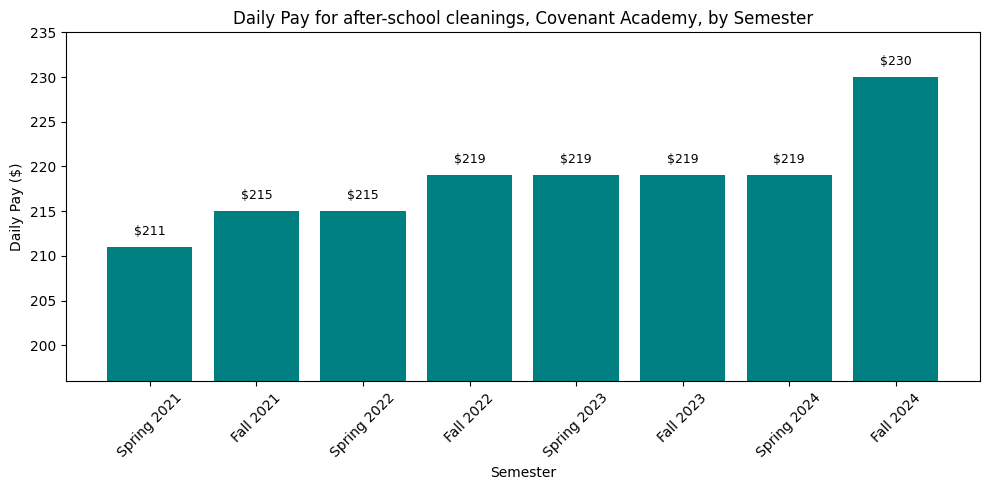

In [72]:
# Combine semester and year
df_semester['semester_label'] = df_semester['semester'] + ' ' + df_semester['year']

# Plot the bar graph
plt.figure(figsize=(10,5))
bars = plt.bar(df_semester['semester_label'], df_semester['daily_pay'], color = 'teal')
plt.title('Daily Pay for after-school cleanings, Covenant Academy, by Semester')
plt.xlabel('Semester')
plt.ylabel('Daily Pay ($)')

# Zoom in to see the differences
plt.ylim(df_semester['daily_pay'].min() - 15, df_semester['daily_pay'].max() + 5)

# Add labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f"${round(height):,}",
        ha='center', va='bottom', fontsize=9
    )

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

We can see that Kathy's Cleaning raised it's prices slightly in the Fall of 2021, Fall 2022, and Fall 2024.

Next, we will see how Kathy's Cleaning has been doing in meeting its goal of $100 per day net income. We will group it by semester.

In [75]:
query = """
SELECT 
    CASE
        WHEN strftime('%m', week_of) IN ('01', '02', '03', '04', '05') THEN 'Spring'
        WHEN strftime('%m', week_of) IN ('08', '09', '10', '11', '12') THEN 'Fall'
        ELSE 'Summer'
    END AS semester,
    strftime('%Y', week_of) AS year,
    ROUND(AVG(kathy),2) AS avg_net_pay
FROM payroll_table
WHERE job_name = 'COV SCHL'
    AND strftime('%m', week_of) NOT IN ('06', '07')                     -- exclude summer months
    AND job_pays BETWEEN 211 AND 230
GROUP BY semester, year
ORDER BY year, semester DESC;
"""
df_net_sem = pd.read_sql(query, engine)
df_net_sem

,semester,year,avg_net_pay
0,Spring,2021,104.87
1,Fall,2021,106.28
2,Spring,2022,113.63
3,Fall,2022,135.79
4,Spring,2023,122.98
5,Fall,2023,113.88
6,Spring,2024,112.80
7,Fall,2024,81.97


Let's graph these results as well.

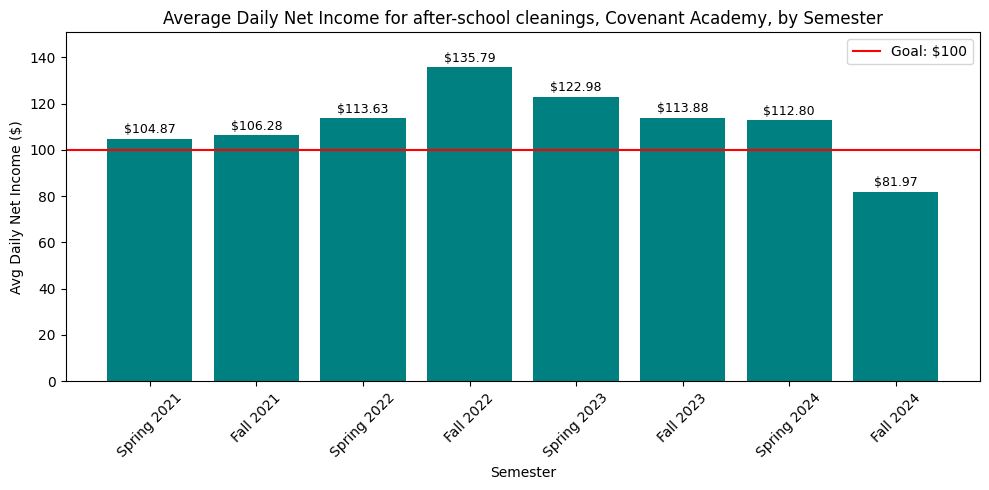

In [77]:
# Combine semester and year
df_net_sem['semester_label'] = df_net_sem['semester'] + ' ' + df_net_sem['year']

# Plot the bar graph
plt.figure(figsize=(10,5))
bars = plt.bar(df_net_sem['semester_label'], df_net_sem['avg_net_pay'], color = 'teal')
plt.title('Average Daily Net Income for after-school cleanings, Covenant Academy, by Semester')
plt.xlabel('Semester')
plt.ylabel('Avg Daily Net Income ($)')
plt.ylim(0, df_net_sem['avg_net_pay'].max() + 15)

# Add horizontal line with legend to indicate target net income of $100
goal = 100
plt.axhline(y=goal, color='red', linestyle='-', linewidth=1.5, label=f'Goal: ${goal}')
plt.legend()

# Add labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f"${height:.2f}",
        ha='center', va='bottom', fontsize=9
    )

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

It is clear that something significant happened in the Fall of 2024 that caused Kathy's Cleaning to dip below it's goal!

Let's delve into Fall 2024 as see what is going on. First, we will look at each employee's actual pay and compare it with their hourly rate.

A review of the printouts_table and pay_table will be helpful in joining them together...

In [80]:
#schema for printouts_table
pd.read_sql("PRAGMA table_info(printouts_table);", engine)

,cid,name,type,notnull,dflt_value,pk
0,0,printouts_id,TEXT,0,None,0
1,1,employee,TEXT,0,None,0
2,2,payroll_id,TEXT,0,None,0
3,3,week_of,DATETIME,0,None,0
4,4,date,DATETIME,0,None,0
5,5,day_of_week,TEXT,0,None,0
6,6,customer_id,TEXT,0,None,0
7,7,job_name,TEXT,0,None,0
8,8,hours,FLOAT,0,None,0
9,9,pay,FLOAT,0,None,0


In [81]:
#schema for pay_table
pd.read_sql("PRAGMA table_info(pay_table);", engine)

,cid,name,type,notnull,dflt_value,pk
0,0,pay_id,TEXT,0,None,0
1,1,week_of,DATETIME,0,None,0
2,2,weekly_emp_pay_id,TEXT,0,None,0
3,3,employee,TEXT,0,None,0
4,4,pay_per_hour,FLOAT,0,None,0
5,5,note,TEXT,0,None,0
6,6,week_number,BIGINT,0,None,0


Now we will join the tables together to compare each employee's actual pay with their respective pay rate for Fall 2024. We will isolate rows in which an employee received an actual hourly rate that differed from their normal hourly rate by more than 2 cents (due to rounding).

In [83]:
# Join tables together for pay comparison, and identify rows that are more than 2 cents off
query = """
-- Join tables together to compare actual and normal hourly rates
WITH compare_pay AS(
    SELECT e.employee, e.date, e.pay, ROUND((e.pay / e.hours),2) AS actual_hourly_pay, y.pay_per_hour AS normal_hourly_pay
    FROM printouts_table AS e
    JOIN pay_table AS y
    ON e.week_of = y.week_of AND e.employee = y.employee
    WHERE e.job_name = 'COV SCHL'
    AND e.date BETWEEN '2024-08-05' AND '2024-12-31'
    GROUP BY e.employee, e.date, y.pay_per_hour
)

-- Identify rows that are more than $0.02 off
SELECT *
FROM compare_pay
WHERE ABS(actual_hourly_pay - normal_hourly_pay) > 0.02
"""

df_compare_pay = pd.read_sql(query, engine)
df_compare_pay

,employee,date,pay,actual_hourly_pay,normal_hourly_pay
0,Brian,2024-08-12 00:00:00.000000,139.20,49.71,14.0
1,Brian,2024-08-26 00:00:00.000000,142.57,56.80,14.0
2,Brian,2024-09-09 00:00:00.000000,179.71,51.35,14.0
3,Brian,2024-09-16 00:00:00.000000,152.37,50.79,14.0
4,Brian,2024-09-30 00:00:00.000000,73.49,65.62,14.0
5,Brian,2024-10-24 00:00:00.000000,75.00,17.16,14.0
6,Brian,2024-10-25 00:00:00.000000,75.00,25.86,14.0
7,Brian,2024-10-30 00:00:00.000000,85.00,19.10,14.0
8,Brian,2024-11-01 00:00:00.000000,85.00,17.89,14.0
9,Brian,2024-11-06 00:00:00.000000,85.00,26.73,14.0


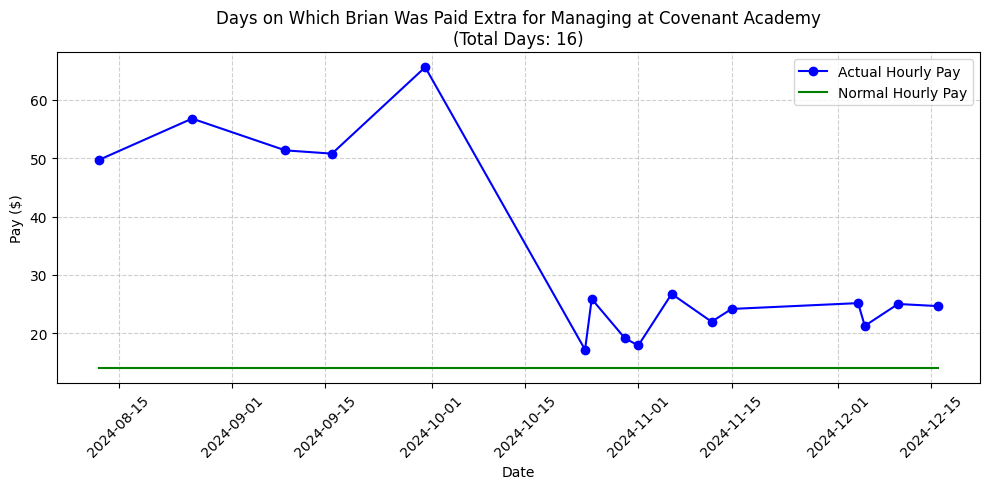

In [84]:
# Ensure datetime for proper sorting
df_compare_pay['date'] = pd.to_datetime(df_compare_pay['date'])
df_compare_pay = df_compare_pay.sort_values('date')

# Plot
plt.figure(figsize=(10, 5))

# Line for actual hourly pay
plt.plot(df_compare_pay['date'], df_compare_pay['actual_hourly_pay'], label="Actual Hourly Pay", color='blue', marker='o')

# Line for normal hourly pay
plt.plot(df_compare_pay['date'], df_compare_pay['normal_hourly_pay'], label="Normal Hourly Pay", color='green')
normal_rate = 14
#plt.axhline(y=normal_rate, color='red', linestyle='-', linewidth=1.5, label=f'Normal hourly rate: ${normal_rate}')

# Styling
total_days = df_compare_pay['date'].nunique()
plt.title("Days on Which Brian Was Paid Extra for Managing at Covenant Academy\n(Total Days: {})".format(total_days))


plt.xlabel('Date')
plt.ylabel('Pay ($)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

We can see that on 16 occasions during the Fall of 2024, employee 'Brian' recieved an actual hourly rate that was above his normal hourly rate.

In speaking with the company, we have learned that this was due to days in which Brian was asked to manage the company and was often given significant compensation for doing so. 

This information is important to know, as these days will skew the results of what the company would have made on a normal business day. There are a couple ways to approach this discrepency.

### Option 1: exclude these days as outliers

The first option is that we can exclude all the days in which Brian was paid extra for managing the team. Having isolated those days already, we can just exclude them from the overall results.

Let's consider how this would effect the overall results by determining what percentage of the Fall 2024 days would be lost.

In [88]:

query = """
WITH compare_pay AS (
    SELECT
        e.employee,
        e.date,
        e.pay,
        ROUND((e.pay / e.hours), 2) AS actual_hourly_pay,
        y.pay_per_hour AS normal_hourly_pay
    FROM printouts_table AS e
    JOIN pay_table AS y
        ON e.week_of = y.week_of AND e.employee = y.employee
    WHERE e.job_name = 'COV SCHL'
      AND e.week_of BETWEEN '2024-08-05' AND '2024-12-31'
    GROUP BY e.employee, e.date, y.pay_per_hour
),

extra_pay_count AS (
    SELECT COUNT(*) AS days_to_exclude
    FROM compare_pay
    WHERE ABS(actual_hourly_pay - normal_hourly_pay) > 0.02
),

total_count AS (
    SELECT COUNT(DISTINCT(date)) AS total_days_fall_2024
    FROM printouts_table
    WHERE job_name = 'COV SCHL'
    AND week_of BETWEEN '2024-08-05' AND '2024-12-31'
)

SELECT
    t.total_days_fall_2024,
    COALESCE(x.days_to_exclude, 0) AS days_to_exclude,
    ROUND(100.0 * x.days_to_exclude / t.total_days_fall_2024) AS percentage_of_days_lost
FROM total_count AS t
LEFT JOIN extra_pay_count AS x
ON 1 = 1;
"""

df = pd.read_sql(query, engine)
df

,total_days_fall_2024,days_to_exclude,percentage_of_days_lost
0,96,16,17.0


Seventeen percent is a lot of data to lose, expecially on a small set of data (96 days), and especially if it can be avoided! Let's look at Option 2.

### Option 2: Instead of excluding entire days in which Brian received extra pay for managing, figure what his hourly pay would have been had he been paid his normal hourly rate. This means, instead of going by the 'pay' column (actual pay received), we will calculate the labor cost manually based on normal hourly pay and hours worked. (kathy worked some of these days anyways, and no way to really determine which days she worked or didn't work)

To help us with this decision, we will look at the previous semesters to see if employees were paid above their normal hourly wage on a regular basis, or if the Fall of 2024 was unique in that manner.

In [92]:
# use the same code as above, but include all semesters prior to Fall 2024 to see if other employees were paid above their hourly wage. Is this a regualr thing?
query = """
WITH compare_pay AS (
    SELECT
        e.employee,
        e.date,
        e.pay,
        ROUND((e.pay / e.hours), 2) AS actual_hourly_pay,
        y.pay_per_hour AS normal_hourly_pay
    FROM printouts_table AS e
    JOIN pay_table AS y
        ON e.week_of = y.week_of AND e.employee = y.employee
    WHERE e.job_name = 'COV SCHL'                                     
    AND e.week_of < '2024-08-05'
    GROUP BY e.employee, e.date, y.pay_per_hour
),

extra_pay_count AS (
    SELECT COUNT(*) AS days_to_exclude
    FROM compare_pay
    WHERE actual_hourly_pay - normal_hourly_pay > 0.02
),

total_count AS (
    SELECT COUNT(DISTINCT(date)) AS total_days_all_semesters
    FROM printouts_table
    WHERE job_name = 'COV SCHL'                                       
    AND week_of < '2024-08-05'
)

SELECT
    t.total_days_all_semesters,
    COALESCE(x.days_to_exclude, 0) AS days_to_exclude,
    ROUND(100.0 * x.days_to_exclude / t.total_days_all_semesters) AS percentage_of_days_lost
FROM total_count AS t
LEFT JOIN extra_pay_count AS x
ON 1 = 1;
"""

df = pd.read_sql(query, engine)
df

,total_days_all_semesters,days_to_exclude,percentage_of_days_lost
0,786,0,0.0


We see that on no other occasion prior to Fall 2024 was an employee paid above than their hourly wage. (Bonuses are figured separately).

This consistency should be carried over into the Fall of 2024 in order to compare it accurately across all semesters.

We will go with **Option 2**: Rather than exclude any days from our Fall 2024 data, we will calculate the labor cost manually based on normal hourly pay and hours worked. 

In [94]:
#not sure what this is for...
query = """
SELECT
    e.employee,
    e.date,
    e.pay,
    (e.pay / e.hours) AS actual_hourly_pay,
    y.pay_per_hour AS normal_hourly_pay
FROM printouts_table AS e
JOIN pay_table AS y
  ON e.week_of = y.week_of AND e.employee = y.employee
WHERE e.job_name = 'COV SCHL'
  AND e.week_of BETWEEN '2024-08-05' AND '2024-12-31'
GROUP BY e.employee, e.date, y.pay_per_hour
"""
df_hourly_pay = pd.read_sql(query, engine)
df_hourly_pay

,employee,date,pay,actual_hourly_pay,normal_hourly_pay
0,Asa,2024-08-12 00:00:00.000000,15.52,9.502041,9.50
1,Asa,2024-08-13 00:00:00.000000,13.46,9.501176,9.50
2,Asa,2024-08-14 00:00:00.000000,11.72,9.502703,9.50
3,Asa,2024-08-15 00:00:00.000000,10.13,9.496875,9.50
4,Asa,2024-08-16 00:00:00.000000,13.93,9.497727,9.50
...,...,...,...,...,...
508,Spencer,2024-12-13 00:00:00.000000,12.94,10.352000,10.35
509,Spencer,2024-12-16 00:00:00.000000,13.80,10.350000,10.35
510,Spencer,2024-12-17 00:00:00.000000,13.97,10.348148,10.35
511,Spencer,2024-12-19 00:00:00.000000,3.97,10.356522,10.35


Find total labor hours and cost per employee per day

In [96]:
# Step 1: Calculate "labor_cost" per cleaning per employee based on hours worked and normal hourly pay rate
query = """
    SELECT 
        e.employee, 
        e.payroll_id,
        e.date, 
        e.hours, 
        e.pay, 
        y.pay_per_hour, 
        (e.hours * y.pay_per_hour) AS labor_cost 
    FROM printouts_table AS e 
    JOIN pay_table AS y 
    ON e.employee = y.employee AND e.week_of = y.week_of
    WHERE e.job_name = 'COV SCHL'
      AND e.hours IS NOT NULL
"""
df = pd.read_sql(query, engine)
df

,employee,payroll_id,date,hours,pay,pay_per_hour,labor_cost
0,Faith,13,2021-01-07 00:00:00.000000,2.000000,19.50,9.75,19.500000
1,Isaiah,1,2021-01-04 00:00:00.000000,2.000000,18.00,9.00,18.000000
2,Isaiah,8,2021-01-06 00:00:00.000000,1.983333,17.85,9.00,17.850000
3,Isaiah,13,2021-01-07 00:00:00.000000,0.966667,8.70,9.00,8.700000
4,Stephen P.,1,2021-01-04 00:00:00.000000,1.916667,21.95,11.45,21.945833
...,...,...,...,...,...,...,...
3955,Janet T,5175,2024-12-16 00:00:00.000000,2.733333,32.80,12.00,32.800000
3956,Janet T,5180,2024-12-17 00:00:00.000000,2.833333,34.00,12.00,34.000000
3957,Janet T,5185,2024-12-18 00:00:00.000000,2.733333,32.80,12.00,32.800000
3958,Janet T,5189,2024-12-19 00:00:00.000000,1.383333,16.60,12.00,16.600000


In [97]:
# Step 2: Aggregate by payroll_id to simulate "total_labor_cost" and "total_hours"
query = """
    WITH employee_hourly_pay AS (
        SELECT 
            e.employee, 
            e.payroll_id, 
            e.date, 
            e.hours, 
            e.pay, 
            y.pay_per_hour, 
            (e.hours * y.pay_per_hour) AS labor_cost 
        FROM printouts_table AS e 
        JOIN pay_table AS y 
        ON e.employee = y.employee AND e.week_of = y.week_of
            WHERE e.job_name = 'COV SCHL'
              AND e.hours IS NOT NULL
    )

    SELECT 
        payroll_id, date,
        SUM(hours) AS total_hours,
        SUM(labor_cost) AS total_labor_cost
    FROM employee_hourly_pay
    GROUP BY payroll_id
"""
df = pd.read_sql(query, engine)
df

,payroll_id,date,total_hours,total_labor_cost
0,1,2021-01-04 00:00:00.000000,3.916667,39.945833
1,1003,2021-11-04 00:00:00.000000,12.950000,135.150000
2,1008,2021-11-05 00:00:00.000000,12.933333,134.433333
3,1014,2021-11-08 00:00:00.000000,15.450000,160.058333
4,1019,2021-11-09 00:00:00.000000,11.966667,124.425000
...,...,...,...,...
873,976,2021-10-29 00:00:00.000000,13.616667,143.200000
874,984,2021-11-01 00:00:00.000000,12.283333,125.825000
875,99,2021-02-04 00:00:00.000000,9.033333,90.598333
876,990,2021-11-02 00:00:00.000000,11.350000,116.379167


In [98]:
# Step 3: Join with payroll_table to get income/profit context and figure "calculated_profit"
query = """
    WITH employee_hourly_pay AS (
        SELECT e.employee, 
            e.payroll_id, 
            e.date, 
            e.hours, 
            e.pay, 
            y.pay_per_hour, 
            (e.hours * y.pay_per_hour) AS labor_cost 
        FROM printouts_table AS e 
        JOIN pay_table AS y 
        ON e.employee = y.employee AND e.week_of = y.week_of
        WHERE e.hours IS NOT NULL
    )
    
    , labor_by_job AS (
        SELECT payroll_id,
            SUM(hours) AS total_hours,
            SUM(labor_cost) AS total_labor_cost
        FROM employee_hourly_pay
        GROUP BY payroll_id
      )
      
      SELECT 
          j.date,
          j.week_of,
          j.day_of_week,
          j.payroll_id,
          j.job_pays AS daily_income,
                                                   -- exclude j.kathy AS daily_profit,
          l.total_hours,
          l.total_labor_cost,
          (j.job_pays - l.total_labor_cost) AS calculated_profit
      FROM payroll_table AS j
      JOIN labor_by_job AS l
        ON j.payroll_id = l.payroll_id
     WHERE job_name = 'COV SCHL'
        AND strftime('%m', week_of) NOT IN ('06', '07')
        AND job_pays BETWEEN 211 AND 230;
"""
df = pd.read_sql(query, engine)
df

,date,week_of,day_of_week,payroll_id,daily_income,total_hours,total_labor_cost,calculated_profit
0,2021-01-04 00:00:00.000000,2021-01-04 00:00:00.000000,Monday,1,211.0,3.916667,39.945833,171.054167
1,2021-01-07 00:00:00.000000,2021-01-04 00:00:00.000000,Thursday,13,211.0,4.966667,51.100000,159.900000
2,2021-01-11 00:00:00.000000,2021-01-11 00:00:00.000000,Monday,23,211.0,11.683333,113.351667,97.648333
3,2021-01-12 00:00:00.000000,2021-01-11 00:00:00.000000,Tuesday,27,211.0,12.700000,124.873333,86.126667
4,2021-01-13 00:00:00.000000,2021-01-11 00:00:00.000000,Wednesday,28,211.0,13.400000,130.635000,80.365000
...,...,...,...,...,...,...,...,...
734,2024-12-16 00:00:00.000000,2024-12-16 00:00:00.000000,Monday,5175,230.0,16.200000,195.614167,34.385833
735,2024-12-17 00:00:00.000000,2024-12-16 00:00:00.000000,Tuesday,5180,230.0,13.133333,160.788333,69.211667
736,2024-12-18 00:00:00.000000,2024-12-16 00:00:00.000000,Wednesday,5185,230.0,9.966667,122.833333,107.166667
737,2024-12-19 00:00:00.000000,2024-12-16 00:00:00.000000,Thursday,5189,230.0,9.550000,111.141667,118.858333


The final column, "calculated_profit" is the profit figure we were going for based on hourly wage and hours worked.

In [100]:
# Step 4: Break it down by semester
query = """
    WITH employee_hourly_pay AS (
        SELECT e.employee, 
            e.payroll_id, 
            e.date, 
            e.hours, 
            e.pay, 
            y.pay_per_hour, 
            (e.hours * y.pay_per_hour) AS labor_cost 
        FROM printouts_table AS e 
        JOIN pay_table AS y 
        ON e.employee = y.employee AND e.week_of = y.week_of
        WHERE e.hours IS NOT NULL
    ),
    
    labor_by_job AS (
        SELECT payroll_id,
            SUM(hours) AS total_hours,
            SUM(labor_cost) AS total_labor_cost
        FROM employee_hourly_pay
        GROUP BY payroll_id
    ),

    calculated_profit AS (
        SELECT 
          j.date,
          j.week_of,
          j.day_of_week,
          j.payroll_id,
          j.job_pays AS daily_income,
          j.kathy AS daily_profit,
          l.total_hours,
          l.total_labor_cost,
          (j.job_pays - l.total_labor_cost) AS calculated_profit
        FROM payroll_table AS j
        JOIN labor_by_job AS l
        ON j.payroll_id = l.payroll_id
        WHERE job_name = 'COV SCHL'
            AND strftime('%m', week_of) NOT IN ('06', '07')
            AND job_pays BETWEEN 211 AND 230
    )
     
    SELECT 
        CASE
            WHEN strftime('%m', week_of) IN ('01', '02', '03', '04', '05') THEN 'Spring'
            WHEN strftime('%m', week_of) IN ('08', '09', '10', '11', '12') THEN 'Fall'
            ELSE 'Summer'
        END AS semester,
        strftime('%Y', week_of) AS year,
        ROUND(AVG(calculated_profit),2) AS avg_net_profit
    FROM calculated_profit
    GROUP BY semester, year
    ORDER BY year, semester DESC
"""
df_new_net_sem = pd.read_sql(query, engine)
df_new_net_sem

,semester,year,avg_net_profit
0,Spring,2021,102.62
1,Fall,2021,104.09
2,Spring,2022,109.41
3,Fall,2022,133.37
4,Spring,2023,118.89
5,Fall,2023,107.84
6,Spring,2024,105.87
7,Fall,2024,89.78


What we have done is update the Fall of 2024 to reflect a more accurate picture of company profit under current employee's hourly wages. 

Now let's graph it.

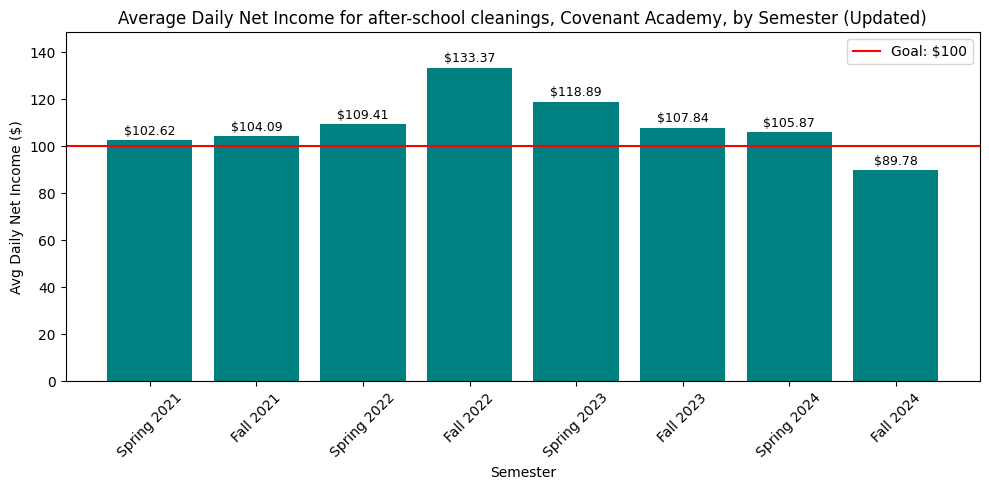

In [102]:
# Combine semester and year
df_new_net_sem['semester_label'] = df_new_net_sem['semester'] + ' ' + df_new_net_sem['year']

# Plot the bar graph
plt.figure(figsize=(10,5))
bars = plt.bar(df_new_net_sem['semester_label'], df_new_net_sem['avg_net_profit'], color = 'teal')
plt.title('Average Daily Net Income for after-school cleanings, Covenant Academy, by Semester (Updated)')
plt.xlabel('Semester')
plt.ylabel('Avg Daily Net Income ($)')
plt.ylim(0, df_new_net_sem['avg_net_profit'].max() + 15)

# Add horizontal line with legend to indicate target net income of $100
goal = 100
plt.axhline(y=goal, color='red', linestyle='-', linewidth=1.5, label=f'Goal: ${goal}')
plt.legend()

# Add labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f"${height:.2f}",
        ha='center', va='bottom', fontsize=9
    )

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Using this updated chart we get a clearer picture. However, the Fall of 2024 is still below the $100 per day profit benchmark.

Let's compare previous semesters with the Fall of 2024 in a few ways:
1. average total hours worked per day
2. hourly wages of employees
3. average number of employees per day

In [104]:
# This figures how many total hours are worked per semester, how many total days are worked each semester, and then from that, finds the avg hours worked per day by semester.
query = """
SELECT 
    CASE
        WHEN strftime('%m', e.week_of) IN ('01', '02', '03', '04', '05') THEN 'Spring'
        WHEN strftime('%m', e.week_of) IN ('08', '09', '10', '11', '12') THEN 'Fall'
        ELSE 'Summer'
    END AS semester,
    strftime('%Y', e.week_of) AS year,
    SUM(e.hours) AS total_hours_worked,
    COUNT(DISTINCT(j.payroll_id)) AS total_days_worked,
    SUM(e.hours) / COUNT(DISTINCT(j.payroll_id)) AS avg_hours_worked_per_day
FROM printouts_table AS e
JOIN payroll_table AS j
ON e.payroll_id = j.payroll_id
WHERE j.job_name = 'COV SCHL'
AND j.job_pays BETWEEN 211 AND 230
AND strftime('%m', j.week_of) NOT IN ('06', '07')
GROUP BY year, semester
ORDER BY year, semester DESC
"""
df = pd.read_sql(query, engine)
df

,semester,year,total_hours_worked,total_days_worked,avg_hours_worked_per_day
0,Spring,2021,1027.301053,95,10.813695
1,Fall,2021,964.784211,92,10.486785
2,Spring,2022,968.683333,96,10.090451
3,Fall,2022,694.183333,92,7.545471
4,Spring,2023,803.930000,94,8.552447
5,Fall,2023,854.016159,87,9.816278
6,Spring,2024,875.283333,92,9.513949
7,Fall,2024,1031.490487,95,10.857795


In [105]:
# This starts with the payroll_id (individual work day). It figures the total num hours worked, and the num workers for each day.

query = """

    SELECT j.payroll_id, j.date, SUM(e.hours) AS total_hours_worked, COUNT(DISTINCT(e.employee)) AS num_employees, AVG(pay_per_hour)
    FROM printouts_table AS e
    JOIN payroll_table AS j
      ON e.payroll_id = j.payroll_id
    JOIN pay_table AS y
      ON e.employee = y.employee AND e.week_of = y.week_of
    WHERE j.customer_id = 6
      AND j.job_pays BETWEEN 211 AND 230
      AND strftime('%m', j.week_of) NOT IN ('06', '07')
    GROUP BY j.payroll_id
    ORDER BY j.date
"""
df = pd.read_sql(query, engine)
df

,payroll_id,date,total_hours_worked,num_employees,AVG(pay_per_hour)
0,1,2021-01-04 00:00:00.000000,3.916667,2,10.225000
1,13,2021-01-07 00:00:00.000000,4.966667,3,10.066667
2,23,2021-01-11 00:00:00.000000,11.683333,6,9.508333
3,27,2021-01-12 00:00:00.000000,12.700000,5,9.760000
4,28,2021-01-13 00:00:00.000000,13.400000,5,9.750000
...,...,...,...,...,...
738,5175,2024-12-16 00:00:00.000000,16.200000,7,11.742857
739,5180,2024-12-17 00:00:00.000000,13.133333,6,12.033333
740,5185,2024-12-18 00:00:00.000000,9.966667,5,12.300000
741,5189,2024-12-19 00:00:00.000000,9.550000,7,11.742857


In [106]:
# First find all three averages by the day...
query = """

    SELECT 
        j.date, 
        CASE
            WHEN strftime('%m', j.date) IN ('01', '02', '03', '04', '05') THEN 'Spring'
            WHEN strftime('%m', j.date) IN ('08', '09', '10', '11', '12') THEN 'Fall'
            ELSE 'Summer'
        END AS semester,
        strftime('%Y', j.date) AS year,
        SUM(e.hours) AS total_hours_worked, 
        COUNT(DISTINCT(e.employee)) AS num_employees, 
        AVG(y.pay_per_hour) AS avg_pay_per_hour
    FROM printouts_table AS e
    JOIN payroll_table AS j
      ON e.payroll_id = j.payroll_id
    JOIN pay_table AS y
      ON e.employee = y.employee AND e.week_of = y.week_of
    WHERE j.job_name = 'COV SCHL'
      AND j.job_pays BETWEEN 211 AND 230
      AND strftime('%m', j.week_of) NOT IN ('06', '07')
    GROUP BY j.payroll_id
    ORDER BY j.date

"""
df = pd.read_sql(query, engine)
df

,date,semester,year,total_hours_worked,num_employees,avg_pay_per_hour
0,2021-01-04 00:00:00.000000,Spring,2021,3.916667,2,10.225000
1,2021-01-07 00:00:00.000000,Spring,2021,4.966667,3,10.066667
2,2021-01-11 00:00:00.000000,Spring,2021,11.683333,6,9.508333
3,2021-01-12 00:00:00.000000,Spring,2021,12.700000,5,9.760000
4,2021-01-13 00:00:00.000000,Spring,2021,13.400000,5,9.750000
...,...,...,...,...,...,...
738,2024-12-16 00:00:00.000000,Fall,2024,16.200000,7,11.742857
739,2024-12-17 00:00:00.000000,Fall,2024,13.133333,6,12.033333
740,2024-12-18 00:00:00.000000,Fall,2024,9.966667,5,12.300000
741,2024-12-19 00:00:00.000000,Fall,2024,9.550000,7,11.742857


In [107]:
# With that, we can now find all three averages by the semester
query = """
WITH daily_employees AS (
    SELECT 
        j.date,
        CASE
            WHEN strftime('%m', j.week_of) IN ('01','02','03','04','05') THEN 'Spring'
            WHEN strftime('%m', j.week_of) IN ('08','09','10','11','12') THEN 'Fall'
            ELSE 'Summer'
        END AS semester,
        strftime('%Y', j.week_of) AS year,
        SUM(e.hours) AS total_hours_per_day,
        COUNT(DISTINCT e.employee) AS num_employees,
        AVG(y.pay_per_hour) AS avg_pay_per_hour
    FROM printouts_table AS e
    JOIN payroll_table AS j 
      ON e.payroll_id = j.payroll_id
    JOIN pay_table AS y
      ON e.employee = y.employee AND e.week_of = y.week_of
    WHERE strftime('%m', j.week_of) NOT IN ('06','07')
    AND j.job_name = 'COV SCHL'
    AND j.job_pays BETWEEN 211 AND 230    
    GROUP BY j.date
)

SELECT 
    semester, 
    year, 
    ROUND(AVG(total_hours_per_day), 2) AS avg_hours_per_day, 
    ROUND(AVG(num_employees), 2) AS avg_num_employees_per_day, 
    ROUND(AVG(avg_pay_per_hour), 2) AS avg_hourly_wage
FROM daily_employees
GROUP BY semester, year
ORDER BY year, semester DESC;
"""
df_q1_averages = pd.read_sql(query, engine)
df_q1_averages

,semester,year,avg_hours_per_day,avg_num_employees_per_day,avg_hourly_wage
0,Spring,2021,10.81,4.79,9.99
1,Fall,2021,10.49,4.92,10.41
2,Spring,2022,10.09,5.22,10.24
3,Fall,2022,7.55,3.99,10.97
4,Spring,2023,8.55,4.48,11.36
5,Fall,2023,9.82,5.53,11.08
6,Spring,2024,9.51,5.27,11.68
7,Fall,2024,11.34,5.39,12.01


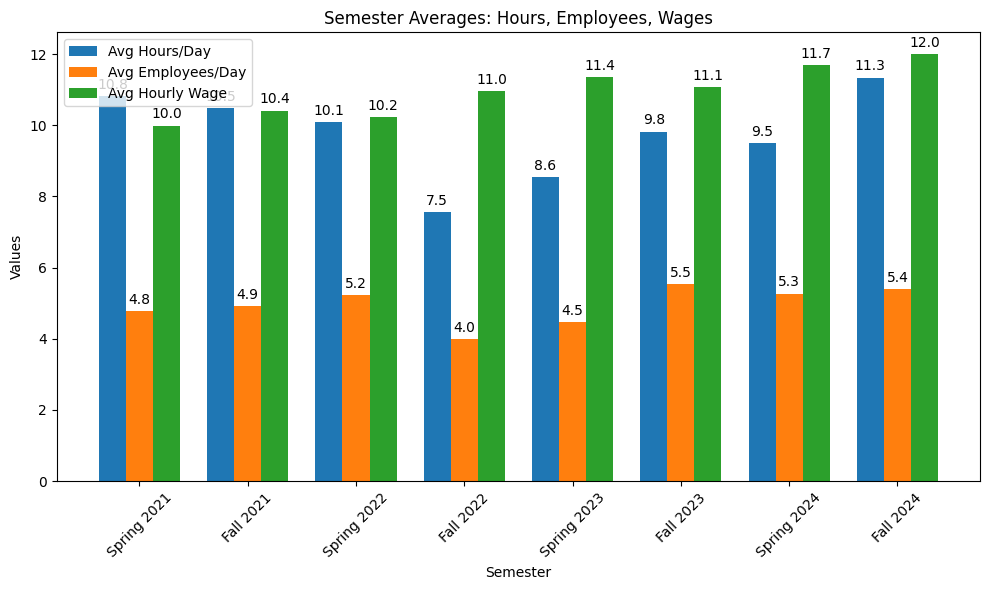

In [108]:
# chat gpt...not sure if i will use...

import matplotlib.pyplot as plt
import numpy as np

# Assume df_q1_averages is already available
# Create a combined label for semester and year
df_q1_averages['label'] = df_q1_averages['semester'] + ' ' + df_q1_averages['year']

labels = df_q1_averages['label']
x = np.arange(len(labels))  # label locations
width = 0.25  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting each of the three metrics
bars1 = ax.bar(x - width, df_q1_averages['avg_hours_per_day'], width, label='Avg Hours/Day')
bars2 = ax.bar(x, df_q1_averages['avg_num_employees_per_day'], width, label='Avg Employees/Day')
bars3 = ax.bar(x + width, df_q1_averages['avg_hourly_wage'], width, label='Avg Hourly Wage')

# Adding labels and title
ax.set_xlabel('Semester')
ax.set_ylabel('Values')
ax.set_title('Semester Averages: Hours, Employees, Wages')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

# Optional: add value labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

plt.tight_layout()
plt.show()


In order to determine how many hours employees should be working each day in order for the business to meet it's average profit goal per day, we need to consider the following:
1. The job pays the business **$230 per day**.
2. The *profit goal* after paying employees is **$100 per day**.
3. The *total hours* worked per day on average for Fall 2024 is **11.32 hours**.
4. The *number of employees* who work per day on average for Fall 2024 is **5.32 workers**.
5. The *average hourly wage* of workers for Fall 2024 is **$12.01/per hour**.

These are the current conditions. The question is how do we change total hours in order to attain profit goal. In other words, we want to change #3 in order to reach #2.

Here is the formula to solve for Maximum Average Total Hours for all Employees per Day:

    Required Total Hours = (Job Pays – Profit Goal) / Avg Hourly Wage
    Required Total Hours = (230 - 100) / Avg Hourly Wage


Here is the formula for distributing hours across employees:

    Hours per Employee = max_hours_permitted_per_day / avg_num_employees_per_day


Option 1: We can figure the average maximum total hours per day for all employees across that board, as well as a set number of hours that every employee must work.

In [113]:
# Step 1: Solve for Total Hours
query = """
WITH daily_employees AS (
    SELECT 
        j.date,
        CASE
            WHEN strftime('%m', j.week_of) IN ('01','02','03','04','05') THEN 'Spring'
            WHEN strftime('%m', j.week_of) IN ('08','09','10','11','12') THEN 'Fall'
            ELSE 'Summer'
        END AS semester,
        strftime('%Y', j.week_of) AS year,
        SUM(e.hours) AS total_hours_per_day,
        COUNT(DISTINCT e.employee) AS num_employees,
        AVG(y.pay_per_hour) AS avg_pay_per_hour
    FROM printouts_table AS e
    JOIN payroll_table AS j 
      ON e.payroll_id = j.payroll_id
    JOIN pay_table AS y
      ON e.employee = y.employee AND e.week_of = y.week_of
    WHERE strftime('%m', j.week_of) NOT IN ('06','07')
    AND j.job_name = 'COV SCHL'
    AND j.job_pays BETWEEN 211 AND 230    
    GROUP BY j.date
),

max_hours AS (
    SELECT 
        semester, 
        year, 
        ROUND(AVG(total_hours_per_day), 2) AS avg_hours_per_day,
        ROUND((230 - 100) / AVG(avg_pay_per_hour), 2) AS max_hours_permitted_per_day,        -- Add formula for total hours
        ROUND(AVG(num_employees), 2) AS avg_num_employees_per_day, 
        ROUND(AVG(avg_pay_per_hour), 2) AS avg_hourly_wage
    FROM daily_employees
    GROUP BY semester, year
    ORDER BY year, semester DESC
)

SELECT 
    semester,
    year,
    avg_hours_per_day,
    max_hours_permitted_per_day,
    CASE
        WHEN max_hours_permitted_per_day >= avg_hours_per_day THEN 'No'
        ELSE 'Yes'
    END AS hours_exceeded
FROM max_hours
GROUP BY semester, year
ORDER BY year, semester DESC;
"""
df_q1_exceeded_hrs = pd.read_sql(query, engine)
df_q1_exceeded_hrs

,semester,year,avg_hours_per_day,max_hours_permitted_per_day,hours_exceeded
0,Spring,2021,10.81,13.02,No
1,Fall,2021,10.49,12.48,No
2,Spring,2022,10.09,12.70,No
3,Fall,2022,7.55,11.85,No
4,Spring,2023,8.55,11.44,No
5,Fall,2023,9.82,11.73,No
6,Spring,2024,9.51,11.13,No
7,Fall,2024,11.34,10.83,Yes


We see that Fall 2024 exceeds the maximum total hours permitted per day to attain the profit goal.

In [115]:
# Step 2: Solve for Hours per Employee (Limited to Fall 2024)
query = """
WITH daily_employees AS (
    SELECT 
        j.date,
        CASE
            WHEN strftime('%m', j.week_of) IN ('01','02','03','04','05') THEN 'Spring'
            WHEN strftime('%m', j.week_of) IN ('08','09','10','11','12') THEN 'Fall'
            ELSE 'Summer'
        END AS semester,
        strftime('%Y', j.week_of) AS year,
        SUM(e.hours) AS total_hours_per_day,
        COUNT(DISTINCT e.employee) AS num_employees,
        AVG(y.pay_per_hour) AS avg_pay_per_hour
    FROM printouts_table AS e
    JOIN payroll_table AS j 
      ON e.payroll_id = j.payroll_id
    JOIN pay_table AS y
      ON e.employee = y.employee AND e.week_of = y.week_of
    WHERE strftime('%m', j.week_of) NOT IN ('06','07')
    AND j.job_name = 'COV SCHL'
    AND j.job_pays BETWEEN 211 AND 230    
    GROUP BY j.date
),

max_hours AS (
    SELECT 
        semester, 
        year, 
        AVG(total_hours_per_day) AS avg_hours_per_day,
        (230 - 100) / AVG(avg_pay_per_hour) AS max_hours_permitted_per_day,                                -- Add formula for total hours
        AVG(num_employees) AS avg_num_employees_per_day, 
        AVG(avg_pay_per_hour) AS avg_hourly_wage
    FROM daily_employees
    GROUP BY semester, year
    ORDER BY year, semester DESC
),

hours_comparison AS(
    SELECT 
        semester,
        year,
        avg_hours_per_day,
        max_hours_permitted_per_day,
        avg_hours_per_day / avg_num_employees_per_day AS avg_hours_per_employee,                            -- Add formula for hours per employee
        max_hours_permitted_per_day / avg_num_employees_per_day AS max_hours_permitted_per_employee
    FROM max_hours
    GROUP BY semester, year
)

SELECT 
    semester, 
    year, 
    ROUND(avg_hours_per_day, 2) AS avg_hours_per_day,
    ROUND(max_hours_permitted_per_day, 2) AS max_hours_permitted_per_day,
    ROUND(avg_hours_per_day - max_hours_permitted_per_day, 2) AS hours_per_day_difference,
    ROUND(avg_hours_per_employee, 2) AS avg_hours_per_employee,
    ROUND(max_hours_permitted_per_employee, 2) AS max_hours_permitted_per_employee, 
    ROUND(avg_hours_per_employee - max_hours_permitted_per_employee, 2) AS hours_per_employee_difference
FROM hours_comparison
WHERE semester = 'Fall'                                                                                         -- Limit to Fall 2024
  AND year = '2024'
GROUP BY semester, year
ORDER BY year, semester DESC;
"""
df_q1_exceeded_hrs = pd.read_sql(query, engine)
df_q1_exceeded_hrs

,semester,year,avg_hours_per_day,max_hours_permitted_per_day,hours_per_day_difference,avg_hours_per_employee,max_hours_permitted_per_employee,hours_per_employee_difference
0,Fall,2024,11.34,10.83,0.51,2.1,2.01,0.09


According to our figures, the business permitted 0.5 hours per day extra in Fall 2024, which amounts to 0.09 hours (or 5.4 minutes) extra per employee per day, on average.

Following Option 1, each employee would be required to work 2.01 hours or less per day. 

However, this option fails to recognize the unique schedules of each employee. Some are only able to work about one hour per day. Others can only work certain days of the week. Besides, the business want to maximize the hours for employees that have a lower hourly wage. Finally, this option does not give a weighted measurement of the current varying working hours of the employees. 

( Do a graph showing the avg hours per week (or per week day) of all employees at Covenant)
( Do a quick calculation showing if each employee working two hours per week really meets profit goal.) optional?

Option 2: Take into consideration additional current conditions to reach a more accurate and reasonable picture of the change in hours that need to take place.

In speaking with the business, additional "current conditions" that should be considered include:

- As mentioned above, the business wants to (and already does) maximize the hours of employees who have a lower hourly wage, as this is more profitable.
- Employees who are students (generally those who have a lower hourly wage) have strict hours that they are able to work due to their individual after-school schedules.
- The assistant manager's number of hours cannot change much due to his responsibilities given him for the job.

So, that means we have two categories of workers, "students" and "assistant manager", whose number of work hours should stay about the same. This leaves one other category of employees, "adults". Adults are those remaining employees who are not students and do not hold a management position.

It is not reasonable to limit the assistant manager's hours to two hours each day, nor increase all the student's hours as they are already maxed out. The adult employee's hours, however, are adjustable. These additional factors must be considered. 
Therefore, we will go with **Option #2**.

This means dividing employees into the following buckets: "students," "adults," and "assistant manager."
We know who the assistant manager is. But how do we define the others?

A "student" is an employee who is under 19 years of age and who does not work at houses, as this requires special training. (He/she mostly only works at Covenant Academy.)

An "adult" is a non-management employee who is 19 years old or older. Most of them also work at houses.

We will identify the groups as follows: 
- "assistant mgr": employee "Brian"
- "student": employee who is under age 19 and who does not clean at houses.
- "adult": all other employees

Let's begin by finding all the employees who worked at Covenant Academy in Fall 2024. We will include their ages (as of the start of the semester), current hourly wage, and whether or not they worked at houses.

In [124]:
# Find current employees, along with their current age, pay per hour.
query = """
SELECT 
    e.employee, 
    m.birthday,
    '2024-08-05' - m.birthday  AS age,                                  -- find age as of start of semester
    y.pay_per_hour
FROM printouts_table AS e
JOIN pay_table AS y
  ON e.week_of = y.week_of AND e.employee = y.employee
JOIN employee_table AS m
  ON y.employee = m.employee_id
WHERE e.week_of >= '2024-08-05'                                         -- since Fall 2024 semester began
  AND e.customer_id = 6                                                 -- Covenant Academy
GROUP BY e.employee, y.pay_per_hour
ORDER BY m.birthday
"""
df = pd.read_sql(query, engine)
df

,employee,birthday,age,pay_per_hour
0,Cindy,1956-06-01 00:00:00.000000,68,13.00
1,Janet T,1965-04-10 00:00:00.000000,59,12.00
2,Lisa,1966-11-11 00:00:00.000000,58,12.00
3,Brian,1978-03-22 00:00:00.000000,46,14.00
4,Janet,1985-09-15 00:00:00.000000,39,12.50
5,MaKayla,2006-05-15 00:00:00.000000,18,10.35
6,Spencer,2007-06-26 00:00:00.000000,17,9.85
7,Spencer,2007-06-26 00:00:00.000000,17,10.35
8,MaKenna,2008-06-20 00:00:00.000000,16,10.00
9,Asa,2009-05-06 00:00:00.000000,15,9.50


We see that employee 'Spencer' has two different hourly pays during the semester. Let's look into this closer.

In [126]:
# Spencer's pay fall 2024
query = """
SELECT e.employee, e.week_of, y.pay_per_hour
FROM printouts_table AS e
JOIN pay_table AS y
ON e.week_of = y.week_of AND e.employee = y.employee
WHERE e.week_of >= '2024-08-05'
AND e.customer_id = 6
AND e.employee = 'Spencer'
--GROUP BY e.employee, y.pay_per_hour
"""
df = pd.read_sql(query, engine)
df

,employee,week_of,pay_per_hour
0,Spencer,2024-08-05 00:00:00.000000,9.85
1,Spencer,2024-08-05 00:00:00.000000,9.85
2,Spencer,2024-08-12 00:00:00.000000,10.35
3,Spencer,2024-08-12 00:00:00.000000,10.35
4,Spencer,2024-08-12 00:00:00.000000,10.35
...,...,...,...
72,Spencer,2024-12-09 00:00:00.000000,10.35
73,Spencer,2024-12-16 00:00:00.000000,10.35
74,Spencer,2024-12-16 00:00:00.000000,10.35
75,Spencer,2024-12-16 00:00:00.000000,10.35


It looks like Spencer received a pay raise the second week of the semester, the week of 08-12-2024. So we will base pay_per_hour starting with that week.

In [128]:
# Find current employees, along with their current age, pay per hour (Updated).
query = """
SELECT 
    e.employee, 
    m.birthday,
    '2024-08-05' - m.birthday  AS age,                                  -- find age as of start of semester
    y.pay_per_hour
FROM printouts_table AS e
JOIN pay_table AS y
  ON e.week_of = y.week_of AND e.employee = y.employee
JOIN employee_table AS m
  ON y.employee = m.employee_id
WHERE e.week_of >= '2024-08-12'                                         -- pay/hr based on second week of Fall 2024 
  AND e.customer_id = 6                                                 -- Covenant Academy
GROUP BY e.employee, y.pay_per_hour
ORDER BY m.birthday
"""
df = pd.read_sql(query, engine)
df

,employee,birthday,age,pay_per_hour
0,Cindy,1956-06-01 00:00:00.000000,68,13.00
1,Janet T,1965-04-10 00:00:00.000000,59,12.00
2,Lisa,1966-11-11 00:00:00.000000,58,12.00
3,Brian,1978-03-22 00:00:00.000000,46,14.00
4,Janet,1985-09-15 00:00:00.000000,39,12.50
5,MaKayla,2006-05-15 00:00:00.000000,18,10.35
6,Spencer,2007-06-26 00:00:00.000000,17,10.35
7,MaKenna,2008-06-20 00:00:00.000000,16,10.00
8,Asa,2009-05-06 00:00:00.000000,15,9.50


In [129]:
# test for below... includes j.job_pays BETWEEN 211 AND 230
query = """
SELECT 
    e.employee,
    e.day_of_week,
    AVG(e.hours)
FROM printouts_table AS e
JOIN employee_table AS m
  ON e.employee = m.employee_id
JOIN payroll_table AS j
  ON e.payroll_id = j.payroll_id
WHERE e.week_of >= '2024-08-05'                                         -- start of Fall 2024 semester 
  AND e.customer_id = 6                                                 -- Covenant Academy
  AND j.job_pays BETWEEN 211 AND 230
GROUP BY e.employee, e.day_of_week
"""
df = pd.read_sql(query, engine)
df

,employee,day_of_week,AVG(e.hours)
0,Asa,Friday,1.056250
1,Asa,Monday,1.063333
2,Asa,Thursday,1.040741
3,Asa,Tuesday,1.010000
4,Asa,Wednesday,0.907407
5,Brian,Friday,3.382815
6,Brian,Monday,3.011569
7,Brian,Thursday,3.253889
8,Brian,Tuesday,3.841779
9,Brian,Wednesday,3.594074


We want to find all employees who have ever been trained at cleaning houses. This is a full list, so we will only show the first five below. 

In [131]:
# Find who has cleaned at houses, limit 5.
query = """
SELECT DISTINCT e.employee AS clean_houses
FROM customer_table AS c
JOIN printouts_table AS e 
  ON c.customer_id = e.customer_id
WHERE c.customer_type = 'house'
LIMIT 5;
"""

df_if_houses = pd.read_sql(query, engine)
df_if_houses

,clean_houses
0,Annika
1,Ansley
2,Brian
3,Cindy
4,Emily


In [132]:
# Join this list with the "current employees" table we queried above.
query = """
WITH age_cte AS(
    SELECT 
        e.employee, 
        m.birthday,
        CAST(strftime('%Y', '2024-08-05')AS INTEGER) - CAST(strftime('%Y', m.birthday)AS INTEGER)  AS age,       
        y.pay_per_hour
    FROM printouts_table AS e
    JOIN pay_table AS y
      ON e.week_of = y.week_of AND e.employee = y.employee
    JOIN employee_table AS m
      ON y.employee = m.employee_id
    WHERE e.week_of >= '2024-08-12'                                        
      AND e.customer_id = 6                                                
    GROUP BY e.employee, y.pay_per_hour, m.birthday
),

house_cte AS (
    SELECT DISTINCT e.employee AS cleans_houses
    FROM customer_table AS c
    JOIN printouts_table AS e 
      ON c.customer_id = e.customer_id
    WHERE c.customer_type = 'house'
),

summary_cte AS (
    SELECT *
    FROM age_cte
    FULL JOIN house_cte
      ON age_cte.employee = house_cte.cleans_houses
)

SELECT 
    COALESCE(employee, cleans_houses) AS employee,
    employee,
    birthday,
    age,
    pay_per_hour,
    CASE
        WHEN cleans_houses IS NOT NULL THEN 'Yes'
        ELSE 'No'
    END AS cleans_houses
FROM summary_cte
WHERE COALESCE(employee, cleans_houses) IS NOT NULL;

"""
df = pd.read_sql(query, engine)
df

,employee,employee,birthday,age,pay_per_hour,cleans_houses
0,Asa,Asa,2009-05-06 00:00:00.000000,15.0,9.50,No
1,Brian,Brian,1978-03-22 00:00:00.000000,46.0,14.00,Yes
2,Cindy,Cindy,1956-06-01 00:00:00.000000,68.0,13.00,Yes
3,Janet,Janet,1985-09-15 00:00:00.000000,39.0,12.50,Yes
4,Janet T,Janet T,1965-04-10 00:00:00.000000,59.0,12.00,Yes
5,Lisa,Lisa,1966-11-11 00:00:00.000000,58.0,12.00,Yes
6,MaKayla,MaKayla,2006-05-15 00:00:00.000000,18.0,10.35,No
7,MaKenna,MaKenna,2008-06-20 00:00:00.000000,16.0,10.00,No
8,Spencer,Spencer,2007-06-26 00:00:00.000000,17.0,10.35,No
9,Annika,None,None,NaN,NaN,Yes


In [133]:
# Use the above query to determine which current employees clean houses.
query = """
WITH age_cte AS (
    SELECT 
        e.employee, 
        m.birthday,
        CAST(strftime('%Y', '2024-08-05') AS INTEGER) - CAST(strftime('%Y', m.birthday) AS INTEGER) AS age,
        y.pay_per_hour
    FROM printouts_table AS e
    JOIN pay_table AS y
      ON e.week_of = y.week_of AND e.employee = y.employee
    JOIN employee_table AS m
      ON y.employee = m.employee_id
    WHERE e.week_of >= '2024-08-12'
      AND e.customer_id = 6
    GROUP BY e.employee, y.pay_per_hour, m.birthday
),

house_cte AS (
    SELECT DISTINCT e.employee AS cleans_houses
    FROM customer_table AS c
    JOIN printouts_table AS e 
      ON c.customer_id = e.customer_id
    WHERE c.customer_type = 'house'
),

summary_cte AS(
    SELECT *
    FROM age_cte
    FULL JOIN house_cte
      ON age_cte.employee = house_cte.cleans_houses
)

SELECT 
    employee,
    birthday,
    age,
    pay_per_hour,
    CASE
        WHEN cleans_houses IS NOT NULL THEN 'Yes'
        ELSE 'No'
    END AS cleans_houses
FROM summary_cte
WHERE employee IS NOT NULL;
"""

df = pd.read_sql(query, engine)
df

,employee,birthday,age,pay_per_hour,cleans_houses
0,Asa,2009-05-06 00:00:00.000000,15,9.50,No
1,Brian,1978-03-22 00:00:00.000000,46,14.00,Yes
2,Cindy,1956-06-01 00:00:00.000000,68,13.00,Yes
3,Janet,1985-09-15 00:00:00.000000,39,12.50,Yes
4,Janet T,1965-04-10 00:00:00.000000,59,12.00,Yes
5,Lisa,1966-11-11 00:00:00.000000,58,12.00,Yes
6,MaKayla,2006-05-15 00:00:00.000000,18,10.35,No
7,MaKenna,2008-06-20 00:00:00.000000,16,10.00,No
8,Spencer,2007-06-26 00:00:00.000000,17,10.35,No


Now we can organize our employees into buckets. Remember, a 'student' is an employee under the age of 20 who does not clean houses. The 'assistant manager' is Brian. An 'adult' employee is everyone else (not including the boss, of course).

In [135]:
# Organize each current employee into their respective 'bucket.'
query = """
WITH age_cte AS (
    SELECT 
        e.employee, 
        m.birthday,
        CAST(strftime('%Y', '2024-08-05') AS INTEGER) - CAST(strftime('%Y', m.birthday) AS INTEGER) AS age,
        y.pay_per_hour
    FROM printouts_table AS e
    JOIN pay_table AS y
      ON e.week_of = y.week_of AND e.employee = y.employee
    JOIN employee_table AS m
      ON y.employee = m.employee_id
    WHERE e.week_of >= '2024-08-12'
      AND e.customer_id = 6
    GROUP BY e.employee, y.pay_per_hour, m.birthday
),

house_cte AS (
    SELECT DISTINCT e.employee AS cleans_houses
    FROM customer_table AS c
    JOIN printouts_table AS e 
      ON c.customer_id = e.customer_id
    WHERE c.customer_type = 'house'
),

summary_cte AS(
    SELECT *
    FROM age_cte
    FULL JOIN house_cte
      ON age_cte.employee = house_cte.cleans_houses
),

final_cte AS(
    SELECT 
        employee,
        birthday,
        age,
        pay_per_hour,
        CASE
            WHEN cleans_houses IS NOT NULL THEN 'Yes'
            ELSE 'No'
        END AS cleans_houses
    FROM summary_cte
    WHERE employee IS NOT NULL
) 

SELECT 
    employee,
    pay_per_hour,
    CASE
        WHEN age < 20 AND cleans_houses = 'No' THEN 'student'
        WHEN employee = 'Brian' THEN 'assistant mgr'
        ELSE 'adult'
    END AS bucket
FROM final_cte
ORDER BY 
    CASE
        WHEN bucket = 'student' THEN 1
        WHEN bucket = 'adult' THEN 2
        WHEN bucket = 'assistant mgr' THEN 3
    END;
"""

df = pd.read_sql(query, engine)
df

,employee,pay_per_hour,bucket
0,Asa,9.50,student
1,MaKayla,10.35,student
2,MaKenna,10.00,student
3,Spencer,10.35,student
4,Cindy,13.00,adult
5,Janet,12.50,adult
6,Janet T,12.00,adult
7,Lisa,12.00,adult
8,Brian,14.00,assistant mgr


Now let's see how employees are in each bucket.

In [137]:
# Count the number of employees in each bucket
query = """
WITH age_cte AS (
    SELECT 
        e.employee, 
        m.birthday,
        CAST(strftime('%Y', '2024-08-05') AS INTEGER) - CAST(strftime('%Y', m.birthday) AS INTEGER) AS age,
        y.pay_per_hour
    FROM printouts_table AS e
    JOIN pay_table AS y
      ON e.week_of = y.week_of AND e.employee = y.employee
    JOIN employee_table AS m
      ON y.employee = m.employee_id
    WHERE e.week_of >= '2024-08-12'
      AND e.customer_id = 6
    GROUP BY e.employee, y.pay_per_hour, m.birthday
),

house_cte AS (
    SELECT DISTINCT e.employee AS cleans_houses
    FROM customer_table AS c
    JOIN printouts_table AS e 
      ON c.customer_id = e.customer_id
    WHERE c.customer_type = 'house'
),

summary_1_cte AS(
    SELECT *
    FROM age_cte
    FULL JOIN house_cte
      ON age_cte.employee = house_cte.cleans_houses
),

summary_2_cte AS(
    SELECT 
        employee,
        birthday,
        age,
        pay_per_hour,
        CASE
            WHEN cleans_houses IS NOT NULL THEN 'Yes'
            ELSE 'No'
        END AS cleans_houses
    FROM summary_1_cte
    WHERE employee IS NOT NULL
),

bucket_cte AS(
    SELECT 
        employee,
        pay_per_hour,
        CASE
            WHEN age < 20 AND cleans_houses = 'No' THEN 'student'
            WHEN employee = 'Brian' THEN 'assistant mgr'
            ELSE 'adult'
        END AS bucket
    FROM summary_2_cte
)

SELECT
    bucket,
    COUNT(bucket) AS employee_count
FROM bucket_cte
GROUP BY bucket
ORDER BY 
    CASE
        WHEN bucket = 'student' THEN 1
        WHEN bucket = 'adult' THEN 2
        WHEN bucket = 'assistant mgr' THEN 3
    END;
"""

df_q1_bucket_count = pd.read_sql(query, engine)
df_q1_bucket_count

,bucket,employee_count
0,student,4
1,adult,4
2,assistant mgr,1


Let's graph it...

<function matplotlib.pyplot.show(close=None, block=None)>

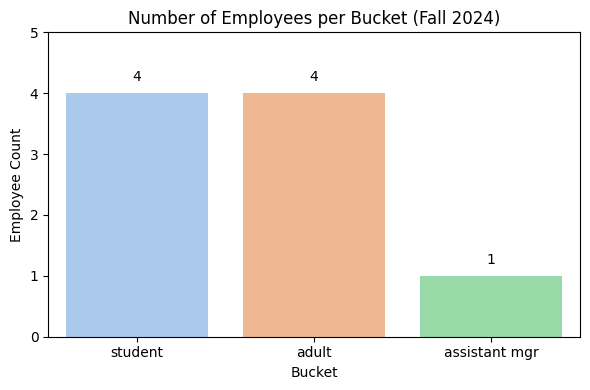

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot
plt.figure(figsize=(6,4))
sns.barplot(data=df_q1_bucket_count, x='bucket', y='employee_count', palette='pastel')

# Raise y-axis limit above the max count
max_count = df_q1_bucket_count['employee_count'].max()
plt.ylim(0, max_count + 1)

# Add value labels on top of bars
for index, row in df_q1_bucket_count.iterrows():
    plt.text(index, row['employee_count'] + 0.2, row['employee_count'], ha='center')

plt.title('Number of Employees per Bucket (Fall 2024)')
plt.ylabel('Employee Count')
plt.xlabel('Bucket')
plt.tight_layout()
plt.show

In [140]:
# test from above ...
query = """
SELECT 
    e.employee,
    e.day_of_week,
    AVG(e.hours)
FROM printouts_table AS e
JOIN employee_table AS m
  ON e.employee = m.employee_id
JOIN payroll_table AS j
  ON e.payroll_id = j.payroll_id
WHERE e.week_of >= '2024-08-05'                                         -- start of Fall 2024 semester 
  AND e.customer_id = 6                                                 -- Covenant Academy
  AND j.job_pays BETWEEN 211 AND 230
GROUP BY e.employee, e.day_of_week
"""
df = pd.read_sql(query, engine)
df

,employee,day_of_week,AVG(e.hours)
0,Asa,Friday,1.056250
1,Asa,Monday,1.063333
2,Asa,Thursday,1.040741
3,Asa,Tuesday,1.010000
4,Asa,Wednesday,0.907407
5,Brian,Friday,3.382815
6,Brian,Monday,3.011569
7,Brian,Thursday,3.253889
8,Brian,Tuesday,3.841779
9,Brian,Wednesday,3.594074


Now we will determine how many total hours per week on average each bucket works.

In [142]:
# is this needed? correct?
query = """
WITH age_cte AS (
    SELECT 
        e.employee, 
        m.birthday,
        CAST(strftime('%Y', '2024-08-05') AS INTEGER) - CAST(strftime('%Y', m.birthday) AS INTEGER) AS age,
        y.pay_per_hour
    FROM printouts_table AS e
    JOIN pay_table AS y
      ON e.week_of = y.week_of AND e.employee = y.employee
    JOIN employee_table AS m
      ON y.employee = m.employee_id
    WHERE e.week_of >= '2024-08-12'
      AND e.customer_id = 6
    GROUP BY e.employee, y.pay_per_hour, m.birthday
),

house_cte AS (
    SELECT DISTINCT e.employee AS cleans_houses
    FROM customer_table AS c
    JOIN printouts_table AS e 
      ON c.customer_id = e.customer_id
    WHERE c.customer_type = 'house'
),

summary_1_cte AS(
    SELECT *
    FROM age_cte
    FULL JOIN house_cte
      ON age_cte.employee = house_cte.cleans_houses
),

summary_2_cte AS(
    SELECT 
        employee,
        birthday,
        age,
        pay_per_hour,
        CASE
            WHEN cleans_houses IS NOT NULL THEN 'Yes'
            ELSE 'No'
        END AS cleans_houses
    FROM summary_1_cte
    WHERE employee IS NOT NULL
),

bucket_cte AS(
    SELECT 
        employee,
        pay_per_hour,
        CASE
            WHEN age < 20 AND cleans_houses = 'No' THEN 'student'
            WHEN employee = 'Brian' THEN 'assistant mgr'
            ELSE 'adult'
        END AS bucket
    FROM summary_2_cte
),

sum_cte AS (
    SELECT 
        e.day_of_week,
        SUM(e.hours) AS total_hours,
        bucket
    FROM printouts_table AS e
    JOIN employee_table AS m
      ON e.employee = m.employee_id
    JOIN payroll_table AS j
      ON e.payroll_id = j.payroll_id
    JOIN bucket_cte AS b
      ON e.employee = b.employee
    WHERE e.week_of >= '2024-08-05'                                         -- start of Fall 2024 semester 
      AND e.customer_id = 6                                                 -- Covenant Academy
      AND j.job_pays BETWEEN 211 AND 230                                    -- normal cleaning days
      AND e.hours IS NOT NULL
    GROUP BY e.day_of_week, b.bucket
)

SELECT 
    day_of_week, 
    bucket,
    AVG(total_hours)
FROM sum_cte
GROUP BY day_of_week, bucket
ORDER BY 
    CASE
        WHEN day_of_week = 'Monday' THEN 1
        WHEN day_of_week = 'Tuesday' THEN 2
        WHEN day_of_week = 'Wednesday' THEN 3
        WHEN day_of_week = 'Thursday' THEN 4
        WHEN day_of_week = 'Friday' THEN 5
    END,
    CASE
        WHEN bucket = 'student' THEN 1
        WHEN bucket = 'adult' THEN 2
        WHEN bucket = 'assistant mgr' THEN 3
    END;
"""

df_q1_bucket_hours_by_day = pd.read_sql(query, engine)
df_q1_bucket_hours_by_day

,day_of_week,bucket,AVG(total_hours)
0,Monday,student,63.133333
1,Monday,adult,91.200000
2,Monday,assistant mgr,51.196667
3,Tuesday,student,42.466667
4,Tuesday,adult,110.066667
5,Tuesday,assistant mgr,72.993810
6,Wednesday,student,46.650000
7,Wednesday,adult,73.116667
8,Wednesday,assistant mgr,64.693333
9,Thursday,student,45.866667


Goal:
“For each bucket and day of the week, what is the average number of total hours worked across all weeks?”

In [144]:
# my test....total avg hours per employee per day of the week vs total hours per employee per day of the week
query = """
WITH age_cte AS (
    SELECT 
        e.employee, 
        m.birthday,
        CAST(strftime('%Y', '2024-08-05') AS INTEGER) - CAST(strftime('%Y', m.birthday) AS INTEGER) AS age,
        y.pay_per_hour
    FROM printouts_table AS e
    JOIN pay_table AS y
      ON e.week_of = y.week_of AND e.employee = y.employee
    JOIN employee_table AS m
      ON y.employee = m.employee_id
    WHERE e.week_of >= '2024-08-12'
      AND e.customer_id = 6
    GROUP BY e.employee, y.pay_per_hour, m.birthday
),

house_cte AS (
    SELECT DISTINCT e.employee AS cleans_houses
    FROM customer_table AS c
    JOIN printouts_table AS e 
      ON c.customer_id = e.customer_id
    WHERE c.customer_type = 'house'
),

join_cte AS(
    SELECT *
    FROM age_cte
    FULL JOIN house_cte
      ON age_cte.employee = house_cte.cleans_houses
),

current_house_cleaners_cte AS(
    SELECT 
        employee,
        birthday,
        age,
        pay_per_hour,
        CASE
            WHEN cleans_houses IS NOT NULL THEN 'Yes'
            ELSE 'No'
        END AS cleans_houses
    FROM join_cte
    WHERE employee IS NOT NULL
),

bucket_cte AS(
    SELECT 
        employee,
        pay_per_hour,
        CASE
            WHEN age < 20 AND cleans_houses = 'No' THEN 'student'
            WHEN employee = 'Brian' THEN 'assistant mgr'
            ELSE 'adult'
        END AS bucket
    FROM current_house_cleaners_cte
),

daily_hours AS (
    SELECT
        e.employee,
        b.bucket,
        e.day_of_week,
        COUNT(e.day_of_week) AS num_days_worked,
        AVG(e.hours) AS avg_hours_that_day,
        SUM(e.hours) AS total_hours
    FROM printouts_table AS e
    JOIN bucket_cte AS b 
      ON e.employee = b.employee
    JOIN payroll_table AS j
      ON e.payroll_id = j.payroll_id
    WHERE e.week_of >= '2024-08-05'
      AND e.job_name = 'COV SCHL'
      AND j.job_pays BETWEEN 211 AND 230
      AND e.hours IS NOT NULL
    GROUP BY e.employee, b.bucket, e.day_of_week
)

SELECT 
    *,
    num_days_worked * avg_hours_that_day AS total_avg_hours_that_day,
    ABS(total_hours - (num_days_worked * avg_hours_that_day)) < 0.01 AS match
FROM daily_hours
ORDER BY 
    employee,
    CASE day_of_week
        WHEN 'Monday' THEN 1
        WHEN 'Tuesday' THEN 2
        WHEN 'Wednesday' THEN 3
        WHEN 'Thursday' THEN 4
        WHEN 'Friday' THEN 5
    END,
    CASE bucket
        WHEN 'student' THEN 1
        WHEN 'adult' THEN 2
        WHEN 'assistant mgr' THEN 3
    END;
"""

df_q1_bucket_avg_daily_hours = pd.read_sql(query, engine)
df_q1_bucket_avg_daily_hours

,employee,bucket,day_of_week,num_days_worked,avg_hours_that_day,total_hours,total_avg_hours_that_day,match
0,Asa,student,Monday,10,1.063333,10.633333,10.633333,1
1,Asa,student,Tuesday,10,1.010000,10.100000,10.100000,1
2,Asa,student,Wednesday,9,0.907407,8.166667,8.166667,1
3,Asa,student,Thursday,9,1.040741,9.366667,9.366667,1
4,Asa,student,Friday,8,1.056250,8.450000,8.450000,1
5,Brian,assistant mgr,Monday,17,3.011569,51.196667,51.196667,1
6,Brian,assistant mgr,Tuesday,19,3.841779,72.993810,72.993810,1
7,Brian,assistant mgr,Wednesday,18,3.594074,64.693333,64.693333,1
8,Brian,assistant mgr,Thursday,18,3.253889,58.570000,58.570000,1
9,Brian,assistant mgr,Friday,17,3.382815,57.507857,57.507857,1


In [145]:
# total average hours worked per day_of_week per bucket
query = """
WITH age_cte AS (
    SELECT 
        e.employee, 
        m.birthday,
        CAST(strftime('%Y', '2024-08-05') AS INTEGER) - CAST(strftime('%Y', m.birthday) AS INTEGER) AS age,
        y.pay_per_hour
    FROM printouts_table AS e
    JOIN pay_table AS y
      ON e.week_of = y.week_of AND e.employee = y.employee
    JOIN employee_table AS m
      ON y.employee = m.employee_id
    WHERE e.week_of >= '2024-08-12'
      AND e.customer_id = 6
    GROUP BY e.employee, y.pay_per_hour, m.birthday
),

house_cte AS (
    SELECT DISTINCT e.employee AS cleans_houses
    FROM customer_table AS c
    JOIN printouts_table AS e 
      ON c.customer_id = e.customer_id
    WHERE c.customer_type = 'house'
),

summary_1_cte AS(
    SELECT *
    FROM age_cte
    FULL JOIN house_cte
      ON age_cte.employee = house_cte.cleans_houses
),

summary_2_cte AS(
    SELECT 
        employee,
        birthday,
        age,
        pay_per_hour,
        CASE
            WHEN cleans_houses IS NOT NULL THEN 'Yes'
            ELSE 'No'
        END AS cleans_houses
    FROM summary_1_cte
    WHERE employee IS NOT NULL
),

bucket_cte AS(
    SELECT 
        employee,
        pay_per_hour,
        CASE
            WHEN age < 20 AND cleans_houses = 'No' THEN 'student'
            WHEN employee = 'Brian' THEN 'assistant mgr'
            ELSE 'adult'
        END AS bucket
    FROM summary_2_cte
),

daily_hours AS (
    SELECT
        b.bucket,
        e.week_of,
        e.day_of_week,
        SUM(e.hours) AS total_hours_that_day
    FROM printouts_table AS e
    JOIN bucket_cte AS b 
      ON e.employee = b.employee
    JOIN payroll_table AS j
      ON e.payroll_id = j.payroll_id
    WHERE e.week_of >= '2024-08-05'
      AND e.job_name = 'COV SCHL'
      AND j.job_pays BETWEEN 211 AND 230
      AND e.hours IS NOT NULL
    GROUP BY b.bucket, e.week_of, e.day_of_week
),

avg_daily_totals AS (
    SELECT
        day_of_week,
        bucket,
        ROUND(AVG(total_hours_that_day), 2) AS avg_total_hours_worked
    FROM daily_hours
    GROUP BY bucket, day_of_week
)

SELECT *
FROM avg_daily_totals
ORDER BY 
    CASE day_of_week
        WHEN 'Monday' THEN 1
        WHEN 'Tuesday' THEN 2
        WHEN 'Wednesday' THEN 3
        WHEN 'Thursday' THEN 4
        WHEN 'Friday' THEN 5
    END,
    CASE bucket
        WHEN 'student' THEN 1
        WHEN 'adult' THEN 2
        WHEN 'assistant mgr' THEN 3
    END;
"""

df_q1_bucket_avg_total_hours_per_day = pd.read_sql(query, engine)
df_q1_bucket_avg_total_hours_per_day

,day_of_week,bucket,avg_total_hours_worked
0,Monday,student,3.71
1,Monday,adult,5.36
2,Monday,assistant mgr,3.01
3,Tuesday,student,2.36
4,Tuesday,adult,5.79
5,Tuesday,assistant mgr,3.84
6,Wednesday,student,2.92
7,Wednesday,adult,3.85
8,Wednesday,assistant mgr,3.59
9,Thursday,student,2.70


In [146]:
query = """
WITH age_cte AS (
    SELECT 
        e.employee, 
        m.birthday,
        CAST(strftime('%Y', '2024-08-05') AS INTEGER) - CAST(strftime('%Y', m.birthday) AS INTEGER) AS age,
        y.pay_per_hour
    FROM printouts_table AS e
    JOIN pay_table AS y
      ON e.week_of = y.week_of AND e.employee = y.employee
    JOIN employee_table AS m
      ON y.employee = m.employee_id
    WHERE e.week_of >= '2024-08-12'
      AND e.customer_id = 6
    GROUP BY e.employee, y.pay_per_hour, m.birthday
),

house_cte AS (
    SELECT DISTINCT e.employee AS cleans_houses
    FROM customer_table AS c
    JOIN printouts_table AS e 
      ON c.customer_id = e.customer_id
    WHERE c.customer_type = 'house'
),

summary_1_cte AS(
    SELECT *
    FROM age_cte
    FULL JOIN house_cte
      ON age_cte.employee = house_cte.cleans_houses
),

summary_2_cte AS(
    SELECT 
        employee,
        birthday,
        age,
        pay_per_hour,
        CASE
            WHEN cleans_houses IS NOT NULL THEN 'Yes'
            ELSE 'No'
        END AS cleans_houses
    FROM summary_1_cte
    WHERE employee IS NOT NULL
),

bucket_cte AS(
    SELECT 
        employee,
        pay_per_hour,
        CASE
            WHEN age < 20 AND cleans_houses = 'No' THEN 'student'
            WHEN employee = 'Brian' THEN 'assistant mgr'
            ELSE 'adult'
        END AS bucket
    FROM summary_2_cte
),

weekly_totals AS (
    SELECT
        b.bucket,
        e.week_of,
        SUM(e.hours) AS total_hours_that_week
    FROM printouts_table AS e
    JOIN bucket_cte AS b 
      ON e.employee = b.employee
    JOIN payroll_table AS j
      ON e.payroll_id = j.payroll_id
    WHERE e.week_of >= '2024-08-05'
      AND e.job_name = 'COV SCHL'
      AND j.job_pays BETWEEN 211 AND 230
      AND e.hours IS NOT NULL
    GROUP BY b.bucket, e.week_of
),

avg_weekly_totals AS (
    SELECT
        bucket,
        ROUND(AVG(total_hours_that_week), 2) AS avg_total_hours_worked
    FROM weekly_totals
    GROUP BY bucket
)

SELECT *
FROM avg_weekly_totals
ORDER BY 
    CASE bucket
        WHEN 'student' THEN 1
        WHEN 'adult' THEN 2
        WHEN 'assistant mgr' THEN 3
    END;
"""

df_q1_bucket_avg_total_hours_per_week = pd.read_sql(query, engine)
df_q1_bucket_avg_total_hours_per_week

,bucket,avg_total_hours_worked
0,student,12.95
1,adult,25.29
2,assistant mgr,16.05


 is it true that the students only work on average 12.95 hours each week?
 looking at the number of each day of the week in the semester, we see that there are many weeks that have days off. Partial weeks will skew the averages when figuring weekly average.
 Instead, we should figure the average for hypothetical full weeks, by finding the sum of the average for each day of the week.


In [385]:
# find the sum of the total average hours worked per day per bucket
query = """
WITH age_cte AS (
    SELECT 
        e.employee, 
        m.birthday,
        CAST(strftime('%Y', '2024-08-05') AS INTEGER) - CAST(strftime('%Y', m.birthday) AS INTEGER) AS age,
        y.pay_per_hour
    FROM printouts_table AS e
    JOIN pay_table AS y
      ON e.week_of = y.week_of AND e.employee = y.employee
    JOIN employee_table AS m
      ON y.employee = m.employee_id
    WHERE e.week_of >= '2024-08-12'
      AND e.customer_id = 6
    GROUP BY e.employee, y.pay_per_hour, m.birthday
),

house_cte AS (
    SELECT DISTINCT e.employee AS cleans_houses
    FROM customer_table AS c
    JOIN printouts_table AS e 
      ON c.customer_id = e.customer_id
    WHERE c.customer_type = 'house'
),

summary_1_cte AS(
    SELECT *
    FROM age_cte
    FULL JOIN house_cte
      ON age_cte.employee = house_cte.cleans_houses
),

summary_2_cte AS(
    SELECT 
        employee,
        birthday,
        age,
        pay_per_hour,
        CASE
            WHEN cleans_houses IS NOT NULL THEN 'Yes'
            ELSE 'No'
        END AS cleans_houses
    FROM summary_1_cte
    WHERE employee IS NOT NULL
),

bucket_cte AS(
    SELECT 
        employee,
        pay_per_hour,
        CASE
            WHEN age < 20 AND cleans_houses = 'No' THEN 'student'
            WHEN employee = 'Brian' THEN 'assistant mgr'
            ELSE 'adult'
        END AS bucket
    FROM summary_2_cte
),

daily_hours AS (
    SELECT
        b.bucket,
        e.week_of,
        e.day_of_week,
        SUM(e.hours) AS total_hours_that_day
    FROM printouts_table AS e
    JOIN bucket_cte AS b 
      ON e.employee = b.employee
    JOIN payroll_table AS j
      ON e.payroll_id = j.payroll_id
    WHERE e.week_of >= '2024-08-05'
      AND e.job_name = 'COV SCHL'
      AND j.job_pays BETWEEN 211 AND 230
      AND e.hours IS NOT NULL
    GROUP BY b.bucket, e.week_of, e.day_of_week
),

avg_daily_totals AS (
    SELECT
        day_of_week,
        bucket,
        AVG(total_hours_that_day) AS avg_total_hours_worked
    FROM daily_hours
    GROUP BY bucket, day_of_week
)

SELECT 
    bucket,
    ROUND(SUM(avg_total_hours_worked), 2) AS avg_total_weekly_hours_worked,
    ROUND(SUM(avg_total_hours_worked) / 5, 2) AS avg_total_daily_hours_worked
FROM avg_daily_totals
GROUP BY bucket
ORDER BY 
    CASE bucket
        WHEN 'student' THEN 1
        WHEN 'adult' THEN 2
        WHEN 'assistant mgr' THEN 3
    END;
"""

df_q1_bucket_avg_total_hours = pd.read_sql(query, engine)
df_q1_bucket_avg_total_hours

,bucket,avg_total_weekly_hours_worked,avg_total_daily_hours_worked
0,student,14.68,2.94
1,adult,26.49,5.30
2,assistant mgr,17.08,3.42


The above shows how many total hours each bucket works on average in a typical five-day workweek (Monday through Friday), as well as the hours per day in a five-day workweek. Again, we are looking to adjust the 'adult' bucket, since the 'student' bucket is already maximized and the 'assistant mgr' bucket cannot be adjusted due to work duties.

We already know from earlier that the company's daily profit for Fall 2024 was $89.78$, whereas the daily profit goal was $100$. This is a difference of $10.22 short each day.

Now we ask: How many fewer hours must employees in the adult bucket work each day to save $10.22?

Since each employee works a different number of hours, we will want to figure a *weighted* hourly pay for the adult bucket.
To figure this we must first calculate the average hourly pay for employees in the adult bucket, along with the total number of hours they worked in the semester.

In [362]:
# calculate the average hourly pay for employees in the adult bucket, along with the total number of hours they worked in the semester.
query = """
WITH age_cte AS (
    SELECT 
        e.employee, 
        m.birthday,
        CAST(strftime('%Y', '2024-08-05') AS INTEGER) - CAST(strftime('%Y', m.birthday) AS INTEGER) AS age,
        y.pay_per_hour
    FROM printouts_table AS e
    JOIN pay_table AS y
      ON e.week_of = y.week_of AND e.employee = y.employee
    JOIN employee_table AS m
      ON y.employee = m.employee_id
    WHERE e.week_of >= '2024-08-12'
      AND e.customer_id = 6
    GROUP BY e.employee, y.pay_per_hour, m.birthday
),

house_cte AS (
    SELECT DISTINCT e.employee AS cleans_houses
    FROM customer_table AS c
    JOIN printouts_table AS e 
      ON c.customer_id = e.customer_id
    WHERE c.customer_type = 'house'
),

summary_1_cte AS(
    SELECT *
    FROM age_cte
    FULL JOIN house_cte
      ON age_cte.employee = house_cte.cleans_houses
),

summary_2_cte AS(
    SELECT 
        employee,
        birthday,
        age,
        pay_per_hour,
        CASE
            WHEN cleans_houses IS NOT NULL THEN 'Yes'
            ELSE 'No'
        END AS cleans_houses
    FROM summary_1_cte
    WHERE employee IS NOT NULL
),

bucket_cte AS(
    SELECT 
        employee,
        pay_per_hour,
        CASE
            WHEN age < 20 AND cleans_houses = 'No' THEN 'student'
            WHEN employee = 'Brian' THEN 'assistant mgr'
            ELSE 'adult'
        END AS bucket
    FROM summary_2_cte
)

SELECT 
    b.employee,
    b.bucket,
    b.pay_per_hour,
    ROUND(SUM(e.hours), 2) AS total_hours_worked
FROM bucket_cte AS b
JOIN printouts_table AS e
  ON b.employee = e.employee
JOIN pay_table as y
  ON e.week_of = y.week_of AND e.employee = y.employee
JOIN payroll_table AS j
  ON e.payroll_id = j.payroll_id
WHERE e.customer_id = 6
  AND j.job_pays BETWEEN 211 AND 230
  AND e.week_of >= '2024-08-05'
  AND b.bucket = 'adult'
  AND e.hours IS NOT NULL
GROUP BY b.employee, b.bucket, b.pay_per_hour;
"""

df = pd.read_sql(query, engine)
df

,employee,bucket,pay_per_hour,total_hours_worked
0,Cindy,adult,13.0,156.08
1,Janet,adult,12.5,109.72
2,Janet T,adult,12.0,210.13
3,Lisa,adult,12.0,4.62


To get the *weighted* hourly pay for the adult bucket, we do the following:

SUM(total_hours_worked * pay_per_hour) / SUM(total_hours_worked)

In [440]:
# calculate the weighted hourly pay for the adult bucket
query = """
WITH age_cte AS (
    SELECT 
        e.employee, 
        m.birthday,
        CAST(strftime('%Y', '2024-08-05') AS INTEGER) - CAST(strftime('%Y', m.birthday) AS INTEGER) AS age,
        y.pay_per_hour
    FROM printouts_table AS e
    JOIN pay_table AS y
      ON e.week_of = y.week_of AND e.employee = y.employee
    JOIN employee_table AS m
      ON y.employee = m.employee_id
    WHERE e.week_of >= '2024-08-12'
      AND e.customer_id = 6
    GROUP BY e.employee, y.pay_per_hour, m.birthday
),

house_cte AS (
    SELECT DISTINCT e.employee AS cleans_houses
    FROM customer_table AS c
    JOIN printouts_table AS e 
      ON c.customer_id = e.customer_id
    WHERE c.customer_type = 'house'
),

summary_1_cte AS(
    SELECT *
    FROM age_cte
    FULL JOIN house_cte
      ON age_cte.employee = house_cte.cleans_houses
),

summary_2_cte AS(
    SELECT 
        employee,
        birthday,
        age,
        pay_per_hour,
        CASE
            WHEN cleans_houses IS NOT NULL THEN 'Yes'
            ELSE 'No'
        END AS cleans_houses
    FROM summary_1_cte
    WHERE employee IS NOT NULL
),

bucket_cte AS(
    SELECT 
        employee,
        pay_per_hour,
        CASE
            WHEN age < 20 AND cleans_houses = 'No' THEN 'student'
            WHEN employee = 'Brian' THEN 'assistant mgr'
            ELSE 'adult'
        END AS bucket
    FROM summary_2_cte
),

adult_hours_and_pay AS(
    SELECT 
        b.employee,
        b.bucket,
        b.pay_per_hour,
        SUM(e.hours) AS total_hours_worked
    FROM bucket_cte AS b
    JOIN printouts_table AS e
      ON b.employee = e.employee
    JOIN pay_table as y
      ON e.week_of = y.week_of AND e.employee = y.employee
    JOIN payroll_table AS j
      ON e.payroll_id = j.payroll_id
    WHERE e.customer_id = 6
      AND j.job_pays BETWEEN 211 AND 230
      AND e.week_of >= '2024-08-05'
      AND e.hours IS NOT NULL
    GROUP BY b.employee, b.bucket, b.pay_per_hour
)

SELECT
    bucket,
    ROUND(SUM(total_hours_worked * pay_per_hour) / SUM(total_hours_worked), 2) AS weighted_avg_adult_pay,
    total_hours_worked
FROM adult_hours_and_pay
GROUP BY bucket;
"""
# I just added total_hours_worked column. Also need to use this to figure if calculates up to current profit daily
df_weighted_bucket_pay = pd.read_sql(query, engine)
df_weighted_bucket_pay

,bucket,weighted_avg_adult_pay,total_hours_worked
0,adult,12.44,156.079487
1,assistant mgr,14.00,304.961667
2,student,10.12,46.716667


With this information, we can now calculate how many daily hours we need to reduce from the adult bucket. 

- Target daily profit = 100
- Current daily profit = 89.72
- Needed savings = 10.22 (that is, 100 - 89.72)
- Weighted average hourly pay for adult employees = 12.44

Hours to reduce = Needed savings / Weighted average pay

In [402]:
needed_savings = 10.22
weighted_avg_pay = 12.44

hours_to_reduce = needed_savings / weighted_avg_pay
print(f"Minutes to reduce from total adult daily work hours:", round((hours_to_reduce*60),2))

Minutes to reduce from total adult daily work hours: 49.29


Conclusion: In order for the business to meet it daily profit goal of $100 per day under the current conditions, the employees in the adult bucket need to work a total of 49.29 (say 50) minutes less each day.

In order to help management decide where to make those cuts in hours, it is helpful to consider the number of days each adult employee worked and the average hours they worked on those days.

In [360]:
# include the number of days each adult employee worked and the average hours they worked on those days
query = """
WITH age_cte AS (
    SELECT 
        e.employee, 
        m.birthday,
        CAST(strftime('%Y', '2024-08-05') AS INTEGER) - CAST(strftime('%Y', m.birthday) AS INTEGER) AS age,
        y.pay_per_hour
    FROM printouts_table AS e
    JOIN pay_table AS y
      ON e.week_of = y.week_of AND e.employee = y.employee
    JOIN employee_table AS m
      ON y.employee = m.employee_id
    WHERE e.week_of >= '2024-08-12'
      AND e.customer_id = 6
    GROUP BY e.employee, y.pay_per_hour, m.birthday
),

house_cte AS (
    SELECT DISTINCT e.employee AS cleans_houses
    FROM customer_table AS c
    JOIN printouts_table AS e 
      ON c.customer_id = e.customer_id
    WHERE c.customer_type = 'house'
),

summary_1_cte AS(
    SELECT *
    FROM age_cte
    FULL JOIN house_cte
      ON age_cte.employee = house_cte.cleans_houses
),

summary_2_cte AS(
    SELECT 
        employee,
        birthday,
        age,
        pay_per_hour,
        CASE
            WHEN cleans_houses IS NOT NULL THEN 'Yes'
            ELSE 'No'
        END AS cleans_houses
    FROM summary_1_cte
    WHERE employee IS NOT NULL
),

bucket_cte AS(
    SELECT 
        employee,
        pay_per_hour,
        CASE
            WHEN age < 20 AND cleans_houses = 'No' THEN 'student'
            WHEN employee = 'Brian' THEN 'assistant mgr'
            ELSE 'adult'
        END AS bucket
    FROM summary_2_cte
)

SELECT 
    b.employee,
    b.bucket,
    b.pay_per_hour,
    ROUND(SUM(e.hours), 2) AS total_hours_worked,
    COUNT(e.date) AS num_days_worked,
    ROUND(SUM(e.hours)/COUNT(e.date), 2) AS avg_hours_per_day
FROM bucket_cte AS b
JOIN printouts_table AS e
  ON b.employee = e.employee
JOIN pay_table as y
  ON e.week_of = y.week_of AND e.employee = y.employee
JOIN payroll_table AS j
  ON e.payroll_id = j.payroll_id
WHERE e.customer_id = 6
  AND j.job_pays BETWEEN 211 AND 230
  AND e.week_of >= '2024-08-05'
  AND b.bucket = 'adult'
  AND e.hours IS NOT NULL
GROUP BY b.employee, b.bucket, b.pay_per_hour;
"""

df = pd.read_sql(query, engine)
df

,employee,bucket,pay_per_hour,total_hours_worked,num_days_worked,avg_hours_per_day
0,Cindy,adult,13.0,156.08,60,2.60
1,Janet,adult,12.5,109.72,86,1.28
2,Janet T,adult,12.0,210.13,88,2.39
3,Lisa,adult,12.0,4.62,3,1.54


Since Lisa barely worked (only 3 days out of the semester), the cuts will need to come from the other three adult employees.

figure avg hours per day for each adult employee in hours and minutes (instead of decimal).
chart of Adult Bucket: Current vs Target Daily Hours
chart of all employees: Current vs Target Daily Hours
chart of all buckets: Current vs Target Daily Hours

In [412]:
# chart of Adult Bucket: Current vs Target Daily Hours
# first figure current and target daily hours
query = """
WITH age_cte AS (
    SELECT 
        e.employee, 
        m.birthday,
        CAST(strftime('%Y', '2024-08-05') AS INTEGER) - CAST(strftime('%Y', m.birthday) AS INTEGER) AS age,
        y.pay_per_hour
    FROM printouts_table AS e
    JOIN pay_table AS y
      ON e.week_of = y.week_of AND e.employee = y.employee
    JOIN employee_table AS m
      ON y.employee = m.employee_id
    WHERE e.week_of >= '2024-08-12'
      AND e.customer_id = 6
    GROUP BY e.employee, y.pay_per_hour, m.birthday
),

house_cte AS (
    SELECT DISTINCT e.employee AS cleans_houses
    FROM customer_table AS c
    JOIN printouts_table AS e 
      ON c.customer_id = e.customer_id
    WHERE c.customer_type = 'house'
),

summary_1_cte AS(
    SELECT *
    FROM age_cte
    FULL JOIN house_cte
      ON age_cte.employee = house_cte.cleans_houses
),

summary_2_cte AS(
    SELECT 
        employee,
        birthday,
        age,
        pay_per_hour,
        CASE
            WHEN cleans_houses IS NOT NULL THEN 'Yes'
            ELSE 'No'
        END AS cleans_houses
    FROM summary_1_cte
    WHERE employee IS NOT NULL
),

bucket_cte AS(
    SELECT 
        employee,
        pay_per_hour,
        CASE
            WHEN age < 20 AND cleans_houses = 'No' THEN 'student'
            WHEN employee = 'Brian' THEN 'assistant mgr'
            ELSE 'adult'
        END AS bucket
    FROM summary_2_cte
),

daily_hours AS (
    SELECT
        b.bucket,
        e.week_of,
        e.day_of_week,
        SUM(e.hours) AS total_hours_that_day
    FROM printouts_table AS e
    JOIN bucket_cte AS b 
      ON e.employee = b.employee
    JOIN payroll_table AS j
      ON e.payroll_id = j.payroll_id
    WHERE e.week_of >= '2024-08-05'
      AND e.job_name = 'COV SCHL'
      AND j.job_pays BETWEEN 211 AND 230
      AND e.hours IS NOT NULL
    GROUP BY b.bucket, e.week_of, e.day_of_week
),

avg_daily_totals AS (
    SELECT
        day_of_week,
        bucket,
        AVG(total_hours_that_day) AS avg_total_hours_worked
    FROM daily_hours
    GROUP BY bucket, day_of_week
)

SELECT
    bucket,
    ROUND(SUM(avg_total_hours_worked), 2) AS total_weekly_hours,
    ROUND(SUM(avg_total_hours_worked) / 5.0, 2) AS current_daily_hours
FROM avg_daily_totals
GROUP BY bucket;
"""

df_bucket_daily_hours = pd.read_sql(query, engine)
df_bucket_daily_hours

,bucket,total_weekly_hours,current_daily_hours
0,adult,26.49,5.30
1,assistant mgr,17.08,3.42
2,student,14.68,2.94


In [430]:
# current daily hours and target daily hours
query = """
WITH age_cte AS (
    SELECT 
        e.employee, 
        m.birthday,
        CAST(strftime('%Y', '2024-08-05') AS INTEGER) - CAST(strftime('%Y', m.birthday) AS INTEGER) AS age,
        y.pay_per_hour
    FROM printouts_table AS e
    JOIN pay_table AS y
      ON e.week_of = y.week_of AND e.employee = y.employee
    JOIN employee_table AS m
      ON y.employee = m.employee_id
    WHERE e.week_of >= '2024-08-12'
      AND e.customer_id = 6
    GROUP BY e.employee, y.pay_per_hour, m.birthday
),

house_cte AS (
    SELECT DISTINCT e.employee AS cleans_houses
    FROM customer_table AS c
    JOIN printouts_table AS e 
      ON c.customer_id = e.customer_id
    WHERE c.customer_type = 'house'
),

summary_1_cte AS(
    SELECT *
    FROM age_cte
    FULL JOIN house_cte
      ON age_cte.employee = house_cte.cleans_houses
),

summary_2_cte AS(
    SELECT 
        employee,
        birthday,
        age,
        pay_per_hour,
        CASE
            WHEN cleans_houses IS NOT NULL THEN 'Yes'
            ELSE 'No'
        END AS cleans_houses
    FROM summary_1_cte
    WHERE employee IS NOT NULL
),

bucket_cte AS(
    SELECT 
        employee,
        pay_per_hour,
        CASE
            WHEN age < 20 AND cleans_houses = 'No' THEN 'student'
            WHEN employee = 'Brian' THEN 'assistant mgr'
            ELSE 'adult'
        END AS bucket
    FROM summary_2_cte
),

daily_hours AS (
    SELECT
        b.bucket,
        e.week_of,
        e.day_of_week,
        SUM(e.hours) AS total_hours_that_day
    FROM printouts_table AS e
    JOIN bucket_cte AS b 
      ON e.employee = b.employee
    JOIN payroll_table AS j
      ON e.payroll_id = j.payroll_id
    WHERE e.week_of >= '2024-08-05'
      AND e.job_name = 'COV SCHL'
      AND j.job_pays BETWEEN 211 AND 230
      AND e.hours IS NOT NULL
    GROUP BY b.bucket, e.week_of, e.day_of_week
),

avg_daily_totals AS (
    SELECT
        day_of_week,
        bucket,
        AVG(total_hours_that_day) AS avg_total_hours_worked
    FROM daily_hours
    GROUP BY bucket, day_of_week
),

bucket_hours AS (
    SELECT
        bucket,
        ROUND(SUM(avg_total_hours_worked), 2) AS total_weekly_hours,
        SUM(avg_total_hours_worked) / 5.0 AS current_daily_hours
    FROM avg_daily_totals
    GROUP BY bucket
)

SELECT
    bucket,
    total_weekly_hours,
    ROUND(current_daily_hours, 2) AS current_daily_hours,
    ROUND(current_daily_hours - (10.22 / 12.44), 2) AS target_daily_hours             -- hours to reduce = 10.22(needed savings) - 12.44 (weighted adult avg pay)
FROM bucket_hours
WHERE bucket = 'adult'
;
"""

df_adult_hours = pd.read_sql(query, engine)
df_adult_hours

,bucket,total_weekly_hours,current_daily_hours,target_daily_hours
0,adult,26.49,5.3,4.48


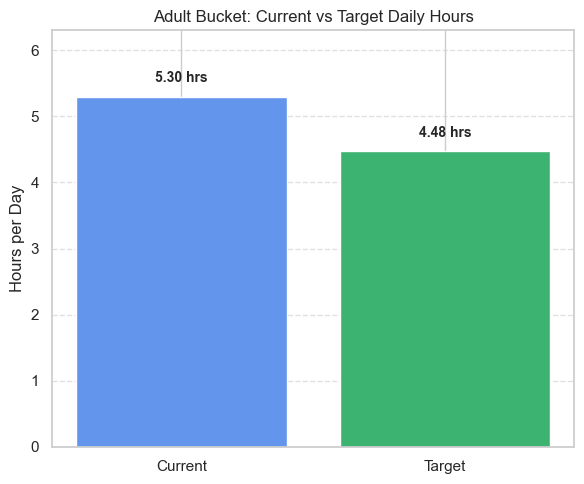

In [432]:

# Extract values from df_adult_hours
current = df_adult_hours.loc[0, 'current_daily_hours']
target = df_adult_hours.loc[0, 'target_daily_hours']

# Data
labels = ['Current', 'Target']
values = [current, target]
colors = ['cornflowerblue', 'mediumseagreen']

# Plot
plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color=colors)

# Annotate bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f} hrs',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 8),
                 textcoords='offset points',
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

# Style
plt.title('Adult Bucket: Current vs Target Daily Hours')
plt.ylabel('Hours per Day')
plt.ylim(0, max(values) + 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [ ]:
data = {
    'Label': ['Current Daily Hours', 'Target Daily Hours'],
    'Hours': [df_adult_hours[current_daily_hours], df_adult_hours[target_daily_hours]]


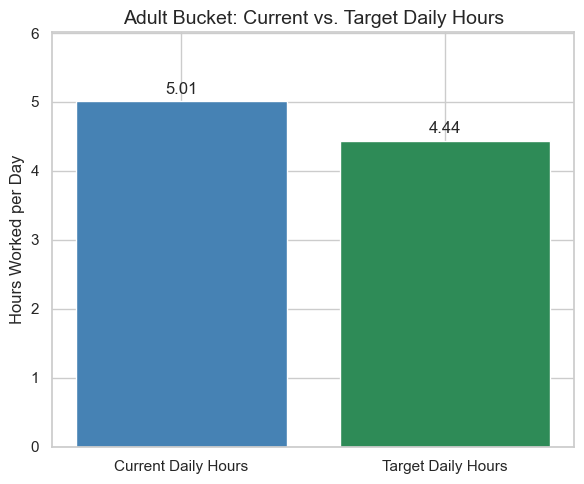

In [369]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data based on your analysis
data = {
    'Label': ['Current Daily Hours', 'Target Daily Hours'],
    'Hours': [5.01, 4.44]  # Update with your actual figures
}

df = pd.DataFrame(data)

# Create the bar plot
fig, ax = plt.subplots(figsize=(6, 5))
bars = ax.bar(df['Label'], df['Hours'], color=['steelblue', 'seagreen'])

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12)

# Title and labels
ax.set_title('Adult Bucket: Current vs. Target Daily Hours', fontsize=14)
ax.set_ylabel('Hours Worked per Day', fontsize=12)
ax.set_ylim(0, max(df['Hours']) + 1)  # Extend y-axis to avoid label cutoff
plt.tight_layout()

# Show the plot
plt.show()


# Left off here !!!!!!!!!!!!

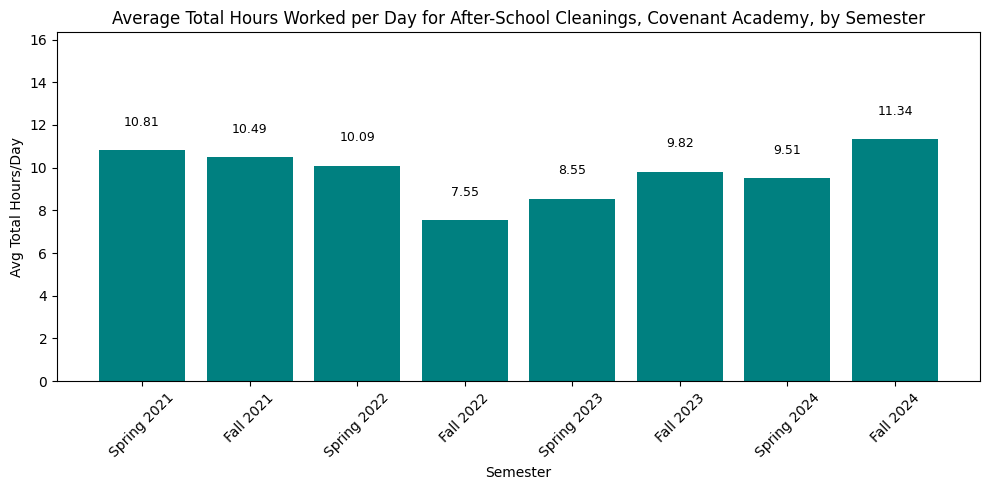

In [148]:
# Combine semester and year
df_q1_averages['semester_label'] = df_q1_averages['semester'] + ' ' + df_q1_averages['year']

# Plot the bar graph
plt.figure(figsize=(10,5))
bars = plt.bar(df_q1_averages['semester_label'], df_q1_averages['avg_hours_per_day'], color = 'teal')
plt.title('Average Total Hours Worked per Day for After-School Cleanings, Covenant Academy, by Semester')
plt.xlabel('Semester')
plt.ylabel('Avg Total Hours/Day')
plt.ylim(0, df_q1_averages['avg_hours_per_day'].max() + 5)

# Add labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f"{height:.2f}",
        ha='center', va='bottom', fontsize=9
    )

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

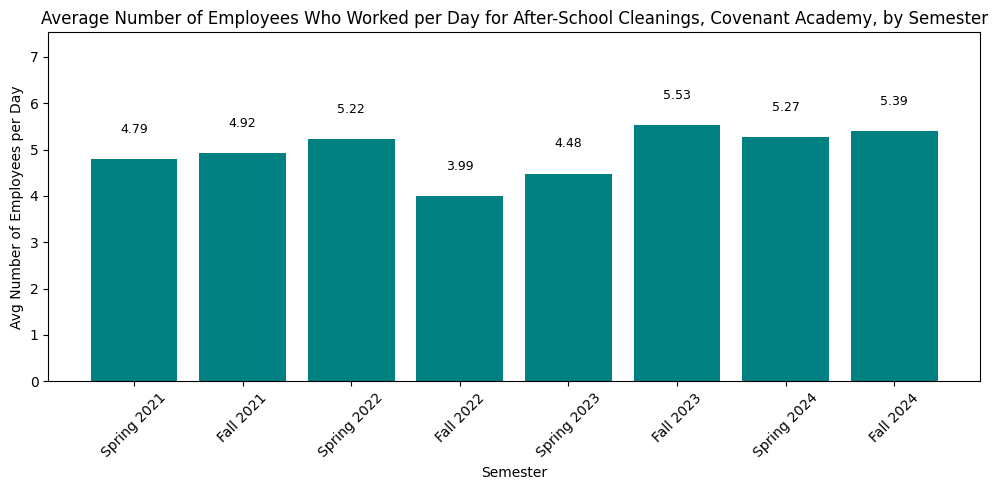

In [149]:
# Combine semester and year
df_q1_averages['semester_label'] = df_q1_averages['semester'] + ' ' + df_q1_averages['year']

# Plot the bar graph
plt.figure(figsize=(10,5))
bars = plt.bar(df_q1_averages['semester_label'], df_q1_averages['avg_num_employees_per_day'], color = 'teal')
plt.title('Average Number of Employees Who Worked per Day for After-School Cleanings, Covenant Academy, by Semester')
plt.xlabel('Semester')
plt.ylabel('Avg Number of Employees per Day')
plt.ylim(0, df_q1_averages['avg_num_employees_per_day'].max() + 2)

# Add labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f"{height:.2f}",
        ha='center', va='bottom', fontsize=9
    )

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

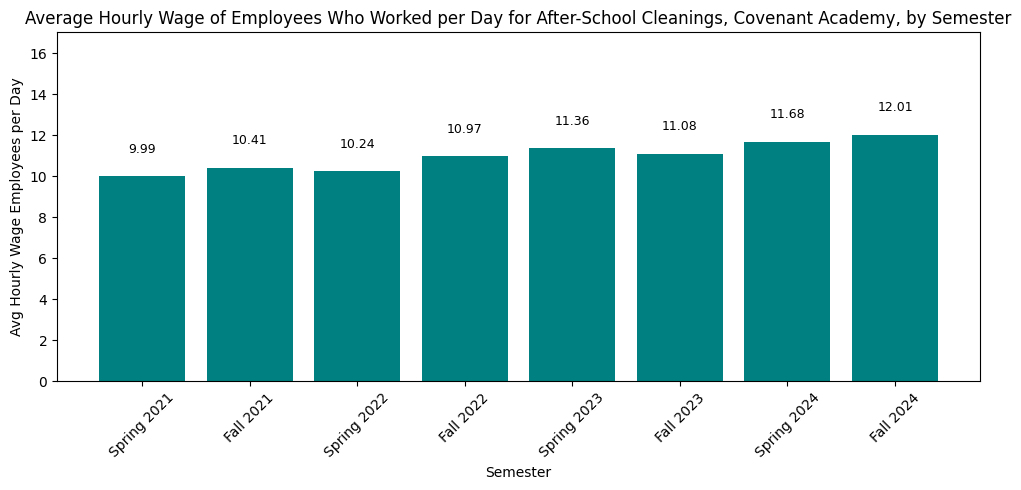

In [150]:
# Combine semester and year
df_q1_averages['semester_label'] = df_q1_averages['semester'] + ' ' + df_q1_averages['year']

# Plot the bar graph
plt.figure(figsize=(10,5))
bars = plt.bar(df_q1_averages['semester_label'], df_q1_averages['avg_hourly_wage'], color = 'teal')
plt.title('Average Hourly Wage of Employees Who Worked per Day for After-School Cleanings, Covenant Academy, by Semester')
plt.xlabel('Semester')
plt.ylabel('Avg Hourly Wage Employees per Day')
plt.ylim(0, df_q1_averages['avg_hourly_wage'].max() + 5)

# Add labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f"{height:.2f}",
        ha='center', va='bottom', fontsize=9
    )

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [151]:
# CHAT GPT combined code....
query = """
WITH daily_metrics AS (
    SELECT 
        j.date,
        CASE
            WHEN strftime('%m', j.week_of) IN ('01','02','03','04','05') THEN 'Spring'
            WHEN strftime('%m', j.week_of) IN ('08','09','10','11','12') THEN 'Fall'
            ELSE 'Summer'
        END AS semester,
        strftime('%Y', j.week_of) AS year,
        SUM(e.hours) AS total_hours_per_day,
        COUNT(DISTINCT e.employee) AS num_employees,
        ROUND(AVG(y.pay_per_hour), 2) AS avg_hourly_wage
    FROM printouts_table AS e
    JOIN payroll_table AS j ON e.payroll_id = j.payroll_id
    JOIN pay_table AS y ON e.employee = y.employee AND e.week_of = y.week_of
    WHERE strftime('%m', j.week_of) NOT IN ('06','07')
      AND j.job_name = 'COV SCHL'
      AND j.job_pays BETWEEN 211 AND 230    
    GROUP BY j.date
),
profit_metrics AS (
    SELECT 
        j.date,
        j.week_of,
        (j.job_pays - SUM(e.hours * y.pay_per_hour)) AS profit
    FROM payroll_table AS j
    JOIN printouts_table AS e ON j.payroll_id = e.payroll_id
    JOIN pay_table AS y ON e.employee = y.employee AND e.week_of = y.week_of
    WHERE strftime('%m', j.week_of) NOT IN ('06','07')
      AND j.job_name = 'COV SCHL'
      AND j.job_pays BETWEEN 211 AND 230    
    GROUP BY j.date
),
combined AS (
    SELECT 
        d.semester,
        d.year,
        d.date,
        d.total_hours_per_day,
        d.num_employees,
        d.avg_hourly_wage,
        p.profit
    FROM daily_metrics d
    JOIN profit_metrics p ON d.date = p.date
)

SELECT 
    semester,
    year,
    ROUND(AVG(profit), 2) AS avg_daily_profit,
    ROUND(AVG(total_hours_per_day), 2) AS avg_hours_per_day,
    ROUND(AVG(num_employees), 2) AS avg_num_employees,
    ROUND(AVG(avg_hourly_wage), 2) AS avg_hourly_wage,
    ROUND(AVG(profit) / NULLIF(AVG(total_hours_per_day), 0), 2) AS profit_per_hour,
    ROUND(AVG(profit) / NULLIF(AVG(num_employees), 0), 2) AS profit_per_employee
FROM combined
GROUP BY semester, year
ORDER BY year, semester DESC;
"""
df_combined = pd.read_sql(query, engine)
df_combined

,semester,year,avg_daily_profit,avg_hours_per_day,avg_num_employees,avg_hourly_wage,profit_per_hour,profit_per_employee
0,Spring,2021,102.62,10.81,4.79,9.99,9.49,21.43
1,Fall,2021,104.09,10.49,4.92,10.41,9.93,21.14
2,Spring,2022,109.41,10.09,5.22,10.24,10.84,20.96
3,Fall,2022,133.37,7.55,3.99,10.98,17.68,33.43
4,Spring,2023,118.89,8.55,4.48,11.36,13.90,26.55
5,Fall,2023,107.84,9.82,5.53,11.08,10.99,19.51
6,Spring,2024,105.87,9.51,5.27,11.68,11.13,20.08
7,Fall,2024,89.78,11.34,5.39,12.01,7.92,16.66


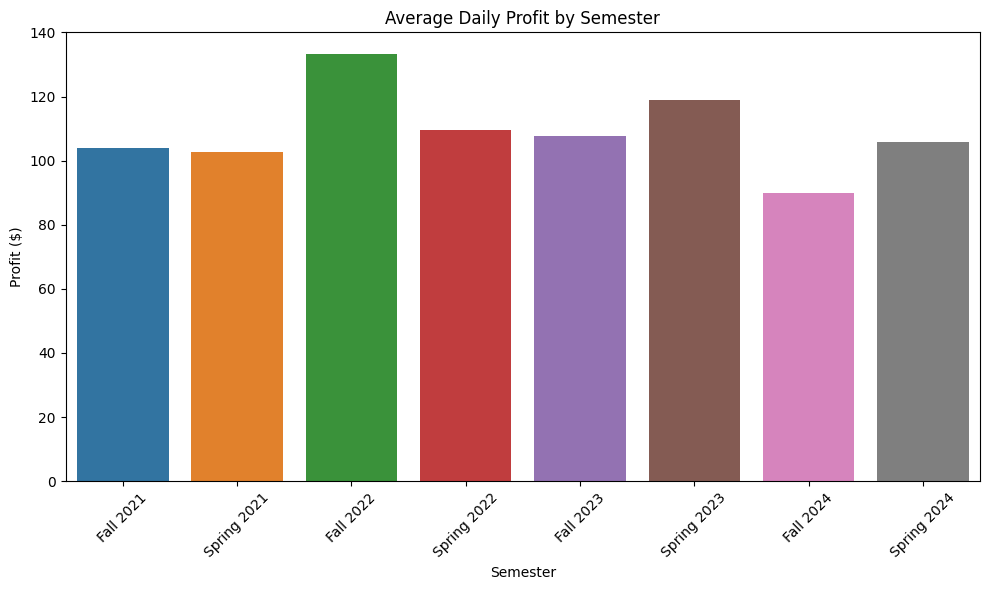

In [152]:
# needs tweeking... semesters not in order
import seaborn as sns
df_combined['semester_year'] = df_combined['semester'] + ' ' + df_combined['year'].astype(str)
df_combined['semester_order'] = df_combined['year'].astype(int).astype(str) + df_combined['semester']
order = df_combined.sort_values('semester_order')['semester_year'].tolist()

plt.figure(figsize=(10,6))
sns.barplot(data=df_combined, x='semester_year', y='avg_daily_profit', order=order)
plt.title('Average Daily Profit by Semester')
plt.ylabel('Profit ($)')
plt.xlabel('Semester')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


ValueError: Could not interpret input 'semester'

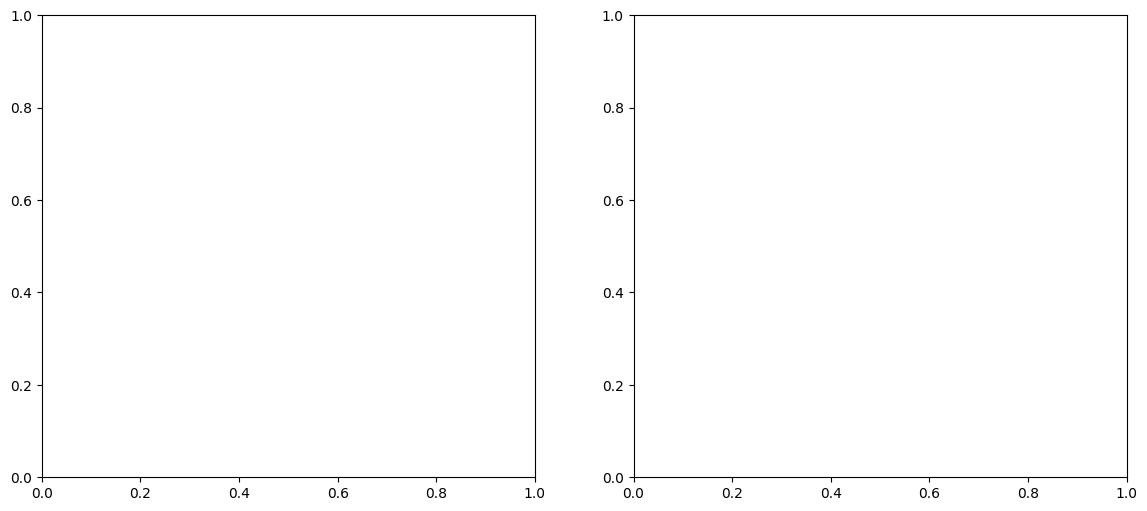

In [153]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.barplot(data=df, x='semester', y='profit_per_hour', hue='year', ax=axes[0])
axes[0].set_title('Profit per Hour by Semester')
axes[0].set_ylabel('Profit per Hour ($)')

sns.barplot(data=df, x='semester', y='profit_per_employee', hue='year', ax=axes[1])
axes[1].set_title('Profit per Employee by Semester')
axes[1].set_ylabel('Profit per Employee ($)')

plt.tight_layout()
plt.show()


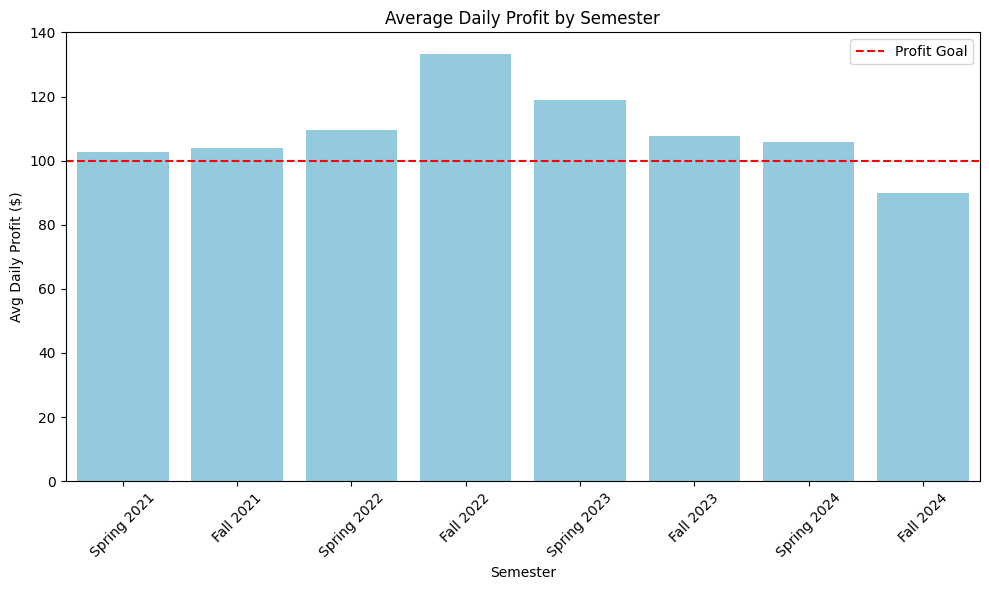

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

df_combined['semester_label'] = df_combined['semester'] + ' ' + df_combined['year'].astype(str)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_combined, x='semester_label', y='avg_daily_profit', color='skyblue')
plt.axhline(100, color='red', linestyle='--', label='Profit Goal')
plt.title('Average Daily Profit by Semester')
plt.ylabel('Avg Daily Profit ($)')
plt.xlabel('Semester')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\rosse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rosse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rosse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\rosse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

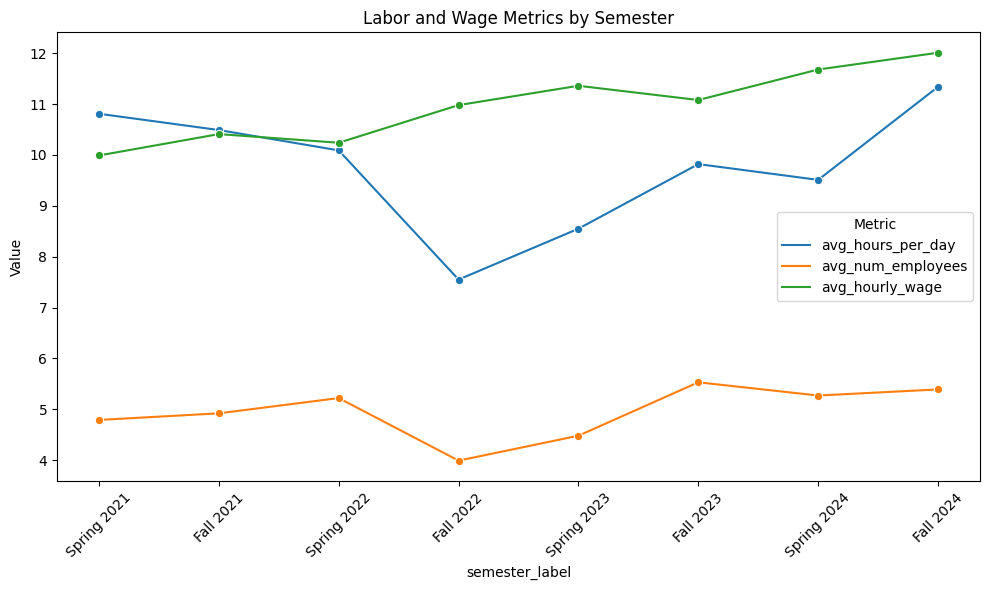

In [159]:
metrics = ['avg_hours_per_day', 'avg_num_employees', 'avg_hourly_wage']

df_melted = df_combined.melt(id_vars='semester_label', value_vars=metrics,
                    var_name='Metric', value_name='Value')

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='semester_label', y='Value', hue='Metric', marker='o')
plt.title('Labor and Wage Metrics by Semester')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [162]:
# chat gpt... SQL Query for Weighted Average Hourly Wage per Semester
query = """
WITH daily_employees AS (
    SELECT 
        j.date,
        CASE
            WHEN strftime('%m', j.week_of) IN ('01','02','03','04','05') THEN 'Spring'
            WHEN strftime('%m', j.week_of) IN ('08','09','10','11','12') THEN 'Fall'
            ELSE 'Summer'
        END AS semester,
        strftime('%Y', j.week_of) AS year,
        SUM(e.hours) AS total_hours_per_day,
        COUNT(DISTINCT e.employee) AS num_employees,
        SUM(e.hours * y.pay_per_hour) * 1.0 / SUM(e.hours) AS weighted_avg_pay_per_hour
    FROM printouts_table AS e
    JOIN payroll_table AS j 
      ON e.payroll_id = j.payroll_id
    JOIN pay_table AS y
      ON e.employee = y.employee AND e.week_of = y.week_of
    WHERE strftime('%m', j.week_of) NOT IN ('06','07')
      AND j.job_name = 'COV SCHL'
      AND j.job_pays BETWEEN 211 AND 230    
    GROUP BY j.date
)

SELECT 
    semester, 
    year, 
    ROUND(AVG(total_hours_per_day), 2) AS avg_hours_per_day, 
    ROUND(AVG(num_employees), 2) AS avg_num_employees_per_day, 
    ROUND(AVG(weighted_avg_pay_per_hour), 2) AS weighted_avg_hourly_wage
FROM daily_employees
GROUP BY semester, year
ORDER BY year, semester DESC;
"""
df_weighted = pd.read_sql(query, engine)
df_weighted


,semester,year,avg_hours_per_day,avg_num_employees_per_day,weighted_avg_hourly_wage
0,Spring,2021,10.81,4.79,10.04
1,Fall,2021,10.49,4.92,10.63
2,Spring,2022,10.09,5.22,10.49
3,Fall,2022,7.55,3.99,11.41
4,Spring,2023,8.55,4.48,11.73
5,Fall,2023,9.82,5.53,11.33
6,Spring,2024,9.51,5.27,11.99
7,Fall,2024,11.34,5.39,12.37


In [164]:
# chat gpt... Side-by-Side Comparison of Weighted & Unweighted Average Pay Per Hour
query = """
WITH daily_employees AS (
    SELECT 
        j.date,
        CASE
            WHEN strftime('%m', j.week_of) IN ('01','02','03','04','05') THEN 'Spring'
            WHEN strftime('%m', j.week_of) IN ('08','09','10','11','12') THEN 'Fall'
            ELSE 'Summer'
        END AS semester,
        strftime('%Y', j.week_of) AS year,
        SUM(e.hours) AS total_hours_per_day,
        COUNT(DISTINCT e.employee) AS num_employees,
        AVG(y.pay_per_hour) AS unweighted_avg_pay_per_hour,
        SUM(e.hours * y.pay_per_hour) * 1.0 / SUM(e.hours) AS weighted_avg_pay_per_hour
    FROM printouts_table AS e
    JOIN payroll_table AS j 
      ON e.payroll_id = j.payroll_id
    JOIN pay_table AS y
      ON e.employee = y.employee AND e.week_of = y.week_of
    WHERE strftime('%m', j.week_of) NOT IN ('06','07')
      AND j.job_name = 'COV SCHL'
      AND j.job_pays BETWEEN 211 AND 230    
    GROUP BY j.date
)

SELECT 
    semester, 
    year, 
    ROUND(AVG(total_hours_per_day), 2) AS avg_hours_per_day, 
    ROUND(AVG(num_employees), 2) AS avg_num_employees_per_day,
    ROUND(AVG(unweighted_avg_pay_per_hour), 2) AS avg_unweighted_hourly_wage,
    ROUND(AVG(weighted_avg_pay_per_hour), 2) AS avg_weighted_hourly_wage
FROM daily_employees
GROUP BY semester, year
ORDER BY year, semester DESC;
"""

df_weighted_unweighted_comparison = pd.read_sql(query, engine)
df_weighted_unweighted_comparison

,semester,year,avg_hours_per_day,avg_num_employees_per_day,avg_unweighted_hourly_wage,avg_weighted_hourly_wage
0,Spring,2021,10.81,4.79,9.99,10.04
1,Fall,2021,10.49,4.92,10.41,10.63
2,Spring,2022,10.09,5.22,10.24,10.49
3,Fall,2022,7.55,3.99,10.97,11.41
4,Spring,2023,8.55,4.48,11.36,11.73
5,Fall,2023,9.82,5.53,11.08,11.33
6,Spring,2024,9.51,5.27,11.68,11.99
7,Fall,2024,11.34,5.39,12.01,12.37


Unweighted Average just averages everyone's pay rate equally, no matter how many hours they worked.

Weighted Average gives more influence to employees who worked longer hours. It considers their hourly wage and number of hours worked together.

The weighted average is typically more accurate when evaluating labor cost impact and profit margin sensitivity because it is a more accurate measure of what the business is actually paying per hour on average.

In [167]:
# chat gpt...

query = """
WITH daily_employees AS (
    SELECT 
        j.date,
        CASE
            WHEN strftime('%m', j.week_of) IN ('01','02','03','04','05') THEN 'Spring'
            WHEN strftime('%m', j.week_of) IN ('08','09','10','11','12') THEN 'Fall'
            ELSE 'Summer'
        END AS semester,
        strftime('%Y', j.week_of) AS year,
        SUM(e.hours) AS total_hours_per_day,
        COUNT(DISTINCT e.employee) AS num_employees,
        AVG(y.pay_per_hour) AS unweighted_avg_pay_per_hour,
        SUM(e.hours * y.pay_per_hour) * 1.0 / SUM(e.hours) AS weighted_avg_pay_per_hour
    FROM printouts_table AS e
    JOIN payroll_table AS j 
      ON e.payroll_id = j.payroll_id
    JOIN pay_table AS y
      ON e.employee = y.employee AND e.week_of = y.week_of
    WHERE strftime('%m', j.week_of) NOT IN ('06','07')
      AND j.job_name = 'COV SCHL'
      AND j.job_pays BETWEEN 211 AND 230    
    GROUP BY j.date
)
SELECT 
    semester, 
    year, 
    ROUND(AVG(unweighted_avg_pay_per_hour), 2) AS avg_unweighted_hourly_wage,
    ROUND(AVG(weighted_avg_pay_per_hour), 2) AS avg_weighted_hourly_wage
FROM daily_employees
GROUP BY semester, year
ORDER BY year, semester DESC;
"""

df = pd.read_sql(query, engine)
df

,semester,year,avg_unweighted_hourly_wage,avg_weighted_hourly_wage
0,Spring,2021,9.99,10.04
1,Fall,2021,10.41,10.63
2,Spring,2022,10.24,10.49
3,Fall,2022,10.97,11.41
4,Spring,2023,11.36,11.73
5,Fall,2023,11.08,11.33
6,Spring,2024,11.68,11.99
7,Fall,2024,12.01,12.37


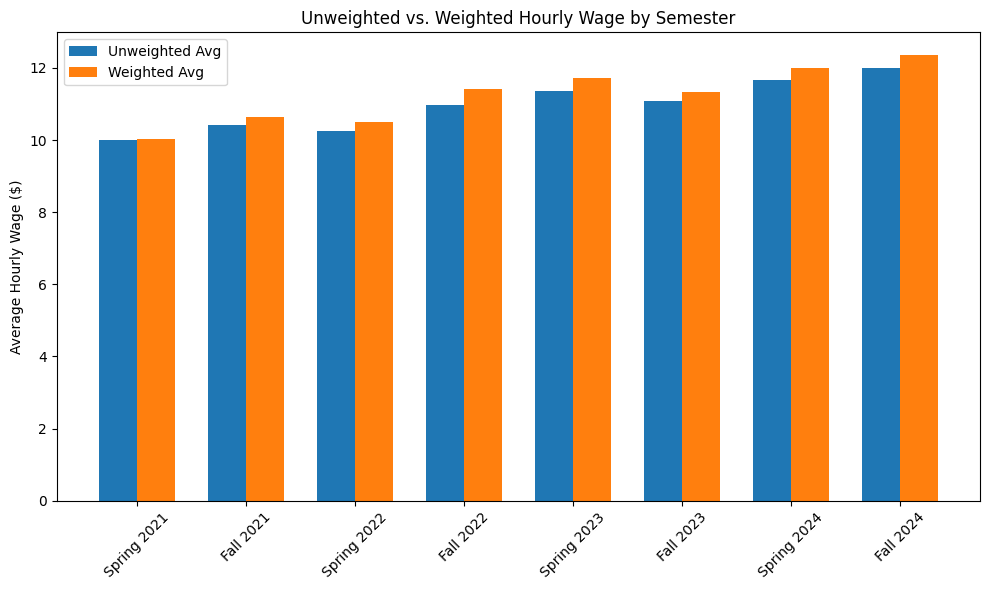

In [169]:
# chat gpt...

# Combine semester and year into one label for x-axis
df['label'] = df['semester'] + ' ' + df['year']

x = np.arange(len(df))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - width/2, df['avg_unweighted_hourly_wage'], width, label='Unweighted Avg')
ax.bar(x + width/2, df['avg_weighted_hourly_wage'], width, label='Weighted Avg')

ax.set_ylabel('Average Hourly Wage ($)')
ax.set_title('Unweighted vs. Weighted Hourly Wage by Semester')
ax.set_xticks(x)
ax.set_xticklabels(df['label'], rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


In [171]:
query = """
WITH daily_employees AS (
    SELECT 
        j.date,
        CASE
            WHEN strftime('%m', j.week_of) IN ('01','02','03','04','05') THEN 'Spring'
            WHEN strftime('%m', j.week_of) IN ('08','09','10','11','12') THEN 'Fall'
            ELSE 'Summer'
        END AS semester,
        strftime('%Y', j.week_of) AS year,
        SUM(e.hours) AS total_hours_per_day,
        COUNT(DISTINCT e.employee) AS num_employees,
        AVG(y.pay_per_hour) AS unweighted_avg_pay_per_hour,
        SUM(e.hours * y.pay_per_hour) * 1.0 / SUM(e.hours) AS weighted_avg_pay_per_hour,
        j.job_pays - SUM(e.hours * y.pay_per_hour) AS profit_per_day
    FROM printouts_table AS e
    JOIN payroll_table AS j 
      ON e.payroll_id = j.payroll_id
    JOIN pay_table AS y
      ON e.employee = y.employee AND e.week_of = y.week_of
    WHERE strftime('%m', j.week_of) NOT IN ('06','07')
      AND j.job_name = 'COV SCHL'
      AND j.job_pays BETWEEN 211 AND 230    
    GROUP BY j.date
)

SELECT 
    semester, 
    year, 
    ROUND(AVG(unweighted_avg_pay_per_hour), 2) AS avg_unweighted_hourly_wage,
    ROUND(AVG(weighted_avg_pay_per_hour), 2) AS avg_weighted_hourly_wage,
    ROUND(AVG(profit_per_day), 2) AS avg_daily_profit
FROM daily_employees
GROUP BY semester, year
ORDER BY year, semester DESC;
"""

df = pd.read_sql(query, engine)
df

,semester,year,avg_unweighted_hourly_wage,avg_weighted_hourly_wage,avg_daily_profit
0,Spring,2021,9.99,10.04,102.62
1,Fall,2021,10.41,10.63,104.09
2,Spring,2022,10.24,10.49,109.41
3,Fall,2022,10.97,11.41,133.37
4,Spring,2023,11.36,11.73,118.89
5,Fall,2023,11.08,11.33,107.84
6,Spring,2024,11.68,11.99,105.87
7,Fall,2024,12.01,12.37,89.78


KeyError: 'label'

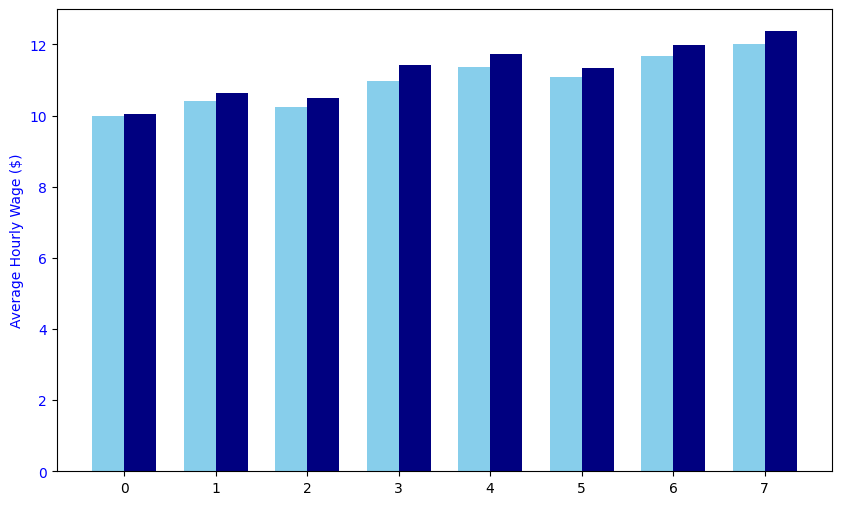

In [173]:
import matplotlib.pyplot as plt
import numpy as np

# Combine semester and year for x-axis labels
df_combined['label'] = df_combined['semester'] + ' ' + df_combined['year']
x = np.arange(len(df))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot hourly wages (left y-axis)
bar1 = ax1.bar(x - width/2, df['avg_unweighted_hourly_wage'], width, label='Unweighted Wage', color='skyblue')
bar2 = ax1.bar(x + width/2, df['avg_weighted_hourly_wage'], width, label='Weighted Wage', color='navy')
ax1.set_ylabel('Average Hourly Wage ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(x)
ax1.set_xticklabels(df['label'], rotation=45)
ax1.set_title('Hourly Wage vs Profit by Semester')

# Plot profit (right y-axis)
ax2 = ax1.twinx()
line3 = ax2.plot(x, df_combined['avg_daily_profit'], color='darkgreen', marker='o', linewidth=2, label='Avg Daily Profit')
ax2.set_ylabel('Average Daily Profit ($)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Combine legends
bars = bar1 + bar2
labels = [bar.get_label() for bar in bars] + ['Avg Daily Profit']
handles = bars + line3
ax1.legend(handles, labels, loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
# List employees who worked at Covenant Academy in Fall 2024
query = """
SELECT employee
FROM printouts_table
WHERE week_of >= '2024-08-05'
AND customer_id = 6
GROUP BY employee
"""
df = pd.read_sql(query, engine)
df

In [ ]:
# Find their current pay per hour
query = """
SELECT e.employee, y.pay_per_hour
FROM printouts_table AS e
JOIN pay_table AS y
ON e.week_of = y.week_of AND e.employee = y.employee
WHERE e.week_of >= '2024-08-05'
AND e.customer_id = 6
GROUP BY e.employee, y.pay_per_hour
ORDER BY y.pay_per_hour
"""
df = pd.read_sql(query, engine)
df

In [177]:
# Spencer's pay fall 2024
query = """
SELECT e.employee, e.week_of, y.pay_per_hour
FROM printouts_table AS e
JOIN pay_table AS y
ON e.week_of = y.week_of AND e.employee = y.employee
WHERE e.week_of >= '2024-08-05'
AND e.customer_id = 6
AND e.employee = 'Spencer'
--GROUP BY e.employee, y.pay_per_hour
"""
df = pd.read_sql(query, engine)
df

,employee,week_of,pay_per_hour
0,Spencer,2024-08-05 00:00:00.000000,9.85
1,Spencer,2024-08-05 00:00:00.000000,9.85
2,Spencer,2024-08-12 00:00:00.000000,10.35
3,Spencer,2024-08-12 00:00:00.000000,10.35
4,Spencer,2024-08-12 00:00:00.000000,10.35
...,...,...,...
72,Spencer,2024-12-09 00:00:00.000000,10.35
73,Spencer,2024-12-16 00:00:00.000000,10.35
74,Spencer,2024-12-16 00:00:00.000000,10.35
75,Spencer,2024-12-16 00:00:00.000000,10.35


In [179]:
# Divide the group into 2 buckets based on pay/hr
query = """
SELECT
    e.employee,
    CASE
        WHEN pay_per_hour < 11.00 THEN 'student'
        ELSE 'adult'
    END AS bucket
FROM printouts_table AS e
JOIN pay_table AS y
ON e.week_of = y.week_of AND e.employee = y.employee
WHERE e.week_of >= '2024-08-05'
AND e.customer_id = 6
GROUP BY e.employee
ORDER BY y.pay_per_hour
"""
df = pd.read_sql(query, engine)
df

,employee,bucket
0,Asa,student
1,Spencer,student
2,MaKenna,student
3,MaKayla,student
4,Janet T,adult
5,Lisa,adult
6,Janet,adult
7,Cindy,adult
8,Brian,adult


In [181]:
# Count how many are in each bucket
query = """
WITH employee_buckets AS(
    SELECT
        e.employee,
        CASE
            WHEN pay_per_hour < 11.00 THEN 'student'
            ELSE 'adult'
        END AS bucket
    FROM printouts_table AS e
    JOIN pay_table AS y
    ON e.week_of = y.week_of AND e.employee = y.employee
    WHERE e.week_of >= '2024-08-05'
    AND e.customer_id = 6
    GROUP BY e.employee
    ORDER BY y.pay_per_hour
)

SELECT
    bucket,
    COUNT(employee) num_employees
FROM employee_buckets
GROUP BY bucket;
"""
df = pd.read_sql(query, engine)
df

,bucket,num_employees
0,adult,5
1,student,4


In [183]:
# Find average number of hours worked per day of the week per bucket
query = """
WITH employee_buckets AS(
    SELECT
        e.employee,
        CASE
            WHEN pay_per_hour < 11.00 THEN 'student'
            ELSE 'adult'
        END AS bucket
    FROM printouts_table AS e
    JOIN pay_table AS y
    ON e.week_of = y.week_of AND e.employee = y.employee
    WHERE e.week_of >= '2024-08-05'
    AND e.customer_id = 6
    GROUP BY e.employee, y.pay_per_hour
)

SELECT 
    e.day_of_week, 
    b.bucket, 
    AVG(e.hours) AS avg_hours_per_day 
FROM printouts_table AS e
JOIN employee_buckets AS b
  ON e.employee = b.employee
JOIN payroll_table AS j
  ON e.payroll_id = j.payroll_id
WHERE e.job_name = 'COV SCHL'
  AND e.week_of >= '2024-08-05'
  AND j.job_pays BETWEEN 211 AND 230
GROUP BY e.day_of_week, b.bucket
ORDER BY 
    CASE
        WHEN e.day_of_week = 'Monday' THEN 1
        WHEN e.day_of_week = 'Tuesday' THEN 2
        WHEN e.day_of_week = 'Wednesday' THEN 3
        WHEN e.day_of_week = 'Thursday' THEN 4
        WHEN e.day_of_week = 'Friday' THEN 5
    END;
"""
df_bucket_hours = pd.read_sql(query, engine)
df_bucket_hours

,day_of_week,bucket,avg_hours_per_day
0,Monday,adult,2.373278
1,Monday,student,1.428182
2,Tuesday,adult,2.653050
3,Tuesday,student,1.209295
4,Wednesday,adult,2.259180
5,Wednesday,student,1.238235
6,Thursday,adult,2.320762
7,Thursday,student,1.260000
8,Friday,adult,2.421010
9,Friday,student,1.351000


In [185]:
# Graph the above data

# Optional: ensure days of week are in correct order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_bucket_hours['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)

x = np.arange(len(df_bucket_hours))
width = 0.35

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, df_bucket_hours['bucket']['adult'], width)
#ax.bar(x = width/2, df_bucket_hours['avg_weighted_hourly_wage'], width, label='Weighted Avg')

ax.set_ylabel('Average Hours per Day')
ax.set_title('Average Hours Worked per Day by Employee Type')
ax.set_slabel('Day of the Week')
#ax.set_xticks(x)
#ax.set_xticklabels(df_bucket_hours['day_of_week'], rotation=45)
ax.legend(title='Employee Type')

plt.tight_layout()
plt.show()

KeyError: 'day_of_week'

C:\Users\rosse\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\rosse\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


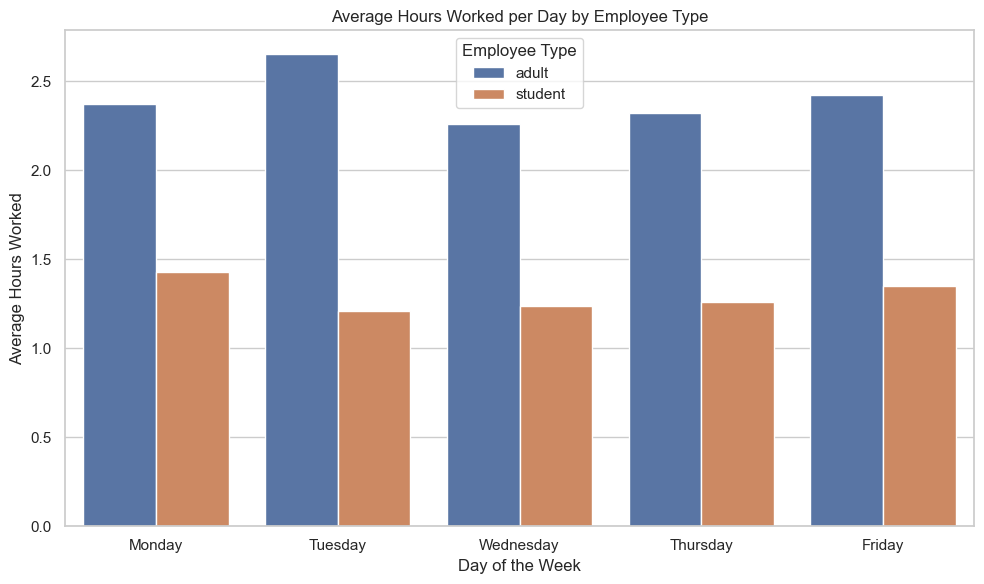

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Run the query
df = pd.read_sql(query, engine)

# Optional: ensure days of week are in correct order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)

# Set plot style
sns.set(style="whitegrid")

# Create barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='day_of_week', y='avg_hours_per_day', hue='bucket')

# Customize labels and title
plt.title('Average Hours Worked per Day by Employee Type')
plt.xlabel('Day of the Week')
plt.ylabel('Average Hours Worked')
plt.legend(title='Employee Type')

# Show plot
plt.tight_layout()
plt.show()


In [189]:
# now let's see who normally works on which days

In [191]:
# now we will see how many hours each bucket can work on average a week

In [193]:
# 
query = """
WITH employee_buckets AS(
    SELECT
        e.employee,
        CASE
            WHEN pay_per_hour < 11.00 THEN 'student'
            ELSE 'adult'
        END AS bucket,
        y.pay_per_hour
    FROM printouts_table AS e
    JOIN pay_table AS y
    ON e.week_of = y.week_of AND e.employee = y.employee
    WHERE e.week_of >= '2024-08-12'                                 --second week
    AND e.customer_id = 6
    GROUP BY e.employee, y.pay_per_hour
),

bucket_avg_pay AS(
    SELECT bucket, AVG(pay_per_hour) AS avg_pay_per_hour
    FROM employee_buckets
    GROUP BY bucket
)

SELECT
    bucket,
    avg_pay_per_hour,
    (130*5 / avg_pay_per_hour) AS max_weekly_hours
FROM bucket_avg_pay


;
"""
df = pd.read_sql(query, engine)
df

,bucket,avg_pay_per_hour,max_weekly_hours
0,adult,12.70,51.181102
1,student,10.05,64.676617


In [195]:
# but the students have specific schedules. It's the adults that we need to know how many hours can work.
# First, find the schedules for each of the students....the avg hours they work each day of the week
# Then, using that info, figure how many hours the adults can work.

# Or, maybe we just need the total avg hours for students, not the individual schedules of each student bc that changes so much.

In [197]:
query = """

    SELECT
        e.employee,
        CASE
            WHEN y.pay_per_hour < 11.00 THEN 'student'
            ELSE 'adult'
        END AS bucket,
        e.day_of_week,
        AVG(e.hours) AS avg_hours,
        COUNT(e.day_of_week) AS num_days_in_semester_worked
    FROM printouts_table AS e
    JOIN pay_table AS y
    ON e.week_of = y.week_of AND e.employee = y.employee
    JOIN payroll_table AS j
    ON e.payroll_id = j.payroll_id
    WHERE e.week_of >= '2024-08-05'
    AND e.customer_id = 6
    AND j.job_pays BETWEEN 211 AND 230
    GROUP BY e.employee, e.day_of_week
    ORDER BY
        bucket,
        e.employee,
        CASE
            WHEN e.day_of_week = 'Monday' THEN 1
            WHEN e.day_of_week = 'Tuesday' THEN 2
            WHEN e.day_of_week = 'Wednesday' THEN 3
            WHEN e.day_of_week = 'Thursday' THEN 4
            WHEN e.day_of_week = 'Friday' THEN 5
        END;


"""
df_cov_schedules = pd.read_sql(query, engine)
df_cov_schedules

,employee,bucket,day_of_week,avg_hours,num_days_in_semester_worked
0,Brian,adult,Monday,3.011569,19
1,Brian,adult,Tuesday,3.841779,19
2,Brian,adult,Wednesday,3.594074,18
3,Brian,adult,Thursday,3.253889,19
4,Brian,adult,Friday,3.382815,19
5,Cindy,adult,Monday,2.775926,9
6,Cindy,adult,Tuesday,2.967949,13
7,Cindy,adult,Wednesday,2.546296,9
8,Cindy,adult,Thursday,2.250000,14
9,Cindy,adult,Friday,2.539744,15


In [199]:
query = """
WITH cov_schedules AS(
    SELECT
        e.employee,
        CASE
            WHEN y.pay_per_hour < 11.00 THEN 'student'
            ELSE 'adult'
        END AS bucket,
        e.day_of_week,
        AVG(e.hours) AS avg_hours,
        COUNT(e.day_of_week) AS num_days_in_semester_worked
    FROM printouts_table AS e
    JOIN pay_table AS y
    ON e.week_of = y.week_of AND e.employee = y.employee
    JOIN payroll_table AS j
    ON e.payroll_id = j.payroll_id
    WHERE e.week_of >= '2024-08-05'
    AND e.customer_id = 6
    AND j.job_pays BETWEEN 211 AND 230
    GROUP BY e.employee, e.day_of_week
    ORDER BY
        bucket,
        e.employee,
        CASE
            WHEN e.day_of_week = 'Monday' THEN 1
            WHEN e.day_of_week = 'Tuesday' THEN 2
            WHEN e.day_of_week = 'Wednesday' THEN 3
            WHEN e.day_of_week = 'Thursday' THEN 4
            WHEN e.day_of_week = 'Friday' THEN 5
        END
)

SELECT * 
FROM cov_schedules
WHERE bucket = 'student';
"""

df_cov_student_schedules = pd.read_sql(query, engine)
df_cov_student_schedules

,employee,bucket,day_of_week,avg_hours,num_days_in_semester_worked
0,Asa,student,Monday,1.063333,10
1,Asa,student,Tuesday,1.010000,10
2,Asa,student,Wednesday,0.907407,9
3,Asa,student,Thursday,1.040741,9
4,Asa,student,Friday,1.056250,8
5,MaKayla,student,Monday,2.156250,8
6,MaKayla,student,Tuesday,1.996667,5
7,MaKayla,student,Wednesday,1.563889,6
8,MaKayla,student,Thursday,1.881481,9
9,MaKayla,student,Friday,1.908333,4


C:\Users\rosse\AppData\Local\Temp\ipykernel_23648\3714773880.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df_cov_student_schedules.pivot_table(index='day_of_week', columns='employee', values='avg_hours', fill_value=0)


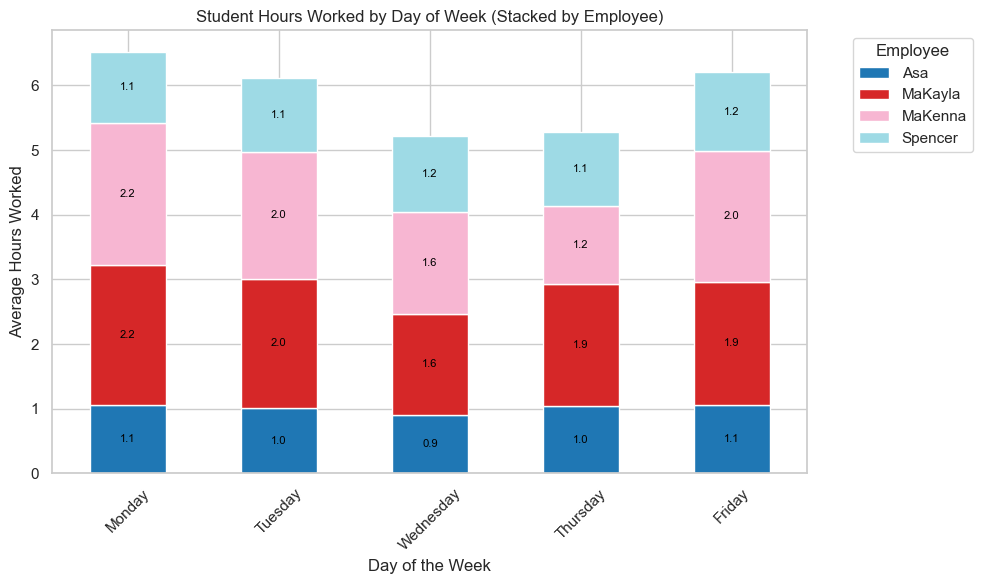

In [201]:
# Ensure days are in correct weekday order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_cov_student_schedules['day_of_week'] = pd.Categorical(df_cov_student_schedules['day_of_week'], categories=day_order, ordered=True)

# Pivot table for stacked bar chart:
# Rows = day_of_week, Columns = employee, Values = avg_hours
pivot_df = df_cov_student_schedules.pivot_table(index='day_of_week', columns='employee', values='avg_hours', fill_value=0)

# Create stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')

# Annotate each bar segment with avg_hours value
for i, day in enumerate(pivot_df.index):
    y_offset = 0
    for student in pivot_df.columns:
        value = pivot_df.loc[day, student]
        if value > 0:
            ax.text(
                i,                          # x-position
                y_offset + value / 2,      # y-position (middle of segment)
                f'{value:.1f}',            # label
                ha='center',
                va='center',
                fontsize=8,
                color='black'
            )
            y_offset += value  # move up for next stacked segment

# Plot stacked bar chart
plt.title('Student Hours Worked by Day of Week (Stacked by Employee)')
plt.ylabel('Average Hours Worked')
plt.xlabel('Day of the Week')
plt.legend(title='Employee', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\rosse\AppData\Local\Temp\ipykernel_23648\3049840961.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df_cov_student_schedules.pivot_table(index='day_of_week', columns='employee', values='num_days_in_semester_worked', fill_value=0)


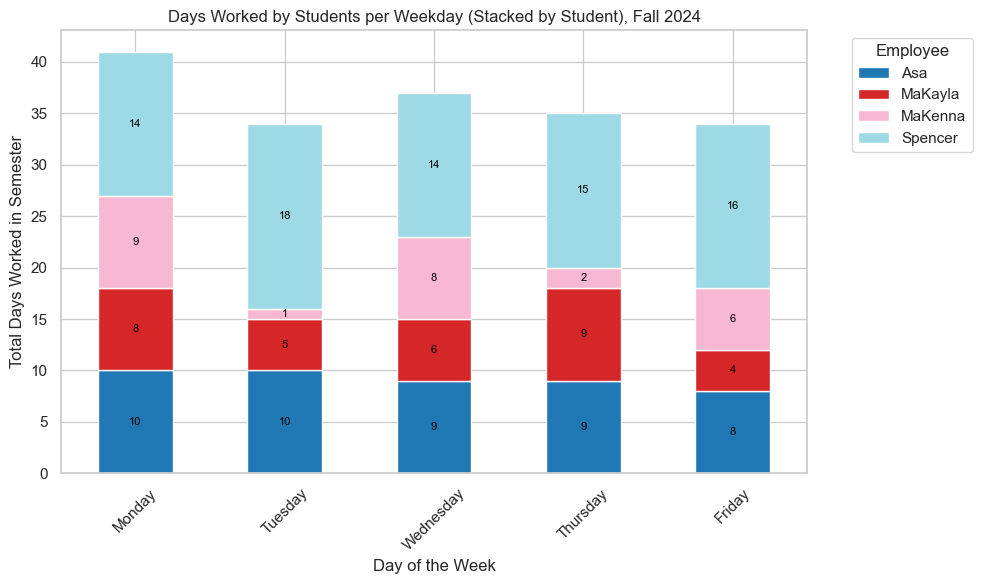

In [203]:
# Ensure days are in correct weekday order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_cov_student_schedules['day_of_week'] = pd.Categorical(df_cov_student_schedules['day_of_week'], categories=day_order, ordered=True)

# Pivot table for stacked bar chart:
# Rows = day_of_week, Columns = employee, Values = avg_hours
pivot_df = df_cov_student_schedules.pivot_table(index='day_of_week', columns='employee', values='num_days_in_semester_worked', fill_value=0)

# Create stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')

# Annotate each bar segment with avg_hours value
for i, day in enumerate(pivot_df.index):
    y_offset = 0
    for student in pivot_df.columns:
        value = pivot_df.loc[day, student]
        if value > 0:
            ax.text(
                i,                          # x-position
                y_offset + value / 2,      # y-position (middle of segment)
                f'{int(value)}',            # whole number label
                ha='center',
                va='center',
                fontsize=8,
                color='black'
            )
            y_offset += value  # move up for next stacked segment

# Plot stacked bar chart
plt.title('Days Worked by Students per Weekday (Stacked by Student), Fall 2024')
plt.ylabel('Total Days Worked in Semester')
plt.xlabel('Day of the Week')
plt.legend(title='Employee', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [204]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter to students only
df_students = df_student_schedules[df_student_schedules['bucket'] == 'student'].copy()

# Ensure correct weekday order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_students['day_of_week'] = pd.Categorical(df_students['day_of_week'], categories=day_order, ordered=True)

# Pivot: index = day_of_week, columns = employee, values = num_days_in_semester_worked
pivot_days = df_students.pivot_table(
    index='day_of_week',
    columns='employee',
    values='num_days_in_semester_worked',
    fill_value=0
)

# Plot grouped bar chart (NOT stacked)
ax = pivot_days.plot(
    kind='bar',
    stacked=False,
    figsize=(12, 6),
    colormap='tab20'
)

# Add labels on top of each bar (whole numbers)
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 0.2,
                f'{int(height)}',
                ha='center',
                va='bottom',
                fontsize=8,
                color='black'
            )

# Final chart formatting
plt.title('Days Worked by Students per Weekday (Grouped Bars)')
plt.ylabel('Total Days Worked in Semester')
plt.xlabel('Day of the Week')
plt.legend(title='Employee', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


NameError: name 'df_student_schedules' is not defined

C:\Users\rosse\AppData\Local\Temp\ipykernel_23648\3264791389.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df_cov_student_schedules.pivot_table(


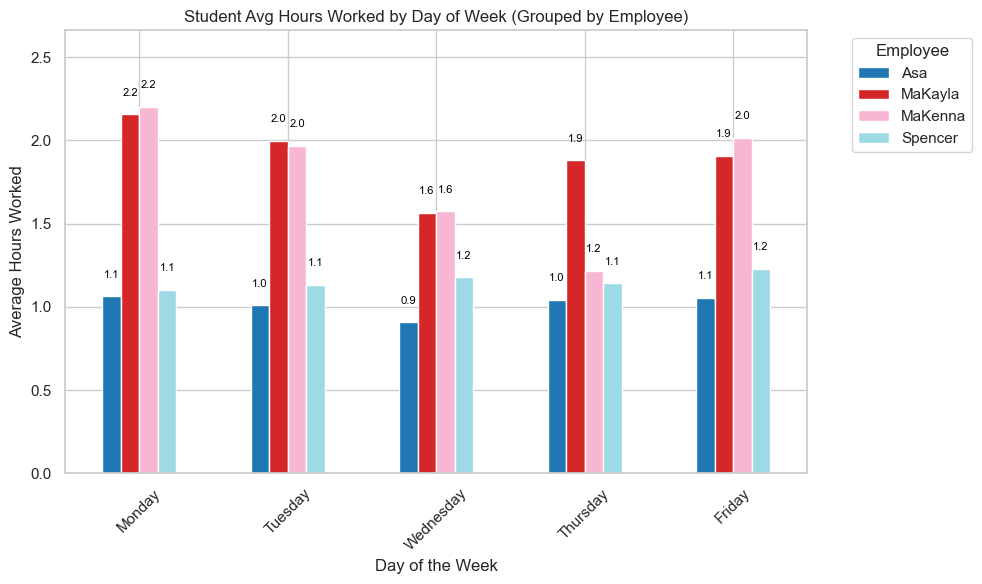

In [206]:
import matplotlib.pyplot as plt

# Ensure correct weekday order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_cov_student_schedules['day_of_week'] = pd.Categorical(
    df_cov_student_schedules['day_of_week'],
    categories=day_order,
    ordered=True
)

# Pivot for grouped bar chart
pivot_df = df_cov_student_schedules.pivot_table(
    index='day_of_week',
    columns='employee',
    values='avg_hours',
    fill_value=0
)

# Create grouped bar chart (not stacked)
ax = pivot_df.plot(
    kind='bar',
    stacked=False,
    figsize=(10, 6),
    colormap='tab20'
)

# Increase y-axis limit to make room for labels
plt.draw()  # Draw to compute limits
y_max = ax.get_ylim()[1]
ax.set_ylim(top=y_max * 1.15)

# Add value labels above bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 0.1,  # slightly above bar
                f'{height:.1f}',
                ha='center',
                va='bottom',
                fontsize=8,
                color='black'
            )

# Final formatting
plt.title('Student Avg Hours Worked by Day of Week (Grouped by Employee)')
plt.ylabel('Average Hours Worked')
plt.xlabel('Day of the Week')
plt.legend(title='Employee', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [207]:
# on average, how many hours does each student work 

In [215]:
# What is the average profit each day of the week since Aug 2024? -----tweek if used b/c uses kathy instead of calculated profit
query = """
    SELECT day_of_week, AVG(kathy)
    FROM payroll_table 
    WHERE job_name = 'COV SCHL' 
    AND week_of BETWEEN '2024-08-05' AND '2024-12-31' 
    GROUP BY day_of_week
"""
result_df = pd.read_sql(query, engine)
result_df

,day_of_week,AVG(kathy)
0,Friday,81.633158
1,Monday,58.431053
2,Saturday,55.500000
3,Thursday,87.938421
4,Tuesday,77.536316
5,Wednesday,98.304000


In [222]:
# List the current employees who clean at the school and find the latest start date.
query = """
    SELECT *
    FROM employee_table
    WHERE employee_id IN ('Brian', 'Cindy', 'Janet', 'Janet T', 'Spencer', 'MaKayla', 'MaKenna')
"""
df = pd.read_sql(query, engine)
df

,employee_id,starting_date,start_back_date,birthday,employees_first_name,employees_last_name
0,Brian,2019-01-01 00:00:00.000000,2021-10-21 00:00:00.000000,1978-03-22 00:00:00.000000,Brian,Rosseau
1,Cindy,2019-08-05 00:00:00.000000,2023-05-19 00:00:00.000000,1956-06-01 00:00:00.000000,Cindy,Crowder
2,MaKayla,2021-08-24 00:00:00.000000,None,2006-05-15 00:00:00.000000,Makayla,Brown
3,Spencer,2021-09-14 00:00:00.000000,None,2007-06-26 00:00:00.000000,Spencer,Gant
4,MaKenna,2022-08-05 00:00:00.000000,None,2008-06-20 00:00:00.000000,MaKenna,Brown
5,Janet,2023-07-27 00:00:00.000000,None,1985-09-15 00:00:00.000000,Janet,Gambler
6,Janet T,2024-07-16 00:00:00.000000,None,1965-04-10 00:00:00.000000,Janet,Crooms


It looks like 'Janet T' was the last of the current team members to start working, with a starting date of '2024-07-16'. Since this is before the date of the school year, we will base our analysis off of the start of the school year, '2024-08-05'.

In [226]:
# Step 1: Join work hours log with pay rates
query = """
    SELECT 
        e.employee,
        e.payroll_id,
        e.week_of,
        e.date,
        e.hours,
        y.pay_per_hour,
        (e.hours * y.pay_per_hour) AS labor_cost
    FROM printouts_table AS e                                          -- table that has individual employee work hours
    JOIN pay_table AS y                                                -- join table that has employee pay rates
      ON e.employee = y.employee AND e.week_of = y.week_of
    JOIN payroll_table AS j                                            -- join table that has job income
      ON e.payroll_id = j.payroll_id
    WHERE e.job_name = 'COV SCHL'                                      -- denotes a normal cleaning job at this particular school
      AND e.date BETWEEN '2024-08-05' AND '2024-12-31'                 -- start from beginning of latest school year to include only current employees
      AND j.job_pays = 230;                                            -- denotes normal cleaning pay
"""
df = pd.read_sql(query, engine)
df
    

,employee,payroll_id,week_of,date,hours,pay_per_hour,labor_cost
0,Brian,4744,2024-08-12 00:00:00.000000,2024-08-12 00:00:00.000000,2.800000,14.0,39.200000
1,Brian,4749,2024-08-12 00:00:00.000000,2024-08-13 00:00:00.000000,3.250000,14.0,45.500000
2,Brian,4754,2024-08-12 00:00:00.000000,2024-08-14 00:00:00.000000,3.816667,14.0,53.433333
3,Brian,4758,2024-08-12 00:00:00.000000,2024-08-15 00:00:00.000000,3.216667,14.0,45.033333
4,Brian,4763,2024-08-12 00:00:00.000000,2024-08-16 00:00:00.000000,2.666667,14.0,37.333333
...,...,...,...,...,...,...,...
485,Janet T,5175,2024-12-16 00:00:00.000000,2024-12-16 00:00:00.000000,2.733333,12.0,32.800000
486,Janet T,5180,2024-12-16 00:00:00.000000,2024-12-17 00:00:00.000000,2.833333,12.0,34.000000
487,Janet T,5185,2024-12-16 00:00:00.000000,2024-12-18 00:00:00.000000,2.733333,12.0,32.800000
488,Janet T,5189,2024-12-16 00:00:00.000000,2024-12-19 00:00:00.000000,1.383333,12.0,16.600000


In [228]:
# Combine Step 1 and Step 2
query = """
-- Step 1: Join work hours log with pay rates
    WITH employee_labor AS (
        SELECT 
            e.employee,
            e.payroll_id,
            e.week_of,
            e.date,
            e.hours,
            y.pay_per_hour,
            (e.hours * y.pay_per_hour) AS labor_cost
        FROM printouts_table AS e
        JOIN pay_table AS y
          ON e.employee = y.employee AND e.week_of = y.week_of
        JOIN payroll_table AS j
          ON e.payroll_id = j.payroll_id
        WHERE e.job_name = 'COV SCHL'
          AND e.date BETWEEN '2024-08-05' AND '2024-12-31'
          AND j.job_pays = 230
    )

-- Step 2: Rank employees by lowest pay per day
    SELECT *,
        ROW_NUMBER() OVER (
            PARTITION BY payroll_id
            ORDER BY pay_per_hour ASC
            ) AS labor_order
    FROM employee_labor;
"""
df = pd.read_sql(query, engine)
df

,employee,payroll_id,week_of,date,hours,pay_per_hour,labor_cost,labor_order
0,Asa,4744,2024-08-12 00:00:00.000000,2024-08-12 00:00:00.000000,1.633333,9.50,15.516667,1
1,Spencer,4744,2024-08-12 00:00:00.000000,2024-08-12 00:00:00.000000,1.233333,10.35,12.765000,2
2,Janet T,4744,2024-08-12 00:00:00.000000,2024-08-12 00:00:00.000000,2.066667,12.00,24.800000,3
3,Janet,4744,2024-08-12 00:00:00.000000,2024-08-12 00:00:00.000000,1.766667,12.50,22.083333,4
4,Cindy,4744,2024-08-12 00:00:00.000000,2024-08-12 00:00:00.000000,3.150000,13.00,40.950000,5
...,...,...,...,...,...,...,...,...
485,Spencer,5195,2024-12-16 00:00:00.000000,2024-12-20 00:00:00.000000,1.416667,10.35,14.662500,1
486,Janet T,5195,2024-12-16 00:00:00.000000,2024-12-20 00:00:00.000000,2.783333,12.00,33.400000,2
487,Janet,5195,2024-12-16 00:00:00.000000,2024-12-20 00:00:00.000000,0.850000,12.50,10.625000,3
488,Cindy,5195,2024-12-16 00:00:00.000000,2024-12-20 00:00:00.000000,1.966667,13.00,25.566667,4


The new column above, labor_order, ranks the employees who worked each day from lowest to highest pay_per_hour.

In [234]:
query = """
-- Step 1: Join work hours log with pay rates
    WITH employee_labor AS (
        SELECT 
            e.employee,
            e.payroll_id,
            e.week_of,
            e.date,
            e.hours,
            y.pay_per_hour,
            (e.hours * y.pay_per_hour) AS labor_cost
        FROM printouts_table AS e
        JOIN pay_table AS y
          ON e.employee = y.employee AND e.week_of = y.week_of
        JOIN payroll_table AS j
          ON e.payroll_id = j.payroll_id
        WHERE e.job_name = 'COV SCHL'
          AND e.date BETWEEN '2024-08-05' AND '2024-12-31'
          AND j.job_pays = 230
    ),

-- Step 2: Rank employees by lowest pay per day
    ranked_labor AS (
        SELECT *,
            ROW_NUMBER() OVER (
                PARTITION BY payroll_id
                ORDER BY pay_per_hour ASC
            ) AS labor_order
        FROM employee_labor
    )

-- Step 3: Cumulative cost and cumulative hours per day
    SELECT *,
        SUM(labor_cost) OVER(
            PARTITION BY payroll_id
            ORDER BY pay_per_hour ASC
            ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
        ) AS cumulative_cost,
    
        SUM(hours) OVER(
            PARTITION BY payroll_id
            ORDER BY pay_per_hour ASC
            ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
        ) AS cumulative_hours
    FROM ranked_labor
"""
df = pd.read_sql(query, engine)
df

,employee,payroll_id,week_of,date,hours,pay_per_hour,labor_cost,labor_order,cumulative_cost,cumulative_hours
0,Asa,4744,2024-08-12 00:00:00.000000,2024-08-12 00:00:00.000000,1.633333,9.50,15.516667,1,15.516667,1.633333
1,Spencer,4744,2024-08-12 00:00:00.000000,2024-08-12 00:00:00.000000,1.233333,10.35,12.765000,2,28.281667,2.866667
2,Janet T,4744,2024-08-12 00:00:00.000000,2024-08-12 00:00:00.000000,2.066667,12.00,24.800000,3,53.081667,4.933333
3,Janet,4744,2024-08-12 00:00:00.000000,2024-08-12 00:00:00.000000,1.766667,12.50,22.083333,4,75.165000,6.700000
4,Cindy,4744,2024-08-12 00:00:00.000000,2024-08-12 00:00:00.000000,3.150000,13.00,40.950000,5,116.115000,9.850000
...,...,...,...,...,...,...,...,...,...,...
485,Spencer,5195,2024-12-16 00:00:00.000000,2024-12-20 00:00:00.000000,1.416667,10.35,14.662500,1,14.662500,1.416667
486,Janet T,5195,2024-12-16 00:00:00.000000,2024-12-20 00:00:00.000000,2.783333,12.00,33.400000,2,48.062500,4.200000
487,Janet,5195,2024-12-16 00:00:00.000000,2024-12-20 00:00:00.000000,0.850000,12.50,10.625000,3,58.687500,5.050000
488,Cindy,5195,2024-12-16 00:00:00.000000,2024-12-20 00:00:00.000000,1.966667,13.00,25.566667,4,84.254167,7.016667


In [236]:
query = """
-- Step 1: Join work hours log with pay rates
    WITH employee_labor AS (
        SELECT 
            e.employee,
            e.payroll_id,
            e.week_of,
            e.date,
            e.hours,
            y.pay_per_hour,
            (e.hours * y.pay_per_hour) AS labor_cost
        FROM printouts_table AS e
        JOIN pay_table AS y
          ON e.employee = y.employee AND e.week_of = y.week_of
        JOIN payroll_table AS j
          ON e.payroll_id = j.payroll_id
        WHERE e.job_name = 'COV SCHL'
          AND e.date BETWEEN '2024-08-05' AND '2024-12-31'
          AND j.job_pays = 230
    ),

-- Step 2: Rank employees by lowest pay per day
    ranked_labor AS (
        SELECT *,
            ROW_NUMBER() OVER (
                PARTITION BY payroll_id
                ORDER BY pay_per_hour ASC
            ) AS labor_order
        FROM employee_labor
    ),

-- Step 3: Cumulative cost and cumulative hours per day
    cumulative_fields AS (
    SELECT *,
        SUM(labor_cost) OVER(
            PARTITION BY payroll_id
            ORDER BY pay_per_hour ASC
            ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
        ) AS cumulative_cost,
    
        SUM(hours) OVER(
            PARTITION BY payroll_id
            ORDER BY pay_per_hour ASC
            ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
        ) AS cumulative_hours
    FROM ranked_labor
)

-- Step 4: Filter rows under the $130 budget and get max affordable hours
    SELECT 
        payroll_id,
        date,
        MAX(cumulative_hours) AS affordable_hours,
        MAX(cumulative_cost) AS affordable_cost
    FROM cumulative_fields
    WHERE cumulative_cost <= 130
    GROUP BY payroll_id, date
    ORDER BY date;
"""
df = pd.read_sql(query, engine)
df

,payroll_id,date,affordable_hours,affordable_cost
0,4744,2024-08-12 00:00:00.000000,9.850000,116.115000
1,4749,2024-08-13 00:00:00.000000,9.116667,106.971667
2,4754,2024-08-14 00:00:00.000000,8.983333,110.984167
3,4758,2024-08-15 00:00:00.000000,8.366667,98.762500
4,4763,2024-08-16 00:00:00.000000,8.983333,104.835833
...,...,...,...,...
81,5175,2024-12-16 00:00:00.000000,9.650000,107.014167
82,5180,2024-12-17 00:00:00.000000,10.650000,126.021667
83,5185,2024-12-18 00:00:00.000000,9.966667,122.833333
84,5189,2024-12-19 00:00:00.000000,9.550000,111.141667


In [241]:
# Query the latest daily rate
query = """
    SELECT week_number, date, job_name, job_pays, kathy 
    FROM payroll_table 
    WHERE week_of BETWEEN '2024-12-01' and '2024-12-31' AND job_name='COV SCHL' 
    GROUP by week_number, date, job_name, job_pays, kathy
"""
df = pd.read_sql(query, engine)
df

,week_number,date,job_name,job_pays,kathy
0,49,2024-12-02 00:00:00.000000,COV SCHL,230.0,48.12
1,49,2024-12-03 00:00:00.000000,COV SCHL,230.0,94.97
2,49,2024-12-04 00:00:00.000000,COV SCHL,230.0,43.80
3,49,2024-12-05 00:00:00.000000,COV SCHL,230.0,44.95
4,49,2024-12-06 00:00:00.000000,COV SCHL,230.0,77.90
5,50,2024-12-09 00:00:00.000000,COV SCHL,230.0,84.39
6,50,2024-12-10 00:00:00.000000,COV SCHL,230.0,24.67
7,50,2024-12-11 00:00:00.000000,COV SCHL,230.0,138.53
8,50,2024-12-12 00:00:00.000000,COV SCHL,230.0,68.21
9,50,2024-12-13 00:00:00.000000,COV SCHL,230.0,93.67


In [243]:
# First, we will see how Kathy's Cleaning has been doing in meeting its $100 per day goal. We will group it by semester.
query = """
    SELECT week_of, AVG(kathy) AS avg_net_pay
    FROM payroll_table
    WHERE job_name = 'COV SCHL'
        AND strftime('%m', week_of) NOT IN ('05', '06', '07', '08')                -- exclude full and partial summer months
        AND job_pays BETWEEN 211 AND 230
    GROUP BY week_of
"""
df_goal = pd.read_sql(query, engine)
df_goal

,week_of,avg_net_pay
0,2021-01-04 00:00:00.000000,165.475
1,2021-01-11 00:00:00.000000,103.438
2,2021-01-18 00:00:00.000000,119.752
3,2021-01-25 00:00:00.000000,92.732
4,2021-02-01 00:00:00.000000,106.480
...,...,...
118,2024-11-11 00:00:00.000000,54.926
119,2024-11-18 00:00:00.000000,79.912
120,2024-12-02 00:00:00.000000,61.948
121,2024-12-09 00:00:00.000000,81.894


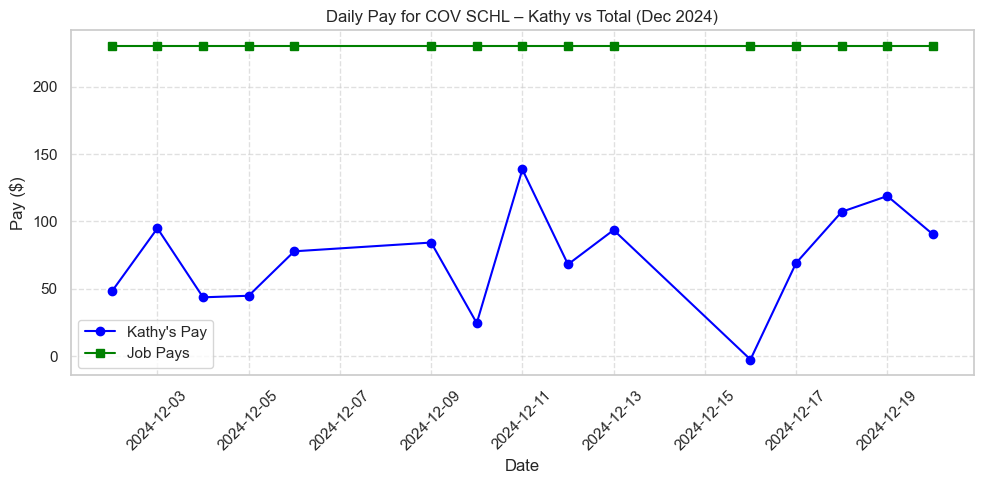

In [245]:
import matplotlib.pyplot as plt

# Ensure datetime for proper sorting
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Plot
plt.figure(figsize=(10, 5))

# Line for Kathy's pay
plt.plot(df['date'], df['kathy'], marker='o', label="Kathy's Pay", color='blue')

# Line for total job pay
plt.plot(df['date'], df['job_pays'], marker='s', label='Job Pays', color='green')

# Styling
plt.title('Daily Pay for COV SCHL – Kathy vs Total (Dec 2024)')
plt.xlabel('Date')
plt.ylabel('Pay ($)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [246]:
# Query the latest daily rate
query = """
    SELECT week_number, week_of, job_name, job_pays, AVG(kathy) 
    FROM payroll_table 
    WHERE week_of BETWEEN '2024-12-01' AND '2024-12-31' 
    AND job_name='COV SCHL' 
    GROUP BY week_number, week_of, job_name, job_pays
"""
result_df = pd.read_sql(query, engine)
result_df

,week_number,week_of,job_name,job_pays,AVG(kathy)
0,49,2024-12-02 00:00:00.000000,COV SCHL,230.0,61.948
1,50,2024-12-09 00:00:00.000000,COV SCHL,230.0,81.894
2,51,2024-12-16 00:00:00.000000,COV SCHL,230.0,76.676


In [249]:
# What is the average profit each day of the week since Aug 2024?
query = """
    SELECT day_of_week, AVG(kathy) 
    FROM payroll_table 
    WHERE job_name = 'COV SCHL' 
    AND week_of BETWEEN '2024-08-05' AND '2024-12-31' 
    GROUP BY day_of_week
"""
result_df = pd.read_sql(query, engine)
result_df

,day_of_week,AVG(kathy)
0,Friday,81.633158
1,Monday,58.431053
2,Saturday,55.500000
3,Thursday,87.938421
4,Tuesday,77.536316
5,Wednesday,98.304000


In [251]:
# Calculate total hours worked per day
query = """
SELECT payroll_id, date, SUM(hours) AS total_hours 
FROM printouts_table 
WHERE job_name = 'COV SCHL'
GROUP BY date;
"""
result_df = pd.read_sql(query, engine)
result_df

,payroll_id,date,total_hours
0,1,2021-01-04 00:00:00.000000,3.916667
1,8,2021-01-06 00:00:00.000000,4.050000
2,13,2021-01-07 00:00:00.000000,4.966667
3,17,2021-01-08 00:00:00.000000,1.533333
4,23,2021-01-11 00:00:00.000000,11.683333
...,...,...,...
877,5175,2024-12-16 00:00:00.000000,16.200000
878,5180,2024-12-17 00:00:00.000000,13.133333
879,5185,2024-12-18 00:00:00.000000,9.966667
880,5189,2024-12-19 00:00:00.000000,9.550000


In [253]:
# Join with daily profits
query = """
SELECT * 
FROM payroll_table AS pl 
JOIN (SELECT payroll_id, date, SUM(hours) AS total_hours FROM printouts_table WHERE job_name = 'COV SCHL' GROUP BY date) AS th 
ON pl.payroll_id = th.payroll_id;
"""
result_df = pd.read_sql(query, engine)
result_df

,payroll_id,week,week_of,day_of_week,date,start,end,hours,customer_id,job_name,job_pays,kathy,note,week_number,time_varies_by_employee,payroll_id,date,total_hours
0,1,"January 4 - 8, 2021",2021-01-04 00:00:00.000000,Monday,2021-01-04 00:00:00.000000,None,None,None,6,COV SCHL,211.0,171.05,None,1,1,1,2021-01-04 00:00:00.000000,3.916667
1,8,"January 4 - 8, 2021",2021-01-04 00:00:00.000000,Wednesday,2021-01-06 00:00:00.000000,None,None,None,6,COV SCHL,100.0,58.49,None,1,1,8,2021-01-06 00:00:00.000000,4.050000
2,13,"January 4 - 8, 2021",2021-01-04 00:00:00.000000,Thursday,2021-01-07 00:00:00.000000,None,None,None,6,COV SCHL,211.0,159.90,None,1,1,13,2021-01-07 00:00:00.000000,4.966667
3,17,"January 4 - 8, 2021",2021-01-04 00:00:00.000000,Friday,2021-01-08 00:00:00.000000,None,None,None,6,COV SCHL,0.0,-17.56,None,1,1,17,2021-01-08 00:00:00.000000,1.533333
4,23,"January 11 - 15, 2021",2021-01-11 00:00:00.000000,Monday,2021-01-11 00:00:00.000000,None,None,None,6,COV SCHL,211.0,97.65,None,2,1,23,2021-01-11 00:00:00.000000,11.683333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,5175,"December 16 - 20, 2024",2024-12-16 00:00:00.000000,Monday,2024-12-16 00:00:00.000000,None,None,None,6,COV SCHL,230.0,-2.31,None,51,1,5175,2024-12-16 00:00:00.000000,16.200000
878,5180,"December 16 - 20, 2024",2024-12-16 00:00:00.000000,Tuesday,2024-12-17 00:00:00.000000,None,None,None,6,COV SCHL,230.0,69.21,None,51,1,5180,2024-12-17 00:00:00.000000,13.133333
879,5185,"December 16 - 20, 2024",2024-12-16 00:00:00.000000,Wednesday,2024-12-18 00:00:00.000000,None,None,None,6,COV SCHL,230.0,107.17,None,51,1,5185,2024-12-18 00:00:00.000000,9.966667
880,5189,"December 16 - 20, 2024",2024-12-16 00:00:00.000000,Thursday,2024-12-19 00:00:00.000000,None,None,None,6,COV SCHL,230.0,118.86,None,51,1,5189,2024-12-19 00:00:00.000000,9.550000


In [255]:
# Calculate profit per hour
query = """
SELECT date, day_of_week, kathy, total_hours, kathy/total_hours AS profit_per_hour 
FROM (
    SELECT *  
    FROM payroll_table AS pl 
    JOIN (SELECT payroll_id, date, SUM(hours) AS total_hours FROM printouts_table WHERE job_name = 'COV SCHL' GROUP BY date) AS th 
    ON pl.payroll_id = th.payroll_id
    ) e 
WHERE date BETWEEN '2024-08-05' AND '2024-12-31' 
ORDER BY profit_per_hour DESC 
LIMIT 15;
"""
result_df = pd.read_sql(query, engine)
result_df

,date,day_of_week,kathy,total_hours,profit_per_hour
0,2024-10-10 00:00:00.000000,Thursday,147.71,0.583333,253.217143
1,2024-08-07 00:00:00.000000,Wednesday,152.90,5.450000,28.055046
2,2024-09-25 00:00:00.000000,Wednesday,154.80,6.333333,24.442105
3,2024-12-11 00:00:00.000000,Wednesday,138.53,6.800000,20.372059
4,2024-08-28 00:00:00.000000,Wednesday,138.92,7.250000,19.161379
5,2024-08-06 00:00:00.000000,Tuesday,124.16,7.600000,16.336842
6,2024-09-18 00:00:00.000000,Wednesday,128.71,8.200000,15.696341
7,2024-10-29 00:00:00.000000,Tuesday,122.73,8.216667,14.936714
8,2024-10-04 00:00:00.000000,Friday,122.07,8.600000,14.194186
9,2024-09-26 00:00:00.000000,Thursday,118.32,8.633333,13.705019
